<a href="https://www.kaggle.com/code/pranaii/s3-e18-eda-wrapper-based-feature-selection?scriptVersionId=138804932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on a portion of the Multi-label Classification of enzyme substrates. This dataset only uses a subset of features from the original (the features that had the most signal). Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

- **Note: For this challenge, you are given 6 features in the training data, but only asked to predict the first two features (EC1 and EC2)**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import missingno as msno 
# import mlxtend, vaex, sweetviz , statsmodels, pandas_profiling

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

In [42]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [43]:
# /kaggle/input/playground-series-s3e18/sample_submission.csv
# /kaggle/input/playground-series-s3e18/train.csv
# /kaggle/input/playground-series-s3e18/test.csv

### Looking into the data

In [44]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
df_train

id     BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
0          0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1          1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2          2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3          3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4          4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
...      ...         ...        ...       ...        ...       ...        ...   
14833  14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834  14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  ...  SlogP_VSA3  VSA_EState9  fr_COO  \
0      2.754513  1.749203     0.000000  ...    4.794537    35.527357       0   
1      2.201375  1.289775    45.135471  ...   13.825658    44.707310       0   
2      5.824822  1.770579    15.645394  ...   17.964475    45.660120       0   
3      7.914542  3.067181    95.639554  ...   31.961948    87.509997       0   
4      1.036450  0.727664    17.980451  ...    9.589074    33.333333       2   
...         ...       ...          ...  ...         ...          ...     ...   
14833  3.670528  1.770579    32.971529  ...   18.947452    61.376610       0   
14834  0.174620  0.000000     0.000000  ...    0.000000    10.000000       0   
14835  3.064846  2.133897    17.248535  ...    0.000000    66.666667       0   
14836  3.978973  2.299833    45.623794  ...    9.088795    45.583333       0   
14837  5.645502  3.312893    82.448246  ...   22.701338    71.127044       0   

       fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
0            0    1    1    0    0    0    0  
1            0    0    1    1    0    0    0  
2            0    1    1    0    0    1    0  
3            0    1    1    0    0    0    0  
4            2    1    0    1    1    1    0  
...        ...  ...  ...  ...  ...  ...  ...  
14833        0    1    1    0    0    0    0  
14834        0    0    1    0    1    0    0  
14835        0    1    1    0    0    0    0  
14836        0    0    1    1    0    0    0  
14837        0    0    1    0    1    0    0  

[14838 rows x 38 columns]

In [45]:
# sweetviz.analyze(df_train).show_notebook()

In [46]:
# Sample data 

df_train.sample(10)

id      BertzCT       Chi1      Chi1n      Chi1v      Chi2n  \
3096    3096   201.871394   5.485270   3.465608   3.465608   2.547335   
10429  10429   113.625488   4.304530   3.337934   3.337934   2.003874   
8921    8921   145.828490   4.698377   2.804340   2.804340   1.949719   
12703  12703   146.218849   6.010150   3.562009   4.562009   2.971922   
951      951   527.005798  10.810968   7.618738   7.618738   5.796327   
14676  14676   584.170559  11.528407   9.162530   9.162530   9.474646   
5136    5136  1096.056427  20.348858  12.872230  18.903154  11.860302   
12037  12037   128.954618   3.804530   1.029788   1.029788   0.692163   
1173    1173   420.819994   9.130229   9.085546   9.085546   8.012199   
10903  10903   313.348056   6.109061   4.299605   5.829902   3.409976   

           Chi2v     Chi3v     Chi4n  EState_VSA1  ...  SlogP_VSA3  \
3096    2.547335  1.502931  0.665697    36.354476  ...    9.589074   
10429   2.003874  1.131267  0.262561     0.000000  ...    4.736863   
8921    1.949719  1.018939  0.671209    12.011146  ...    9.589074   
12703   3.877676  1.920816  0.849495    32.544692  ...   13.883333   
951     5.796327  3.869204  2.849960    22.749361  ...    0.000000   
14676   9.474646  8.481029  7.006477     0.000000  ...    0.000000   
5136   11.860302  8.319311  7.732048     0.000000  ...    0.000000   
12037   0.692163  0.210786  0.052705    18.359432  ...    9.589074   
1173    8.012199  5.948217  3.408511     0.000000  ...    9.531400   
10903   4.642353  2.579512  1.289775    45.135471  ...   13.825658   

       VSA_EState9  fr_COO  fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
3096     58.666667       2        2    1    0    0    1    0    0  
10429    24.916667       0        0    0    1    1    0    0    0  
8921     35.666667       1        1    0    1    0    0    0    1  
12703    33.661706       0        0    0    0    1    1    0    0  
951      69.130957       0        0    1    1    1    0    0    0  
14676    48.000000       0        0    1    1    0    0    0    0  
5136     73.634917       0        0    0    1    0    1    0    0  
12037    36.166667       2        2    0    1    1    1    1    0  
1173     46.657697       0        0    1    1    0    0    0    0  
10903    44.554682       0        0    0    1    1    0    0    0  

[10 rows x 38 columns]

### Checking missing/null values

Text(0.5, 0, 'Column')

Text(0, 0.5, '% of non-null values')

Text(0.5, 1.0, 'Column - % of non-null values')

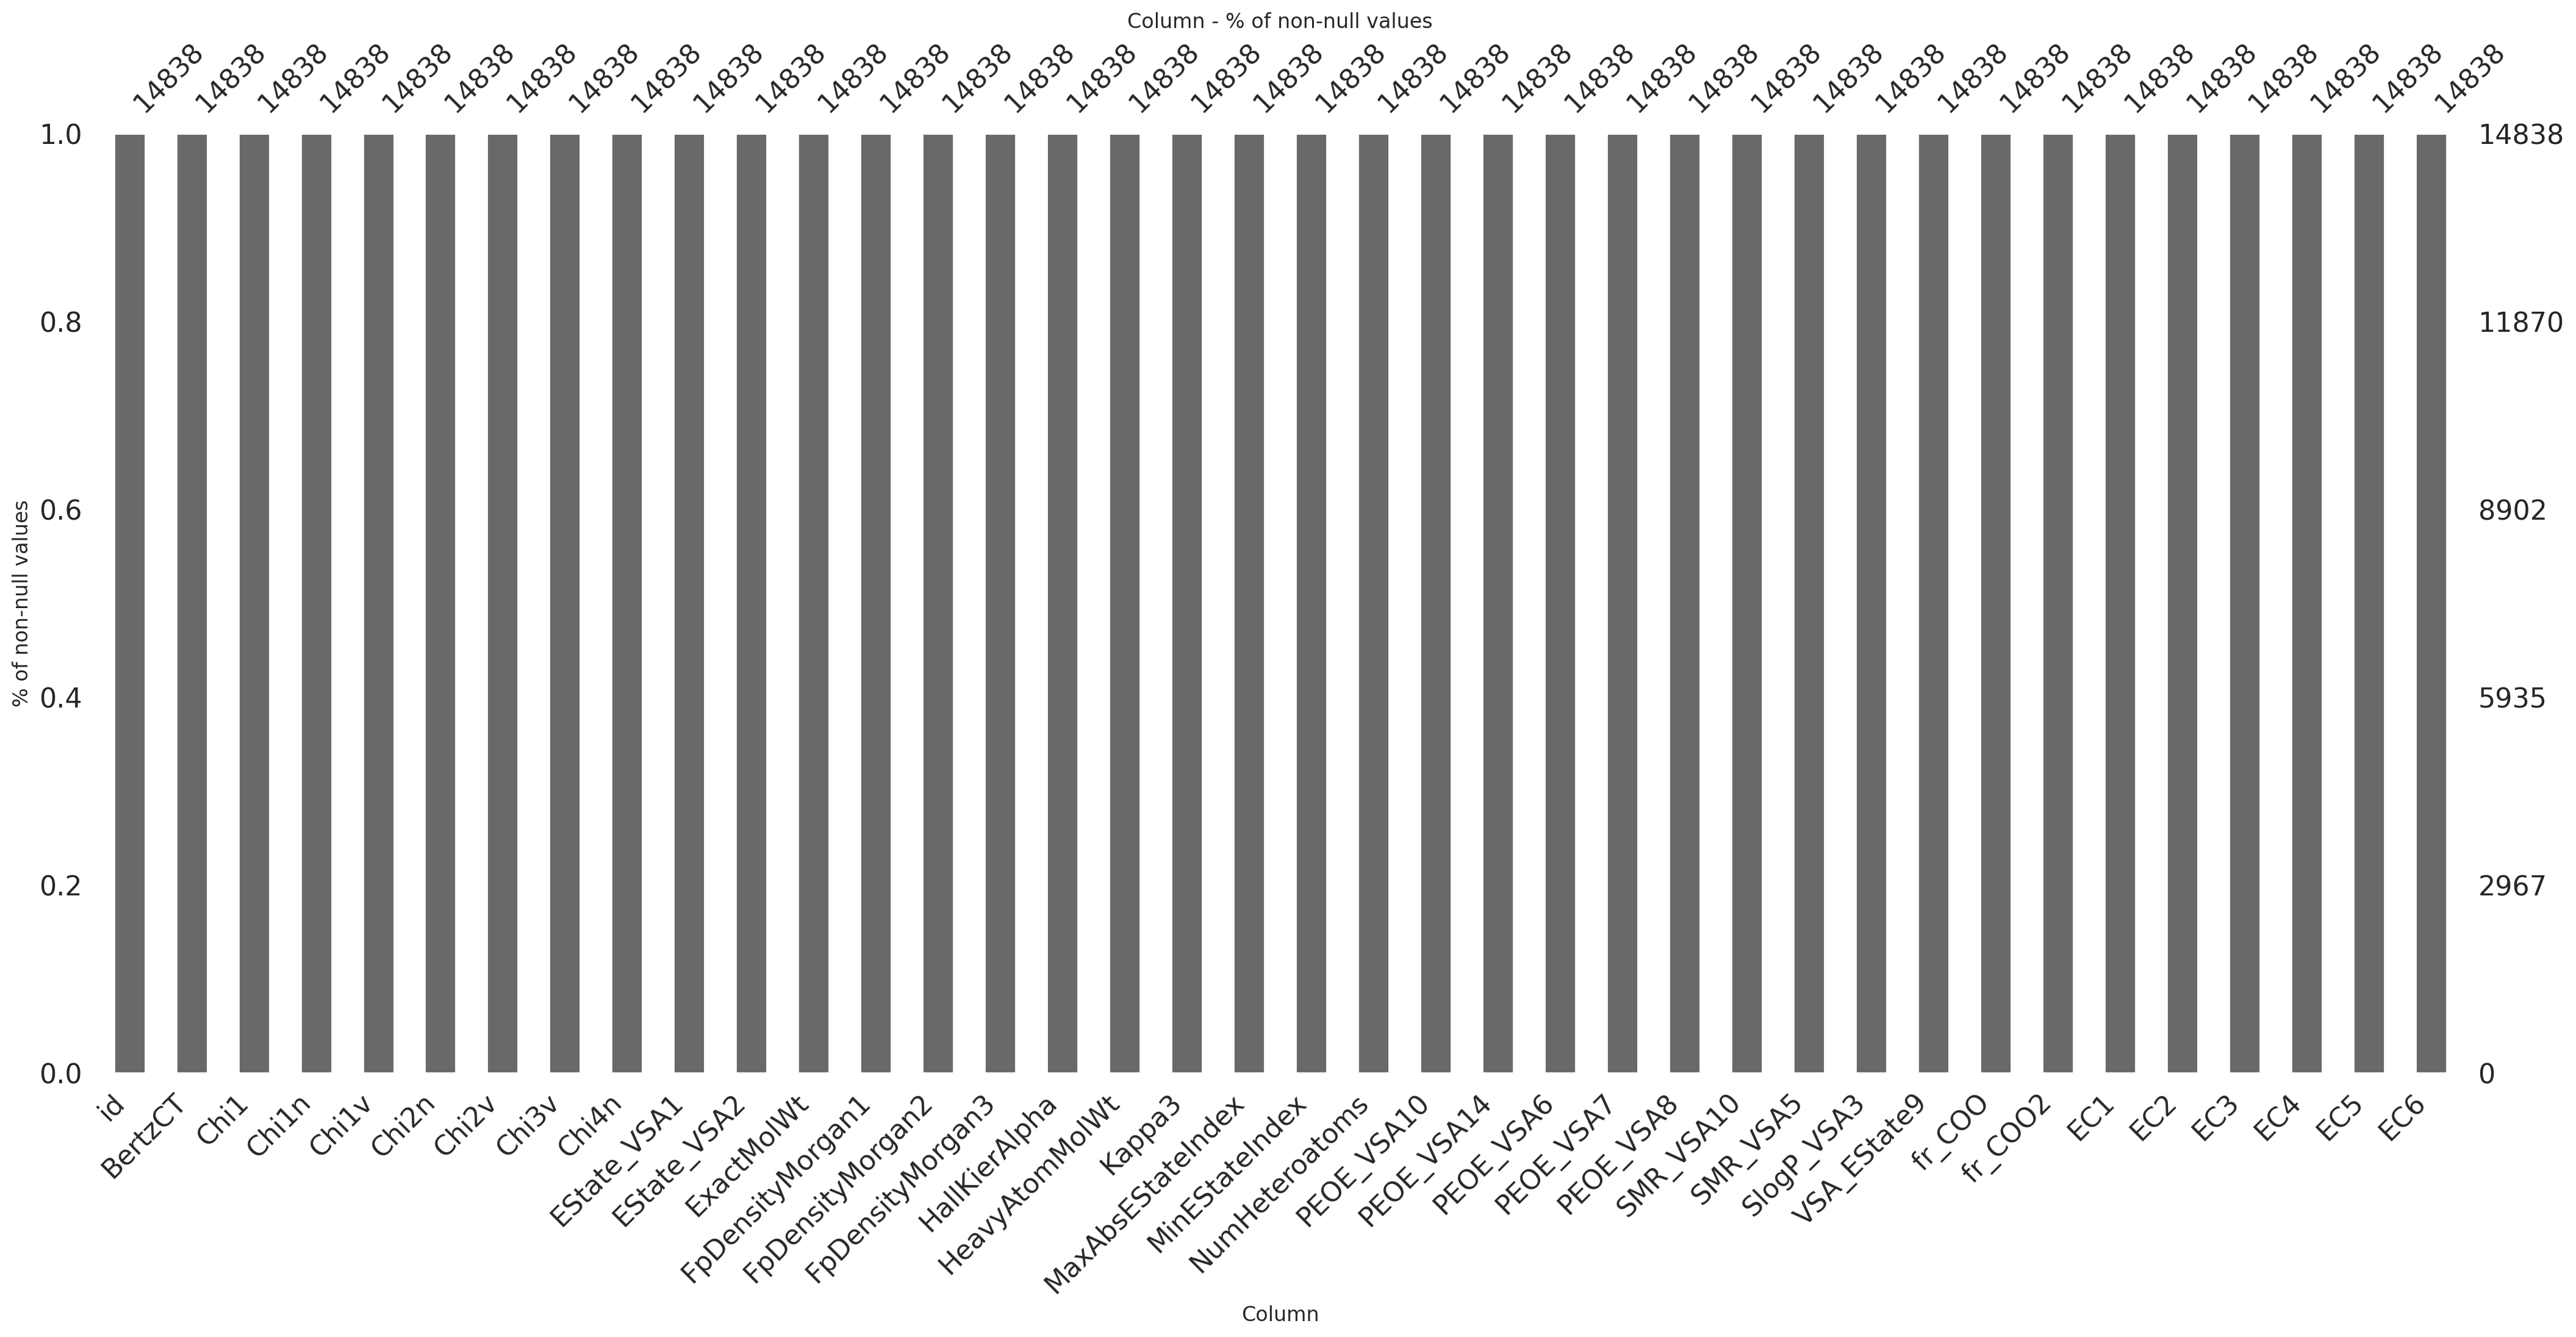

In [47]:
ax = msno.bar(df_train)
ax.set_xlabel("Column")
ax.set_ylabel("% of non-null values")
ax.set_title("Column - % of non-null values")

Text(0.5, 0, 'Column')

Text(0, 0.5, '% of non-null values')

Text(0.5, 1.0, 'Column - % of non-null values')

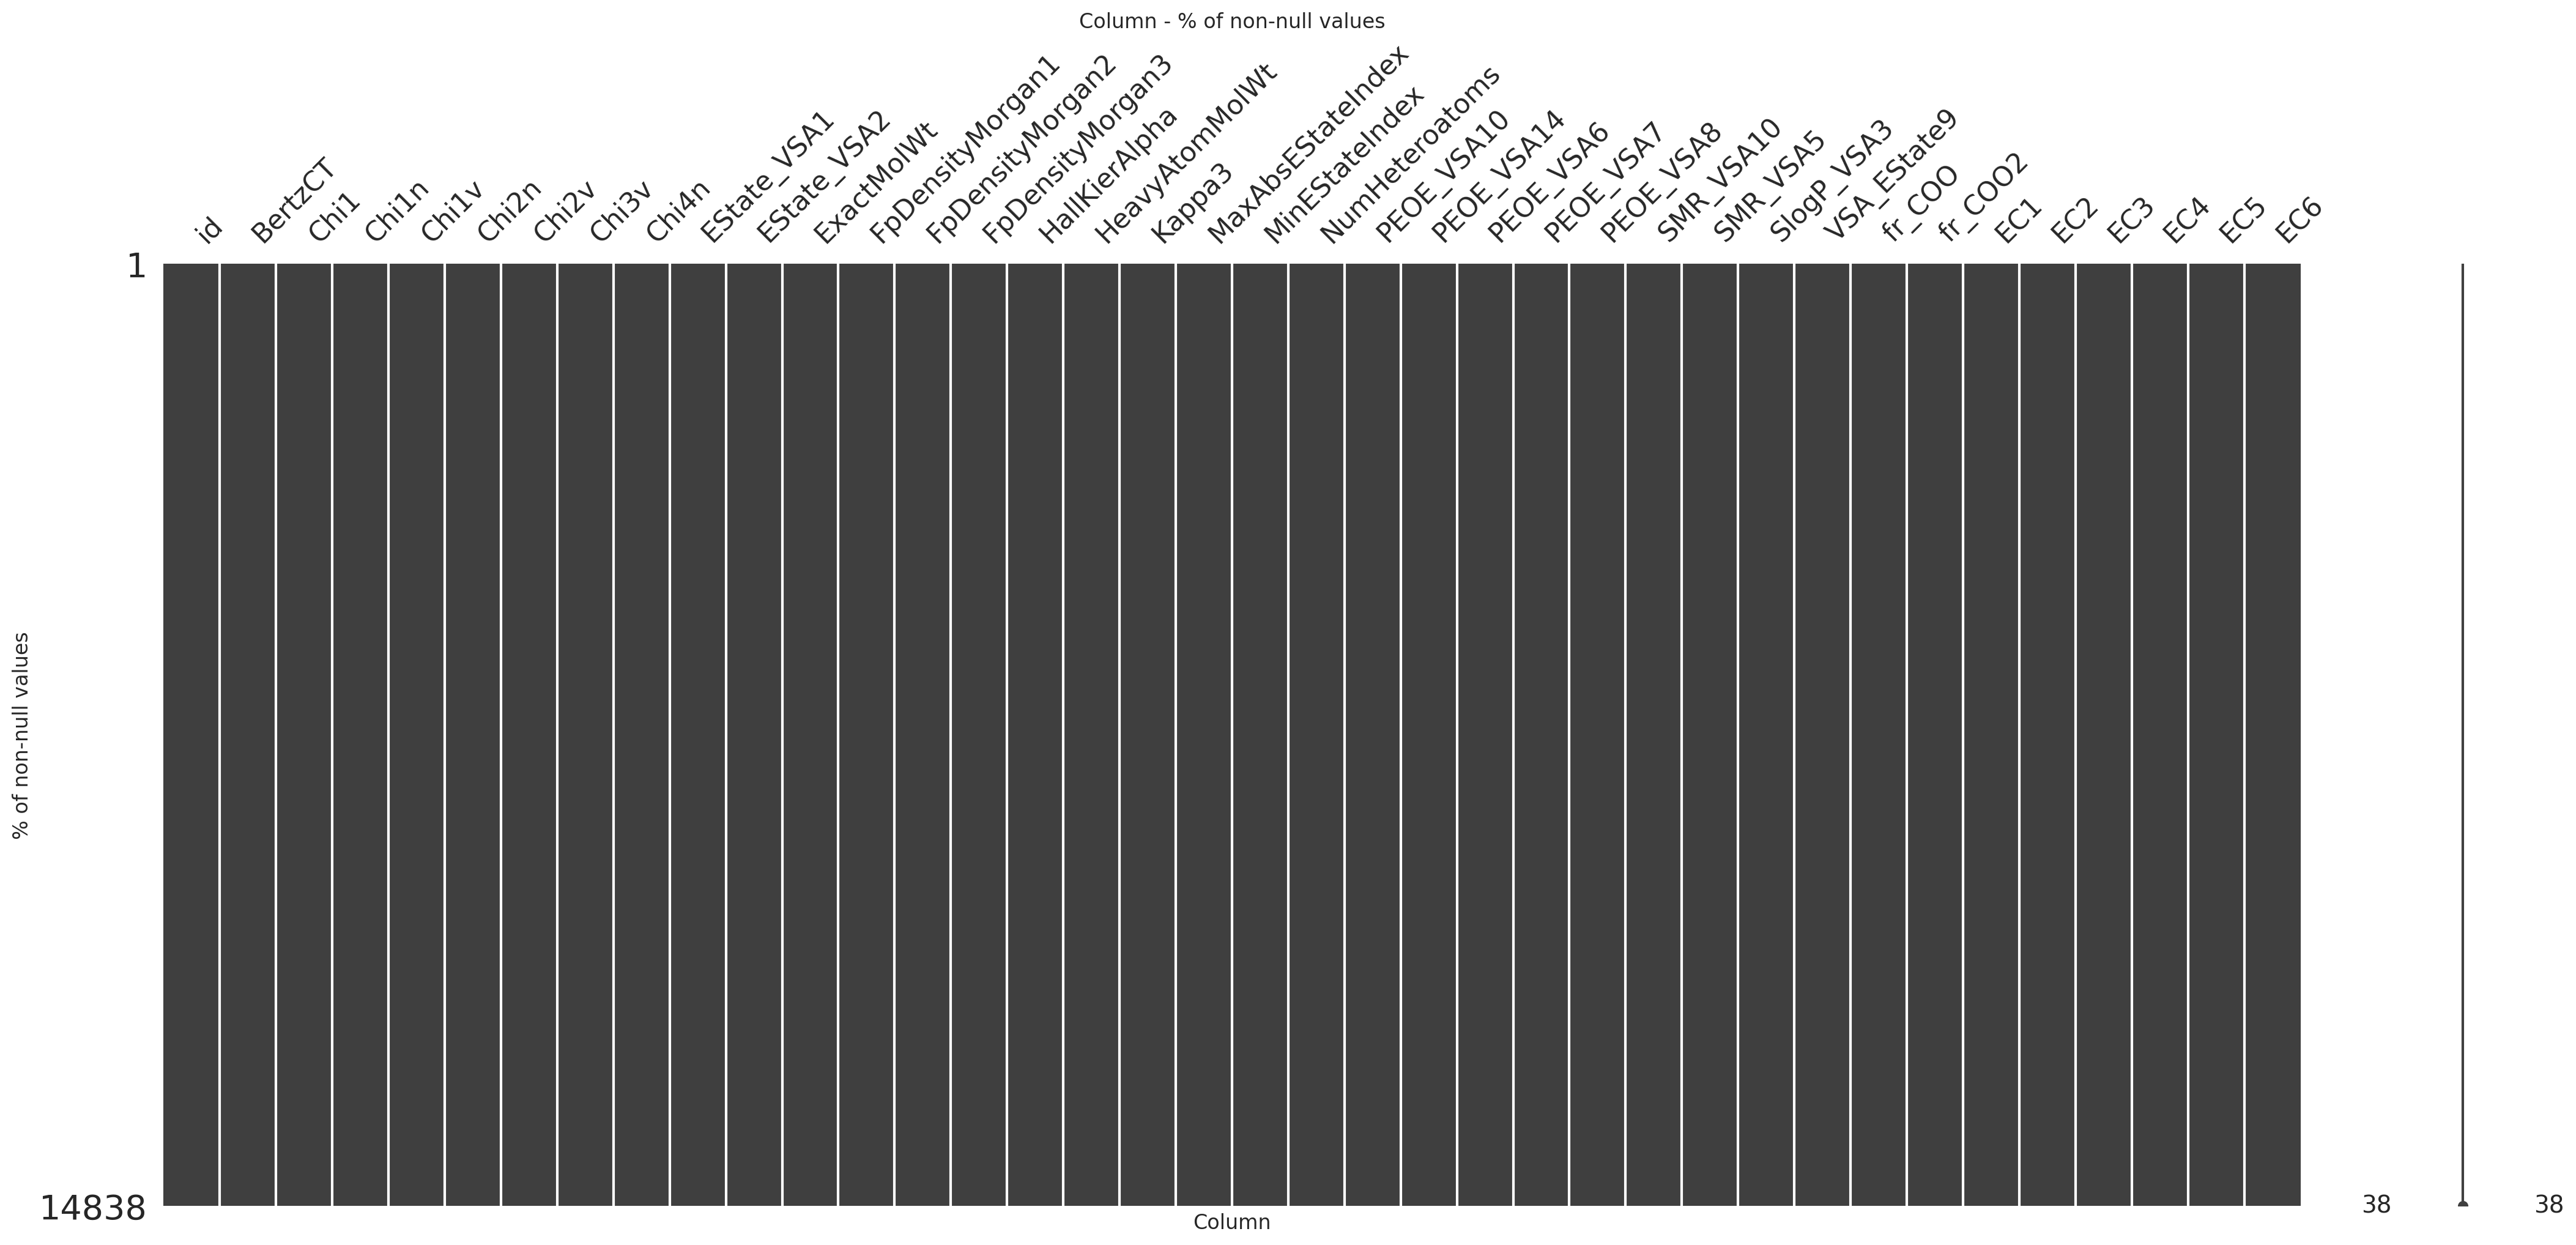

In [48]:
ax = msno.matrix(df_train)
ax.set_xlabel("Column")
ax.set_ylabel("% of non-null values")
ax.set_title("Column - % of non-null values")

### Dataset data types & Statistics

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [50]:
df_train.describe().T.style.bar()

### Target class distribution

In [51]:
df_train

id     BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
0          0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1          1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2          2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3          3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4          4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
...      ...         ...        ...       ...        ...       ...        ...   
14833  14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834  14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  ...  SlogP_VSA3  VSA_EState9  fr_COO  \
0      2.754513  1.749203     0.000000  ...    4.794537    35.527357       0   
1      2.201375  1.289775    45.135471  ...   13.825658    44.707310       0   
2      5.824822  1.770579    15.645394  ...   17.964475    45.660120       0   
3      7.914542  3.067181    95.639554  ...   31.961948    87.509997       0   
4      1.036450  0.727664    17.980451  ...    9.589074    33.333333       2   
...         ...       ...          ...  ...         ...          ...     ...   
14833  3.670528  1.770579    32.971529  ...   18.947452    61.376610       0   
14834  0.174620  0.000000     0.000000  ...    0.000000    10.000000       0   
14835  3.064846  2.133897    17.248535  ...    0.000000    66.666667       0   
14836  3.978973  2.299833    45.623794  ...    9.088795    45.583333       0   
14837  5.645502  3.312893    82.448246  ...   22.701338    71.127044       0   

       fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
0            0    1    1    0    0    0    0  
1            0    0    1    1    0    0    0  
2            0    1    1    0    0    1    0  
3            0    1    1    0    0    0    0  
4            2    1    0    1    1    1    0  
...        ...  ...  ...  ...  ...  ...  ...  
14833        0    1    1    0    0    0    0  
14834        0    0    1    0    1    0    0  
14835        0    1    1    0    0    0    0  
14836        0    0    1    1    0    0    0  
14837        0    0    1    0    1    0    0  

[14838 rows x 38 columns]

- We need only EC1 and EC2, so remove EC3 to EC6
- Also, id is unique, so remove it

In [52]:
df_train.drop(['EC3', 'EC4', 'EC5', 'EC6'], axis=1, inplace=True)

In [53]:
df_train.drop(['id'], axis=1, inplace=True)

In [54]:
df_train

BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
0      323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2      521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4      112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
...           ...        ...       ...        ...       ...        ...   
14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ...  PEOE_VSA7  \
0      2.754513  1.749203     0.000000    11.938294  ...   0.000000   
1      2.201375  1.289775    45.135471     0.000000  ...   0.000000   
2      5.824822  1.770579    15.645394     6.606882  ...  53.378235   
3      7.914542  3.067181    95.639554     0.000000  ...   0.000000   
4      1.036450  0.727664    17.980451    12.841643  ...  19.386400   
...         ...       ...          ...          ...  ...        ...   
14833  3.670528  1.770579    32.971529     6.606882  ...  13.847474   
14834  0.174620  0.000000     0.000000     0.000000  ...   0.000000   
14835  3.064846  2.133897    17.248535     0.000000  ...   0.000000   
14836  3.978973  2.299833    45.623794     0.000000  ...   0.000000   
14837  5.645502  3.312893    82.448246     5.687386  ...  37.107112   

       PEOE_VSA8  SMR_VSA10    SMR_VSA5  SlogP_VSA3  VSA_EState9  fr_COO  \
0       0.000000  17.744066    0.000000    4.794537    35.527357       0   
1       0.000000   7.822697   30.705892   13.825658    44.707310       0   
2       0.000000  15.645394   73.143616   17.964475    45.660120       0   
3       6.420822  15.645394   62.107304   31.961948    87.509997       0   
4       0.000000  11.938611   18.883484    9.589074    33.333333       2   
...          ...        ...         ...         ...          ...     ...   
14833   6.923737  34.407699   32.607024   18.947452    61.376610       0   
14834   6.066367   0.000000    6.420822    0.000000    10.000000       0   
14835  23.762553  10.969244    0.000000    0.000000    66.666667       0   
14836   0.000000   7.822697  108.961047    9.088795    45.583333       0   
14837   0.000000  32.757611   38.704130   22.701338    71.127044       0   

       fr_COO2  EC1  EC2  
0            0    1    1  
1            0    0    1  
2            0    1    1  
3            0    1    1  
4            2    1    0  
...        ...  ...  ...  
14833        0    1    1  
14834        0    0    1  
14835        0    1    1  
14836        0    0    1  
14837        0    0    1  

[14838 rows x 33 columns]

In [55]:
def draw_class_distribution(column, df_train, axes, palette):
    
    ax = sns.countplot(x=column,
                       edgecolor="black",
                       data=df_train,
                       palette=palette, ax=axes)
    axes.set_title( column+' Class distribution',
              fontdict={
                  'fontsize': 16,
                  'color': 'black',
                  'fontweight': 'bold'
              })

    axes.set_xlabel("Class")
    axes.set_ylabel("Count")
    

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f') + " (" +
                    str(round(
                        ((p.get_height() / df_train.shape[0]) * 100), 1)) + " %)",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    fontsize=12,
                    fontweight='bold',
                    xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()


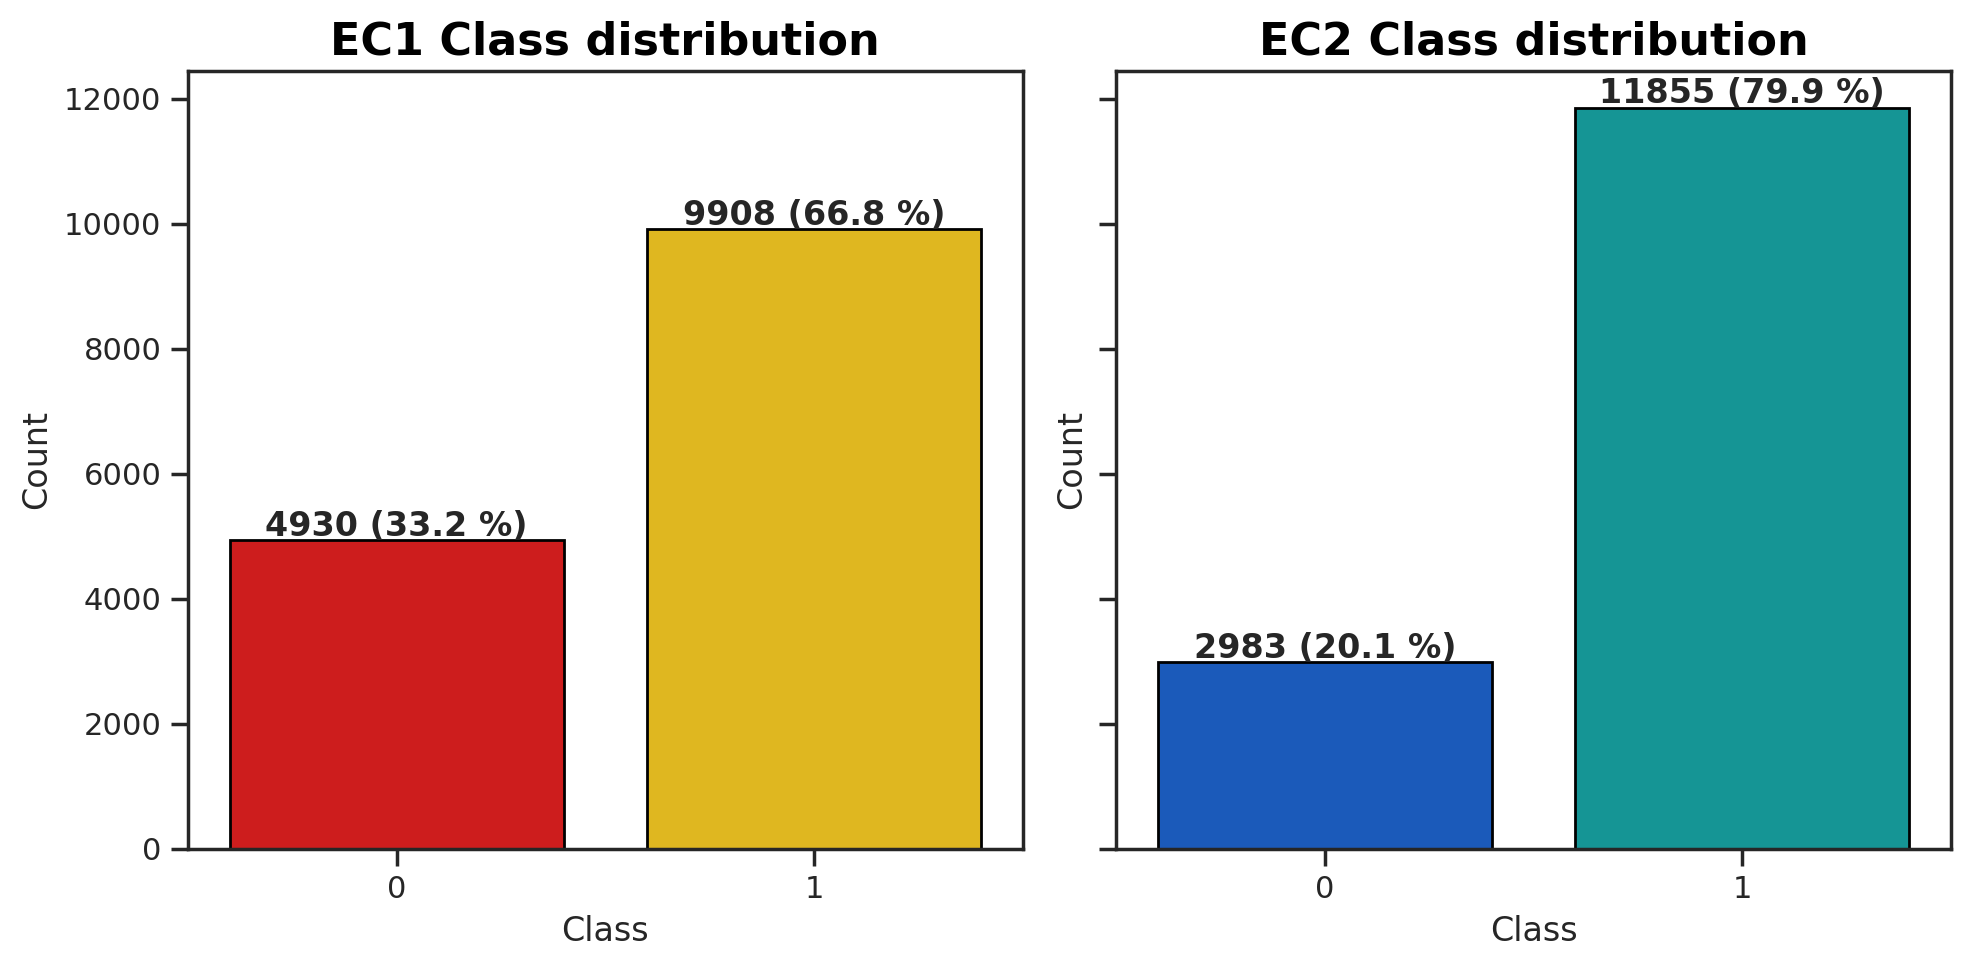

In [56]:
fig, ax_ = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
draw_class_distribution("EC1", df_train, ax_[0], "hot")
draw_class_distribution("EC2", df_train, ax_[1], "winter")

### Exploring features

In [57]:
def plot_hist_box_violin(dataframe, column, bins, hue):
    fig, (ax_box, ax_hist, ax_violin) = plt.subplots(
        3,
        1,
        figsize=(10, 6),
        sharex='col',
        gridspec_kw={"height_ratios": (.2, .5, .2)})
    sns.boxplot(data=dataframe, x=column, ax=ax_box, palette="cool")
    sns.histplot(data=dataframe,
                 x=column,
                 kde=True,
                 bins=bins,
                 ax=ax_hist,
                 hue=hue,
                 palette="spring")
    sns.rugplot(data=dataframe, x=column, ax=ax_hist, color='red')
    sns.violinplot(data=dataframe, x=column, ax=ax_violin, palette="Wistia")
    plt.style.use("dark_background")
    plt.tight_layout()

/tmp/ipykernel_33/785111549.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax_box, ax_hist, ax_violin) = plt.subplots(


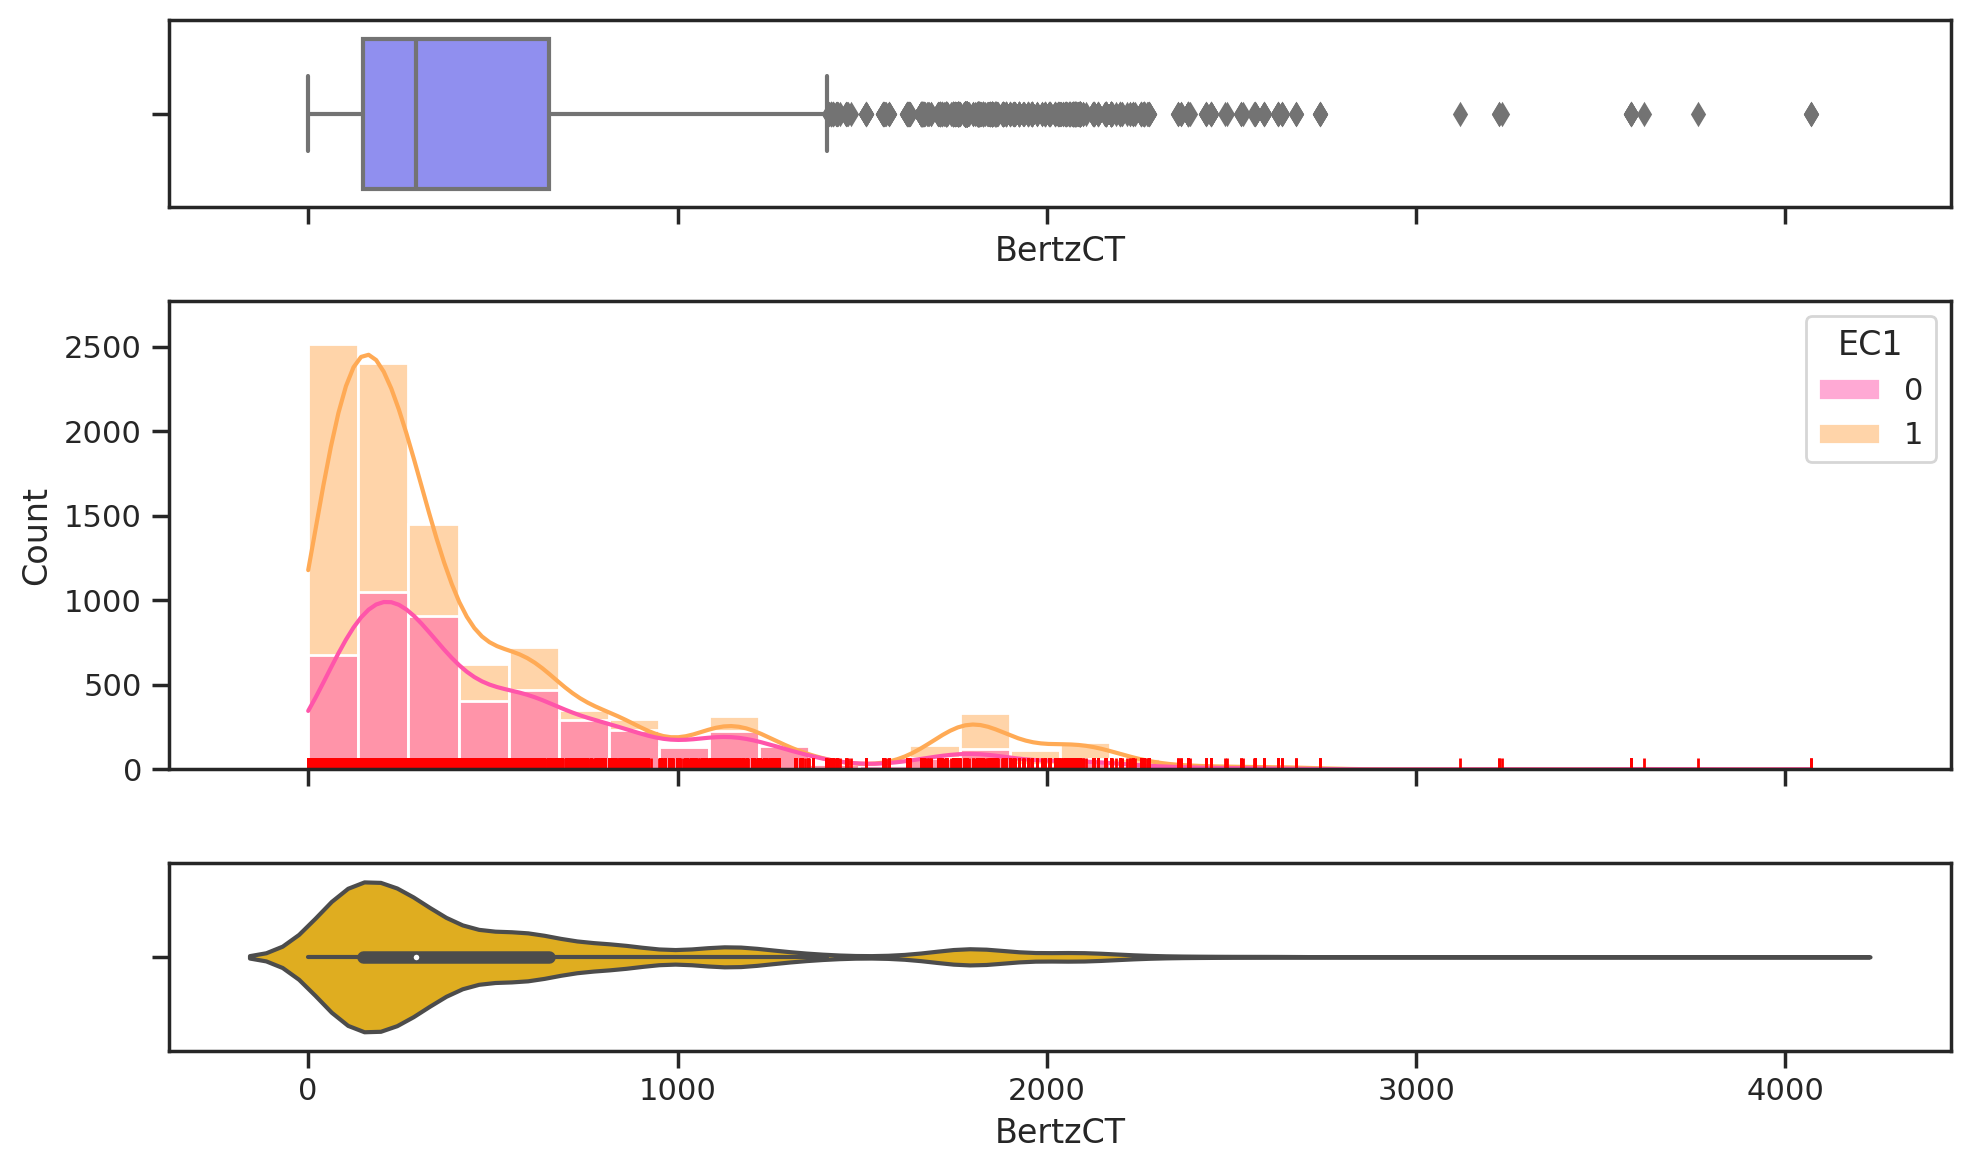

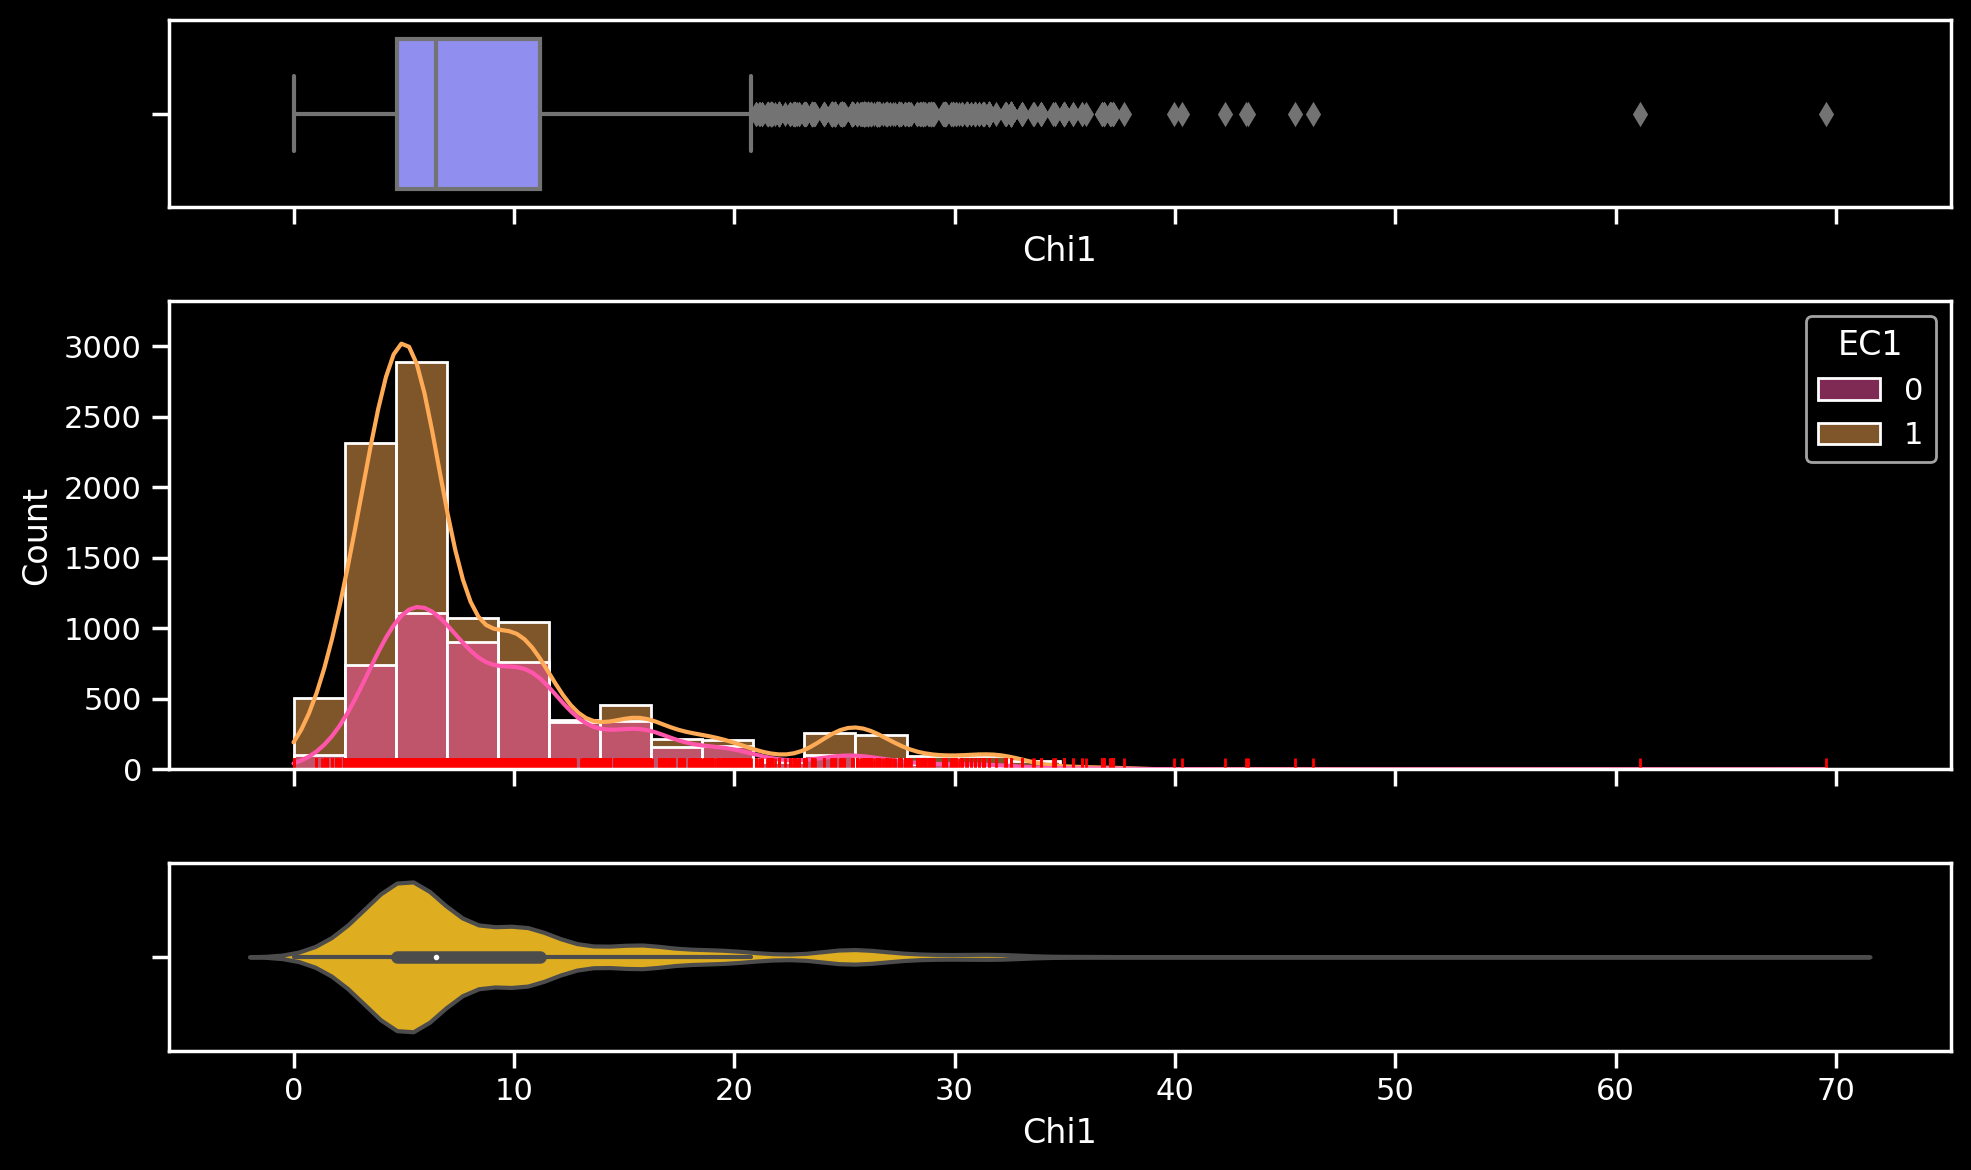

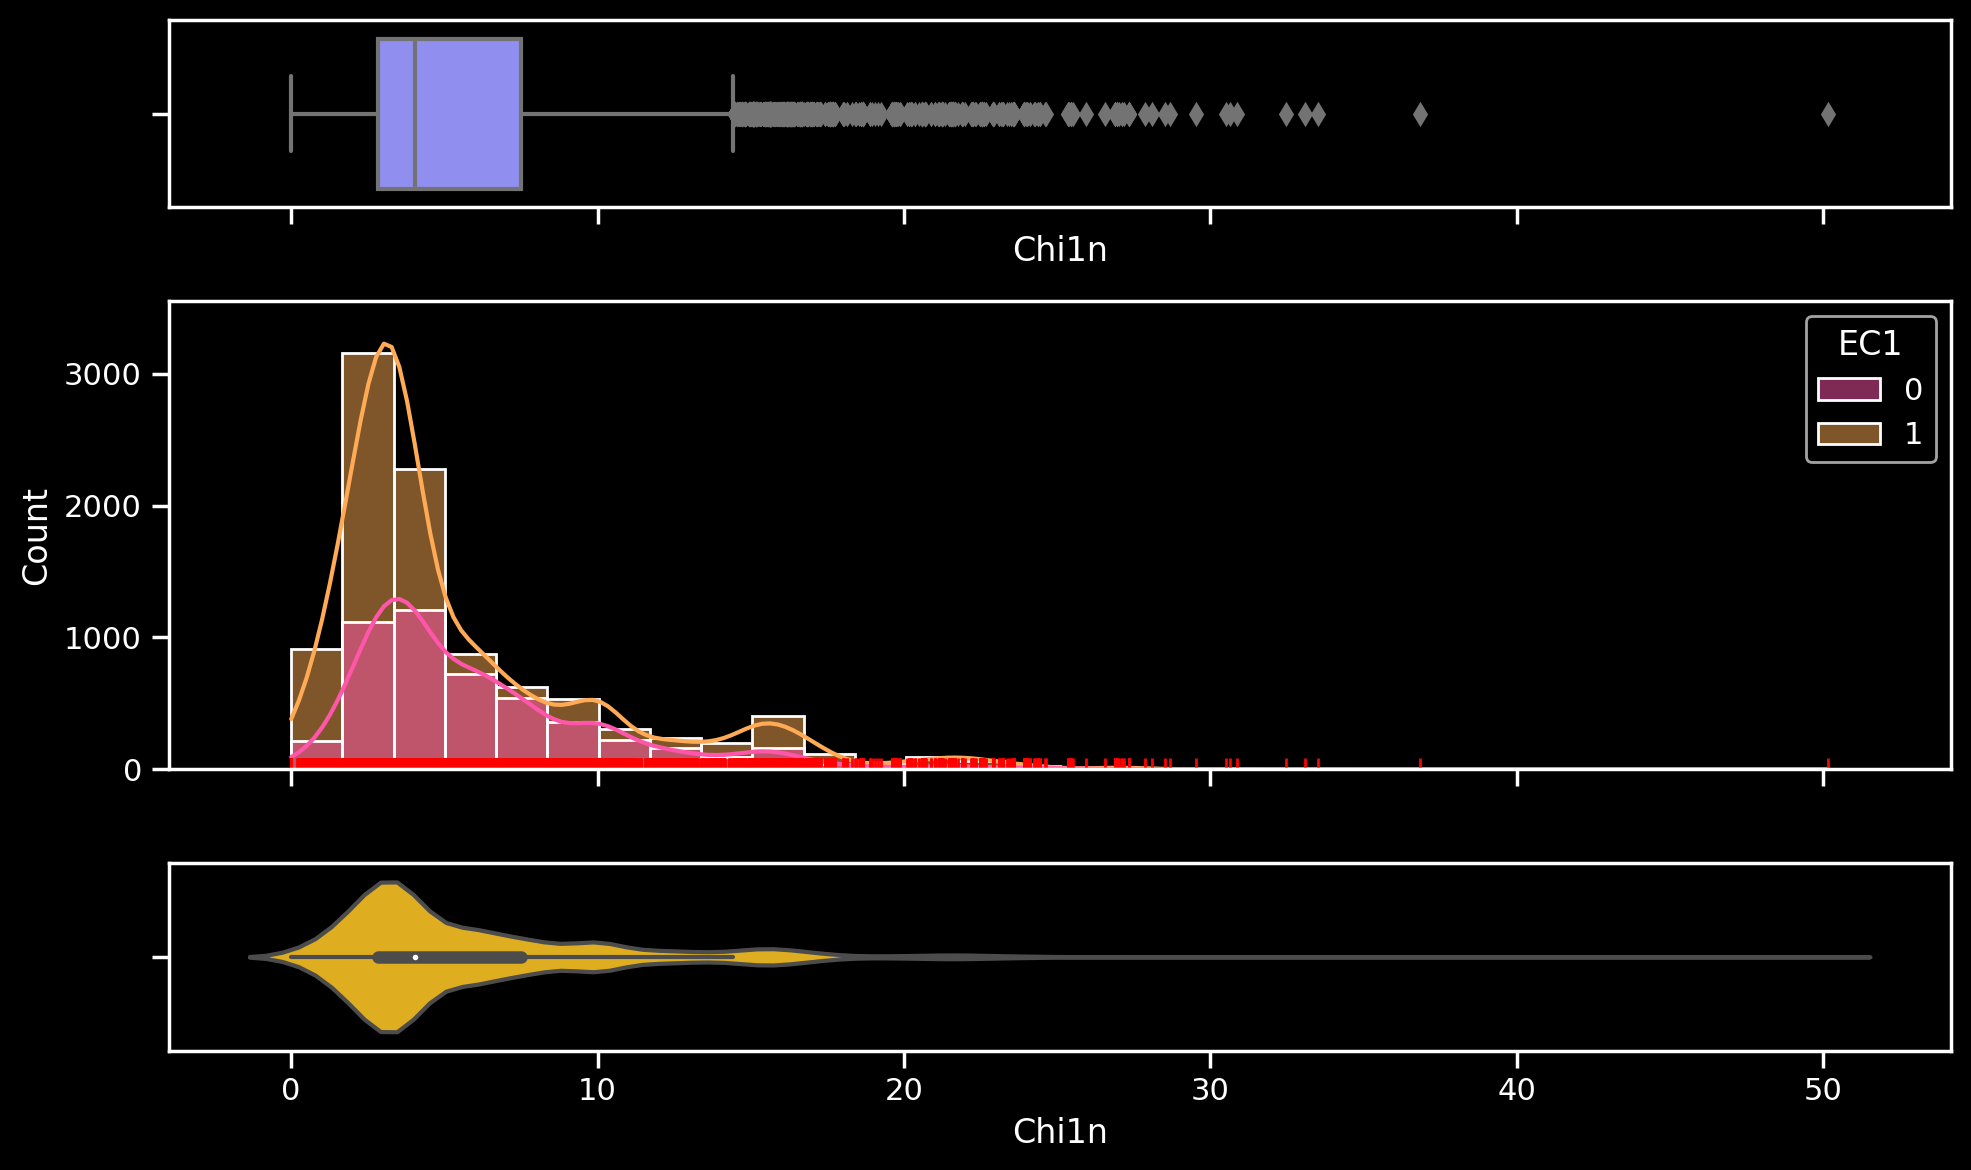

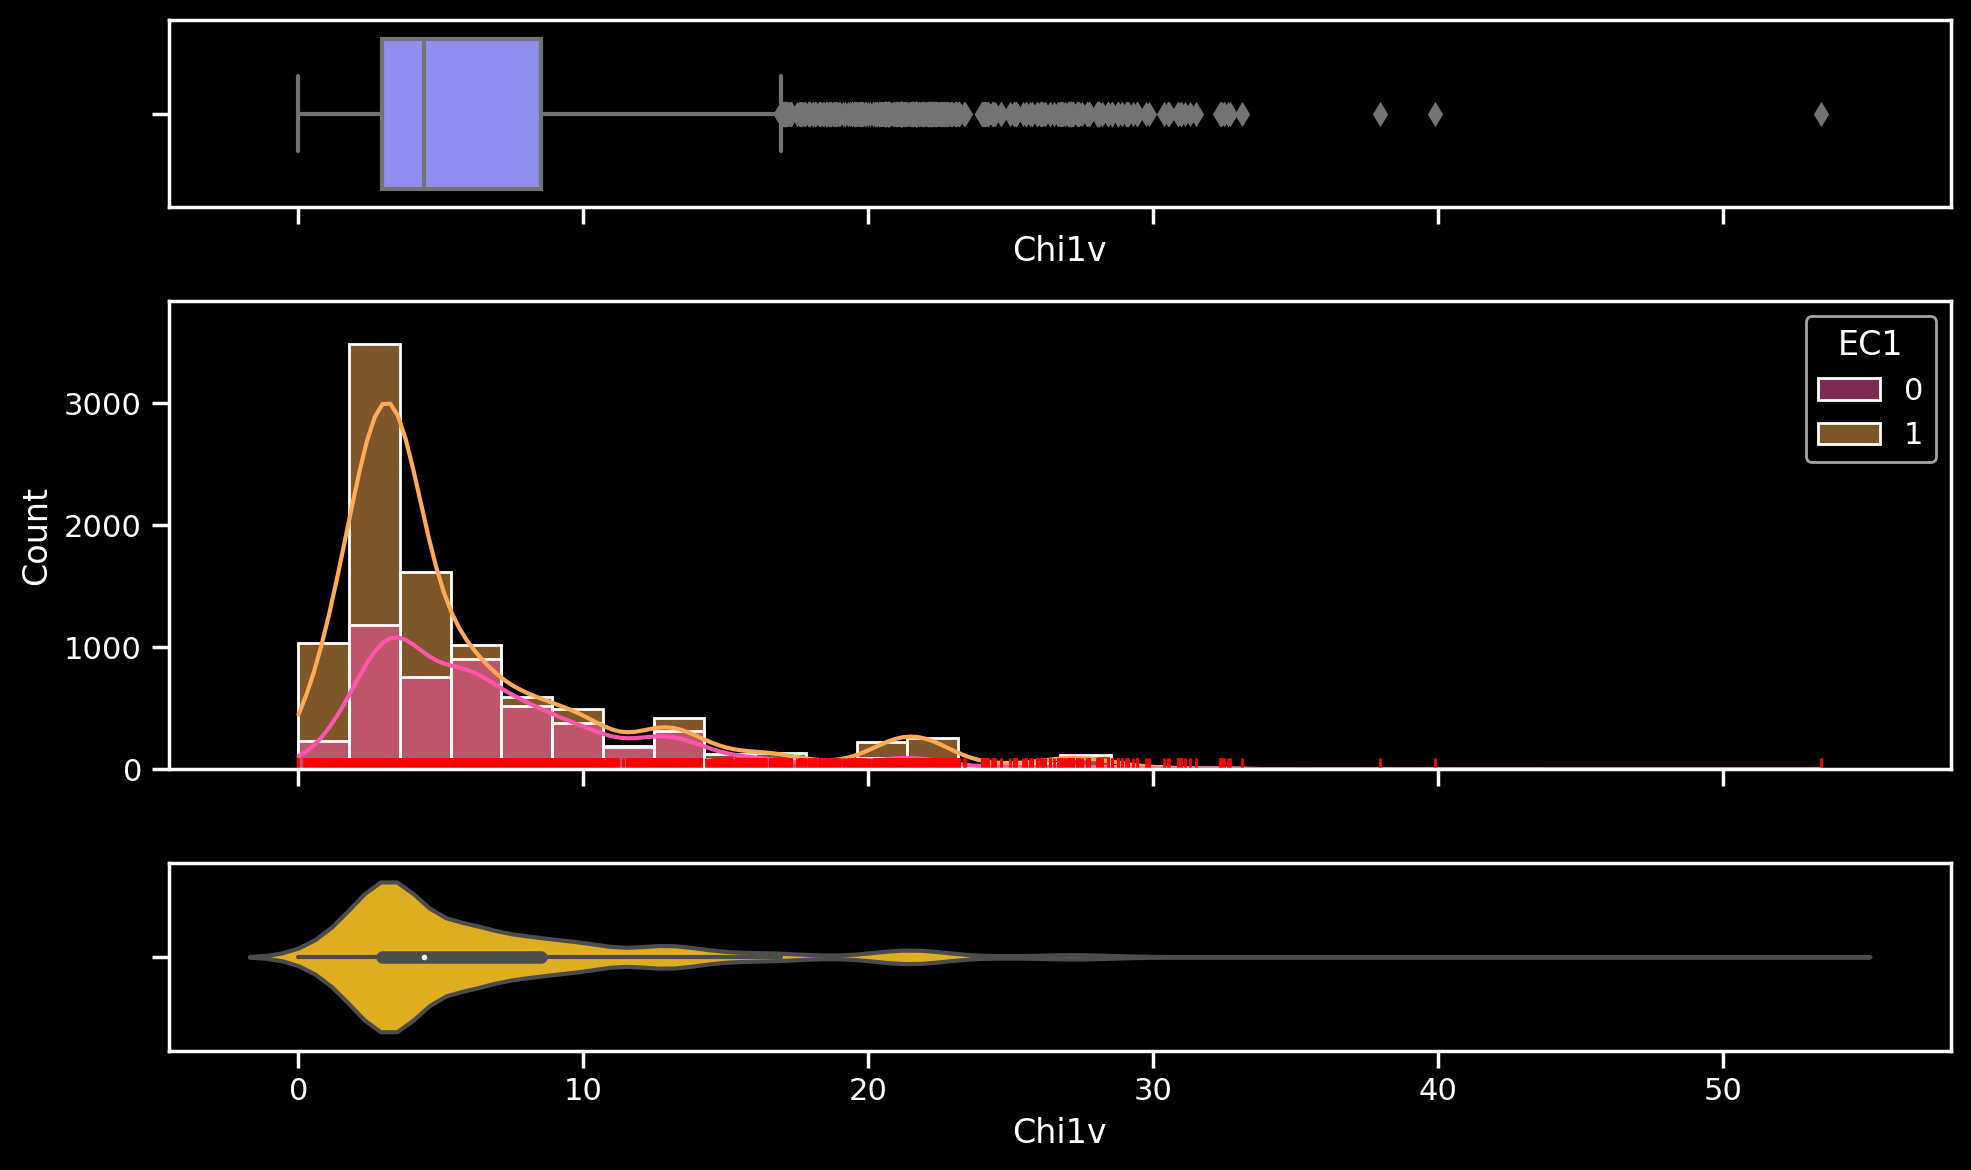

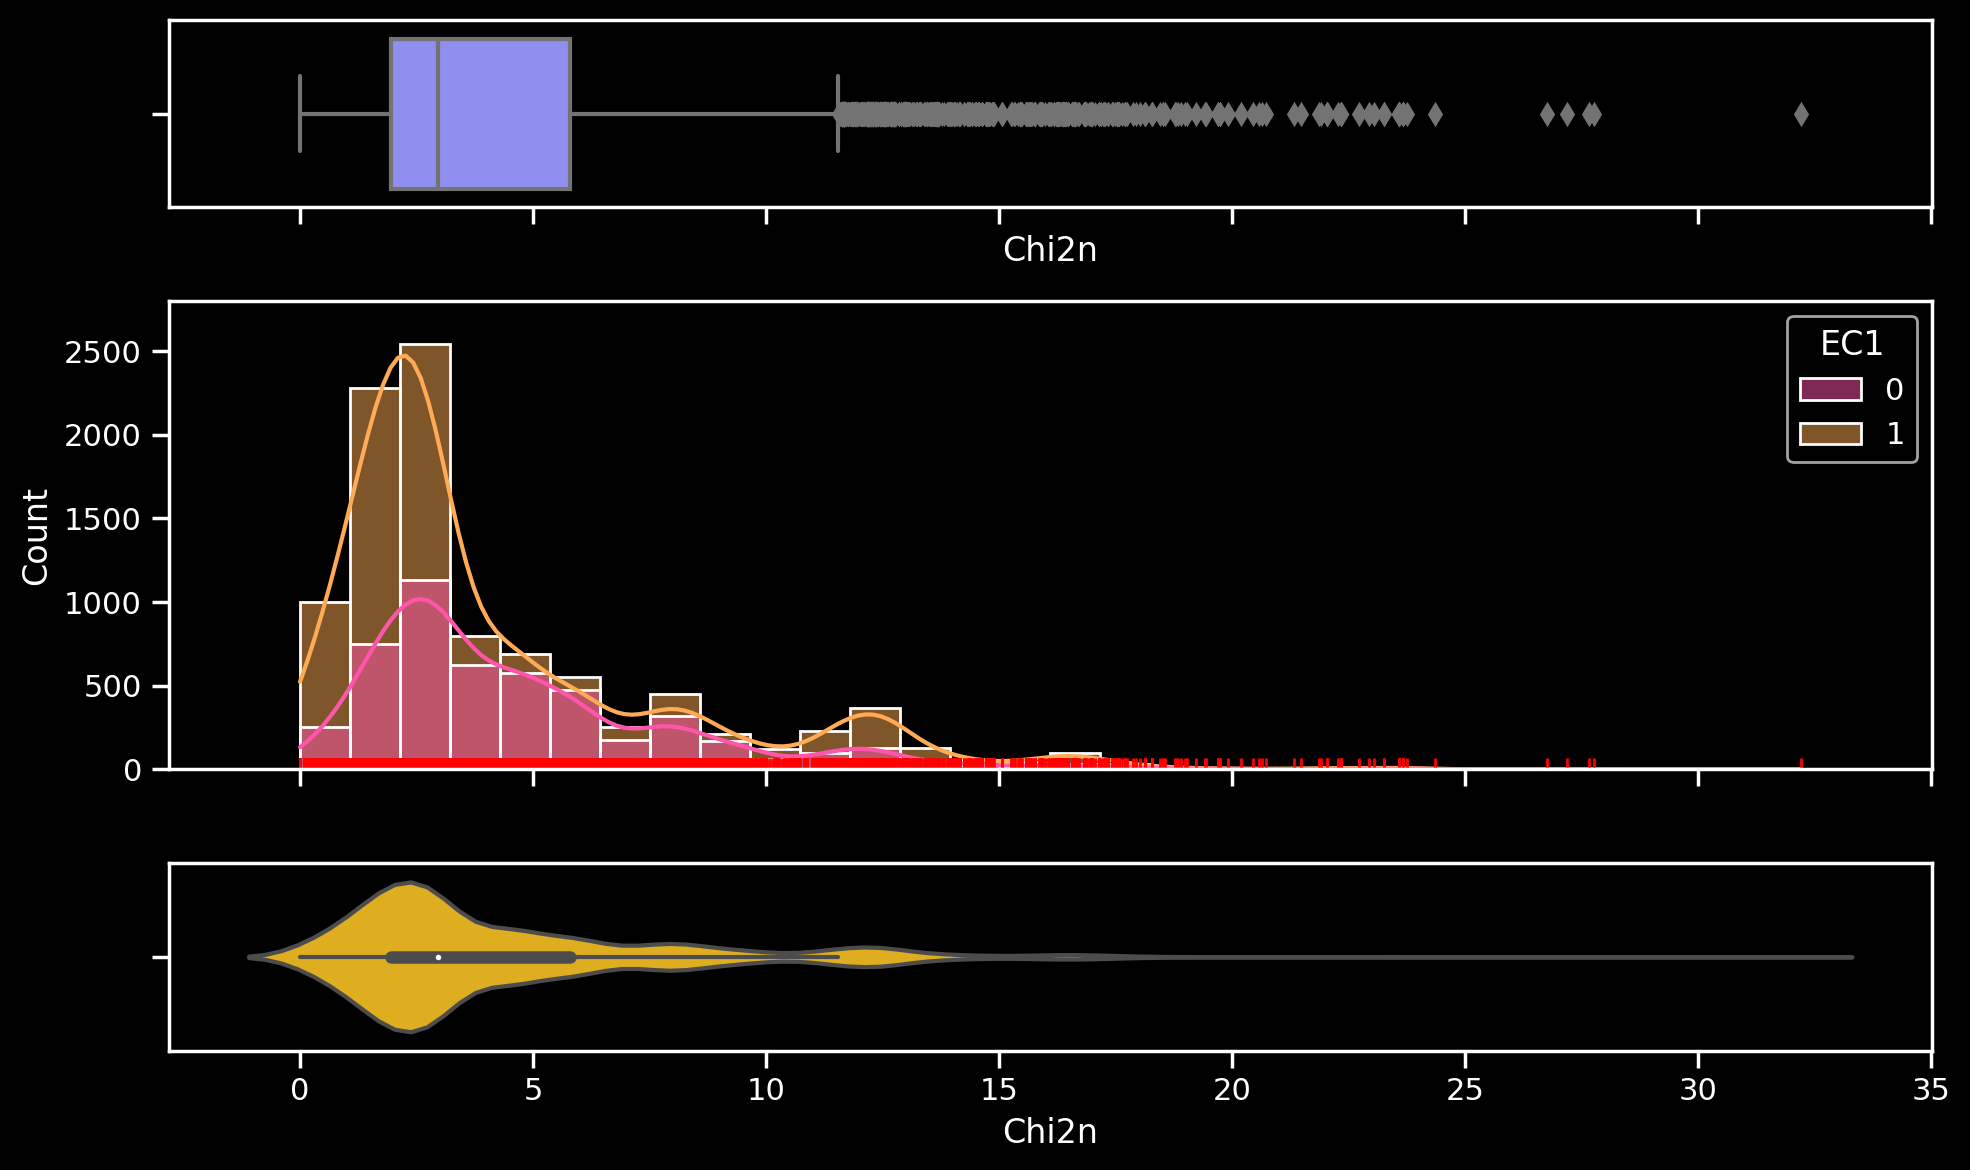

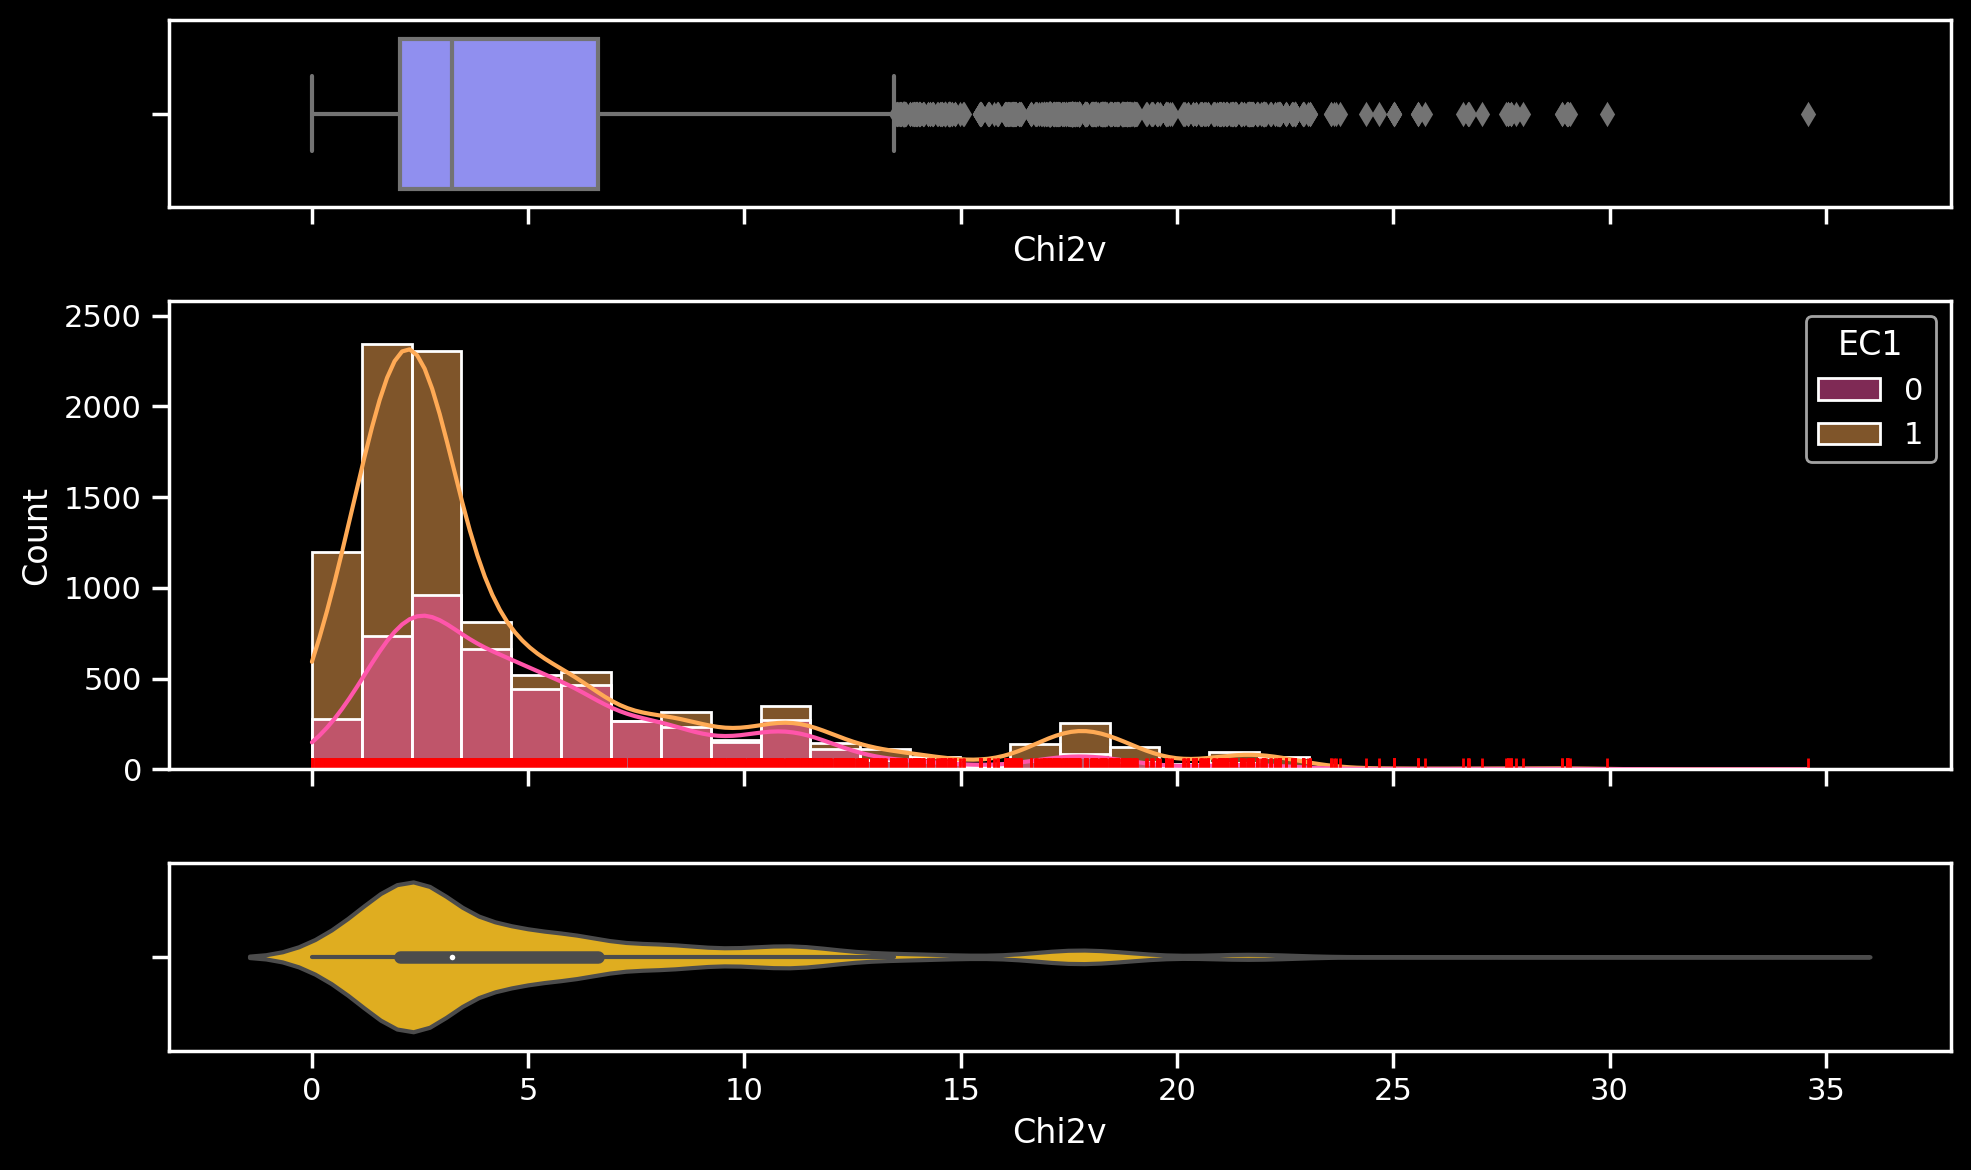

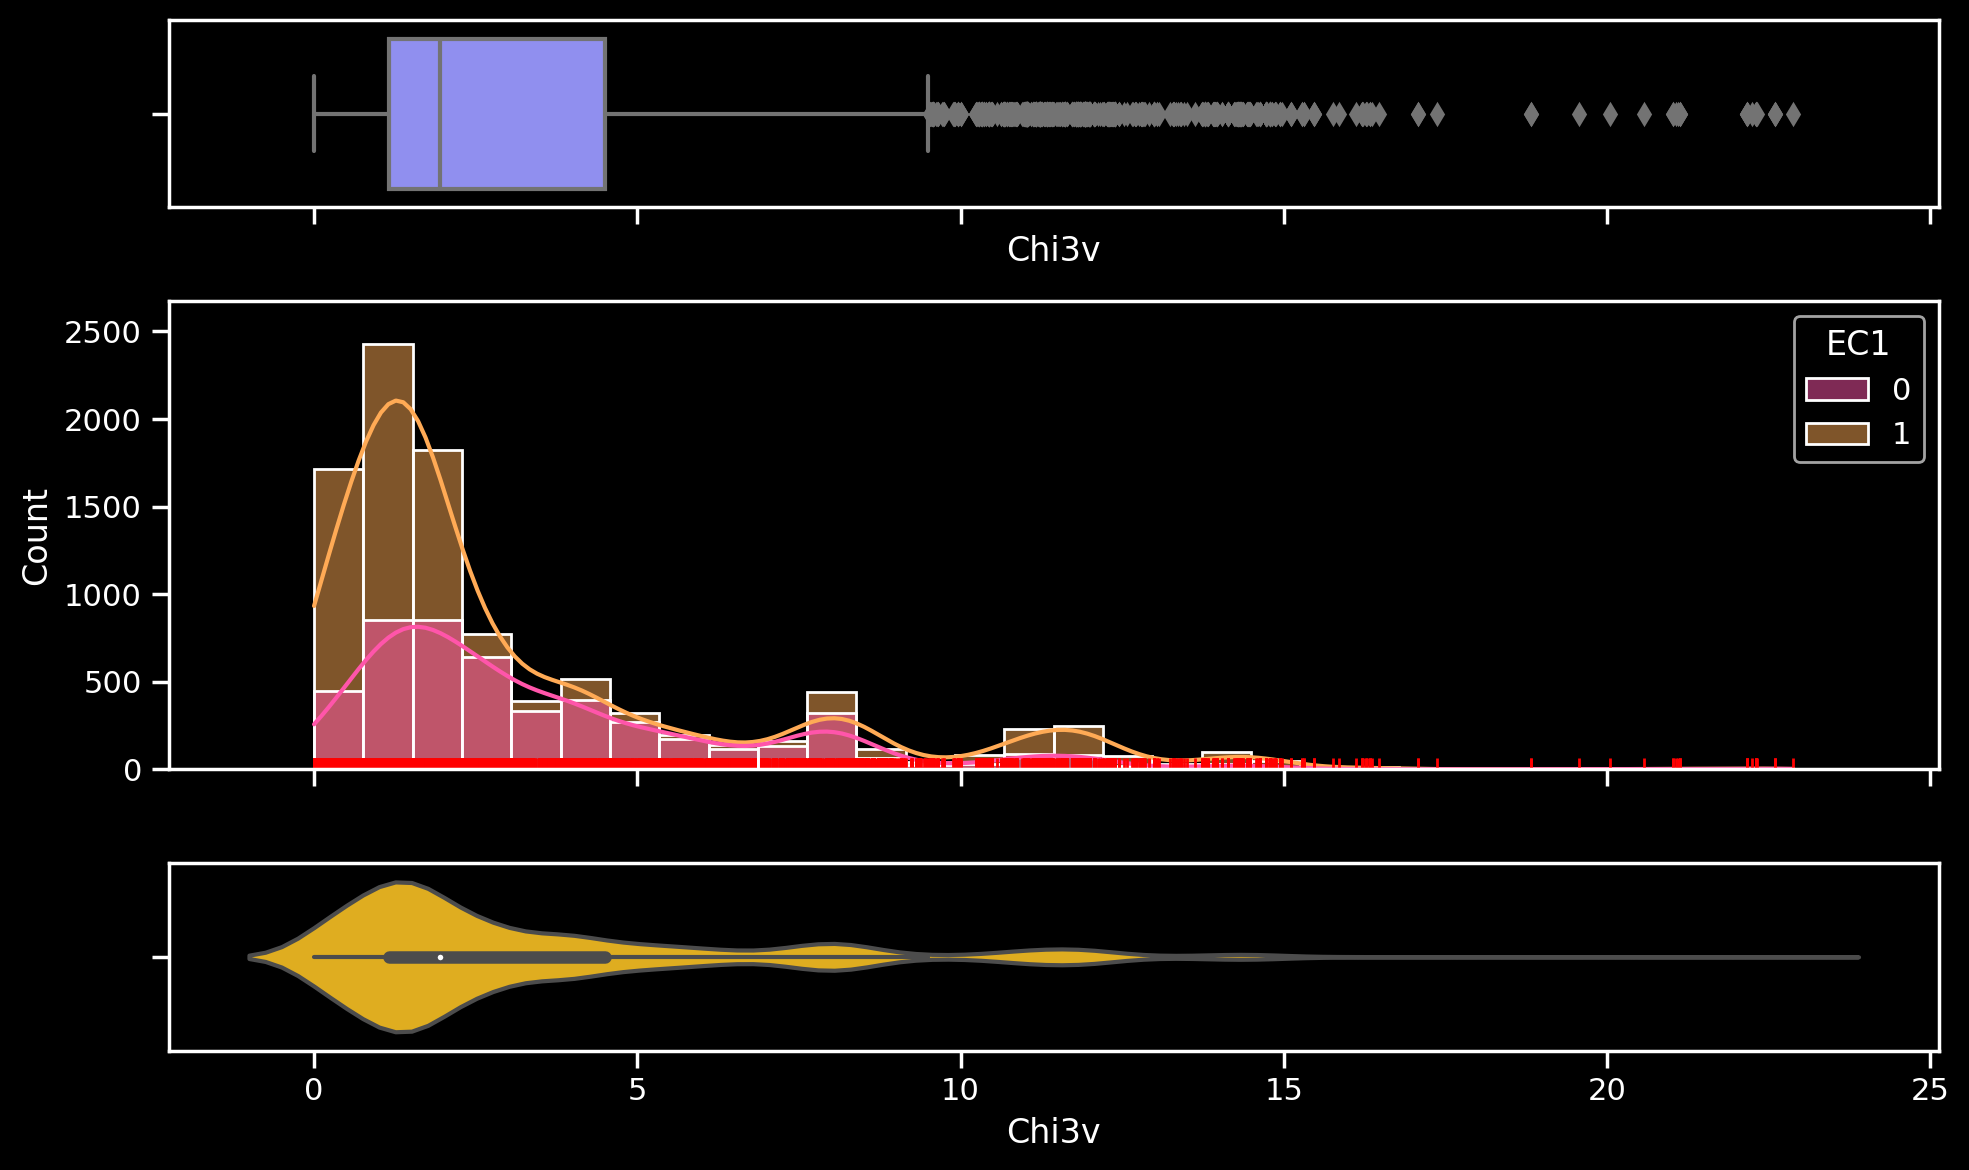

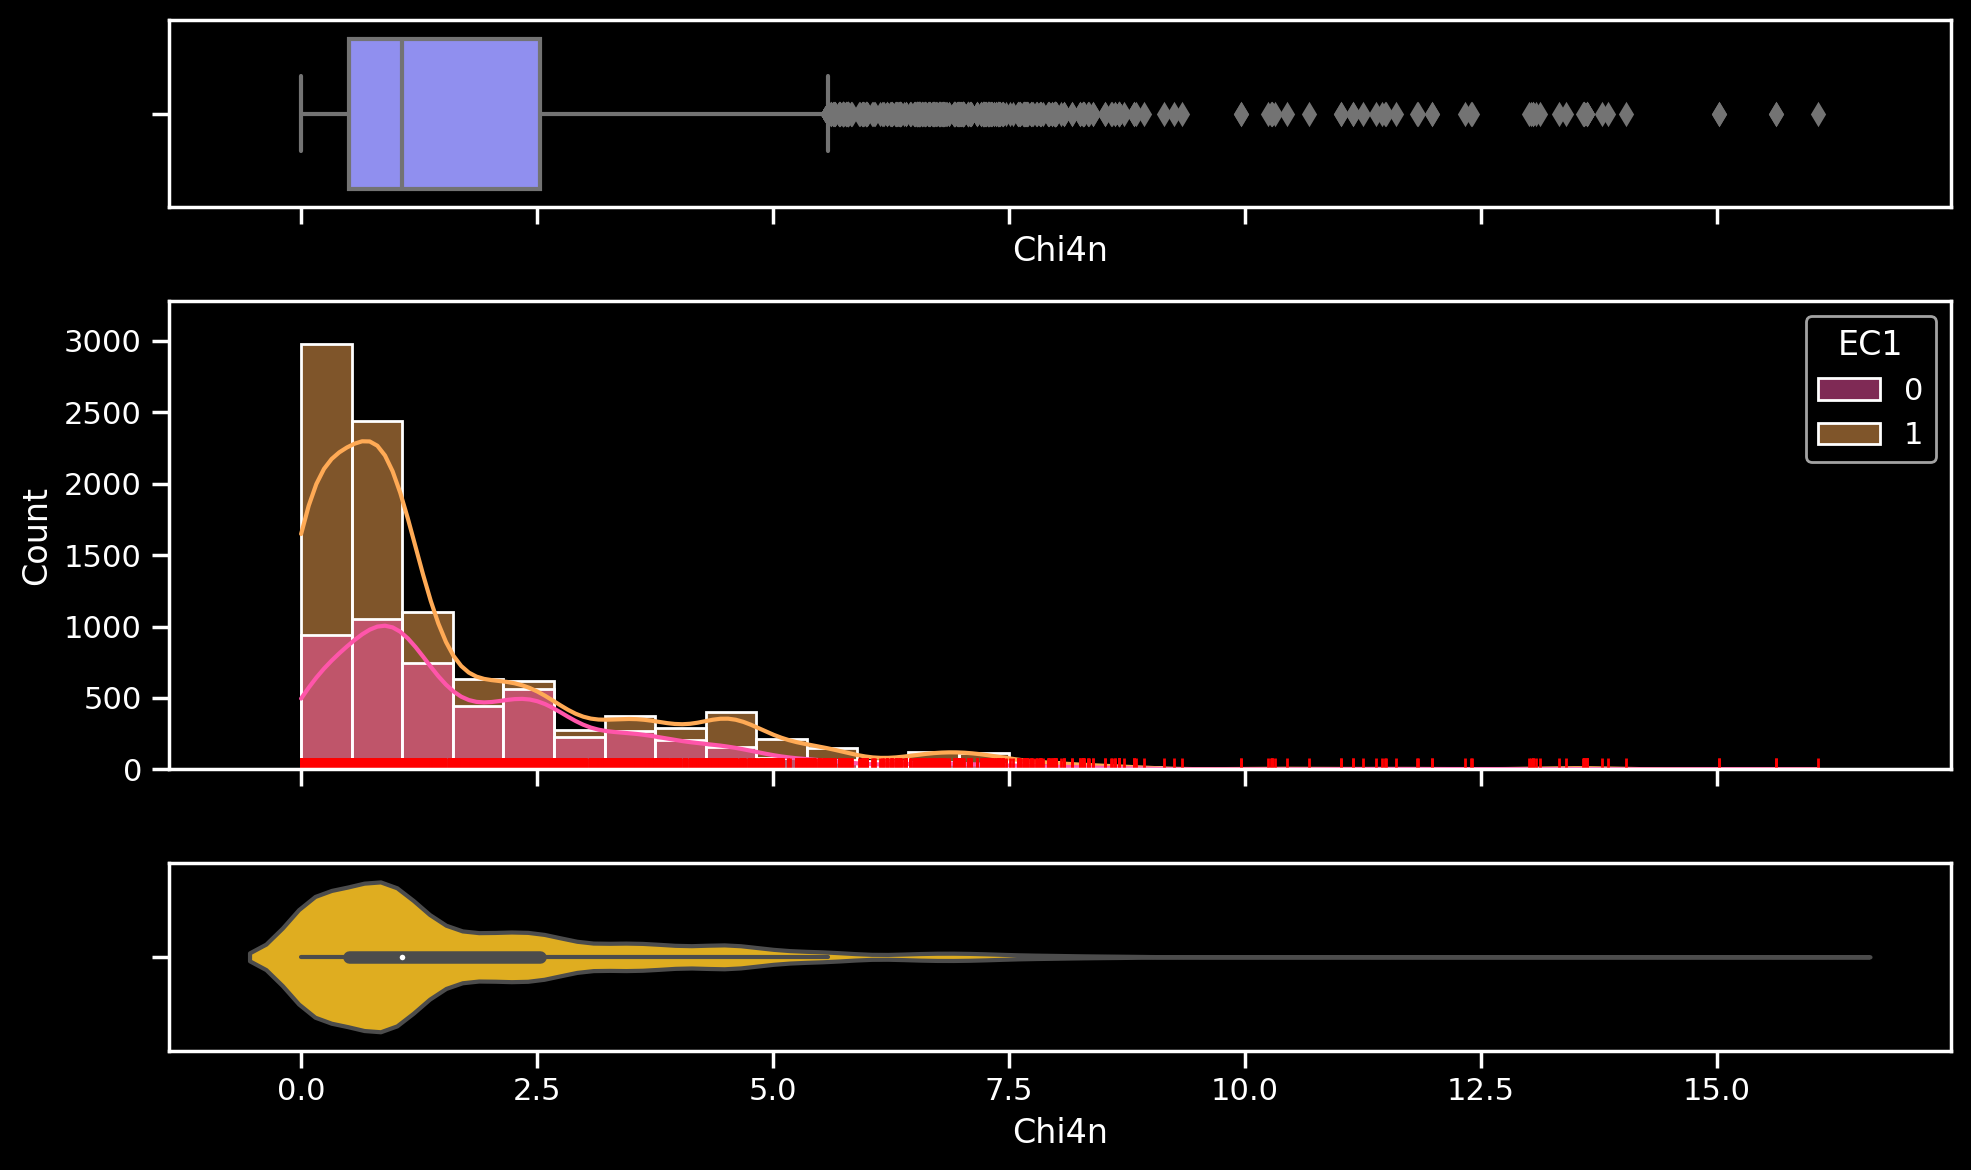

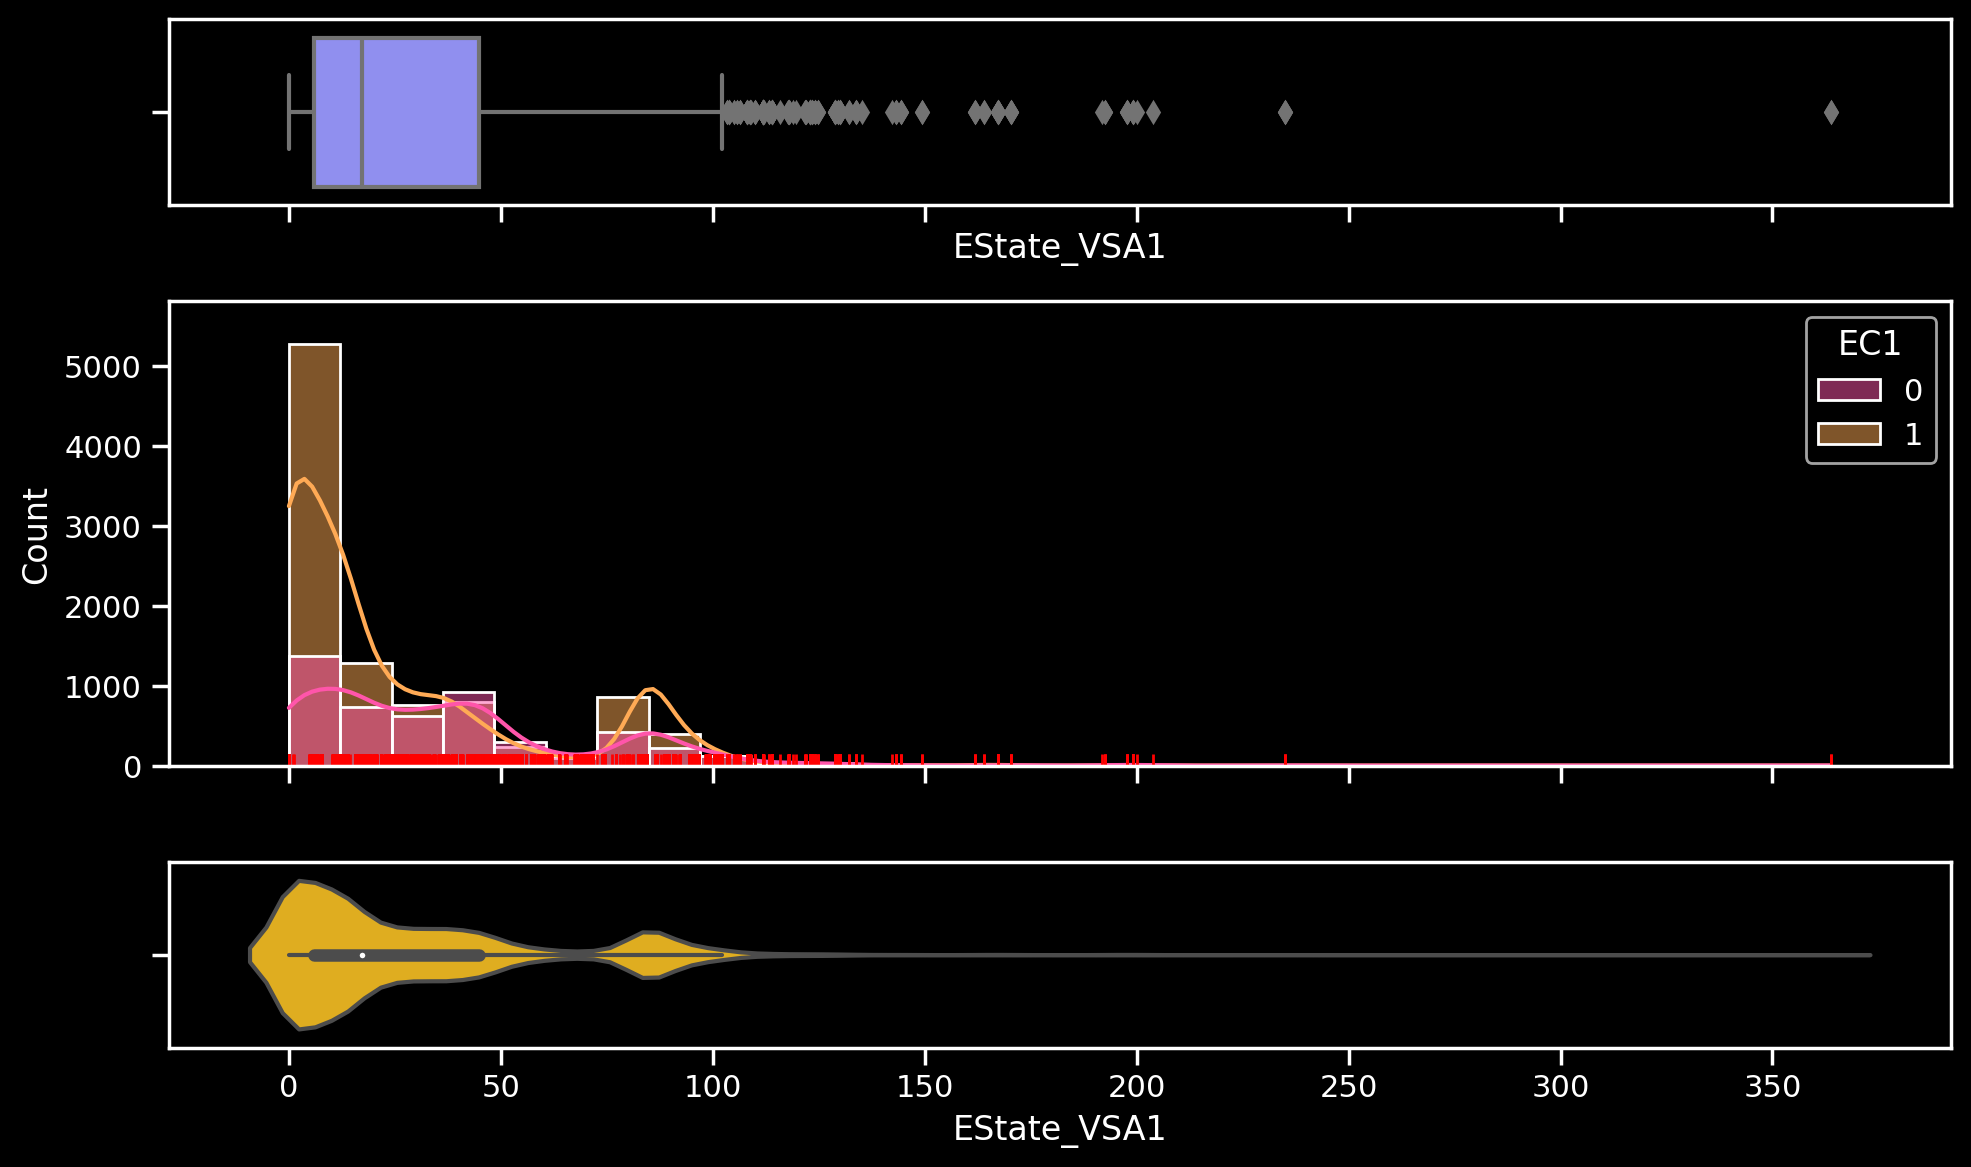

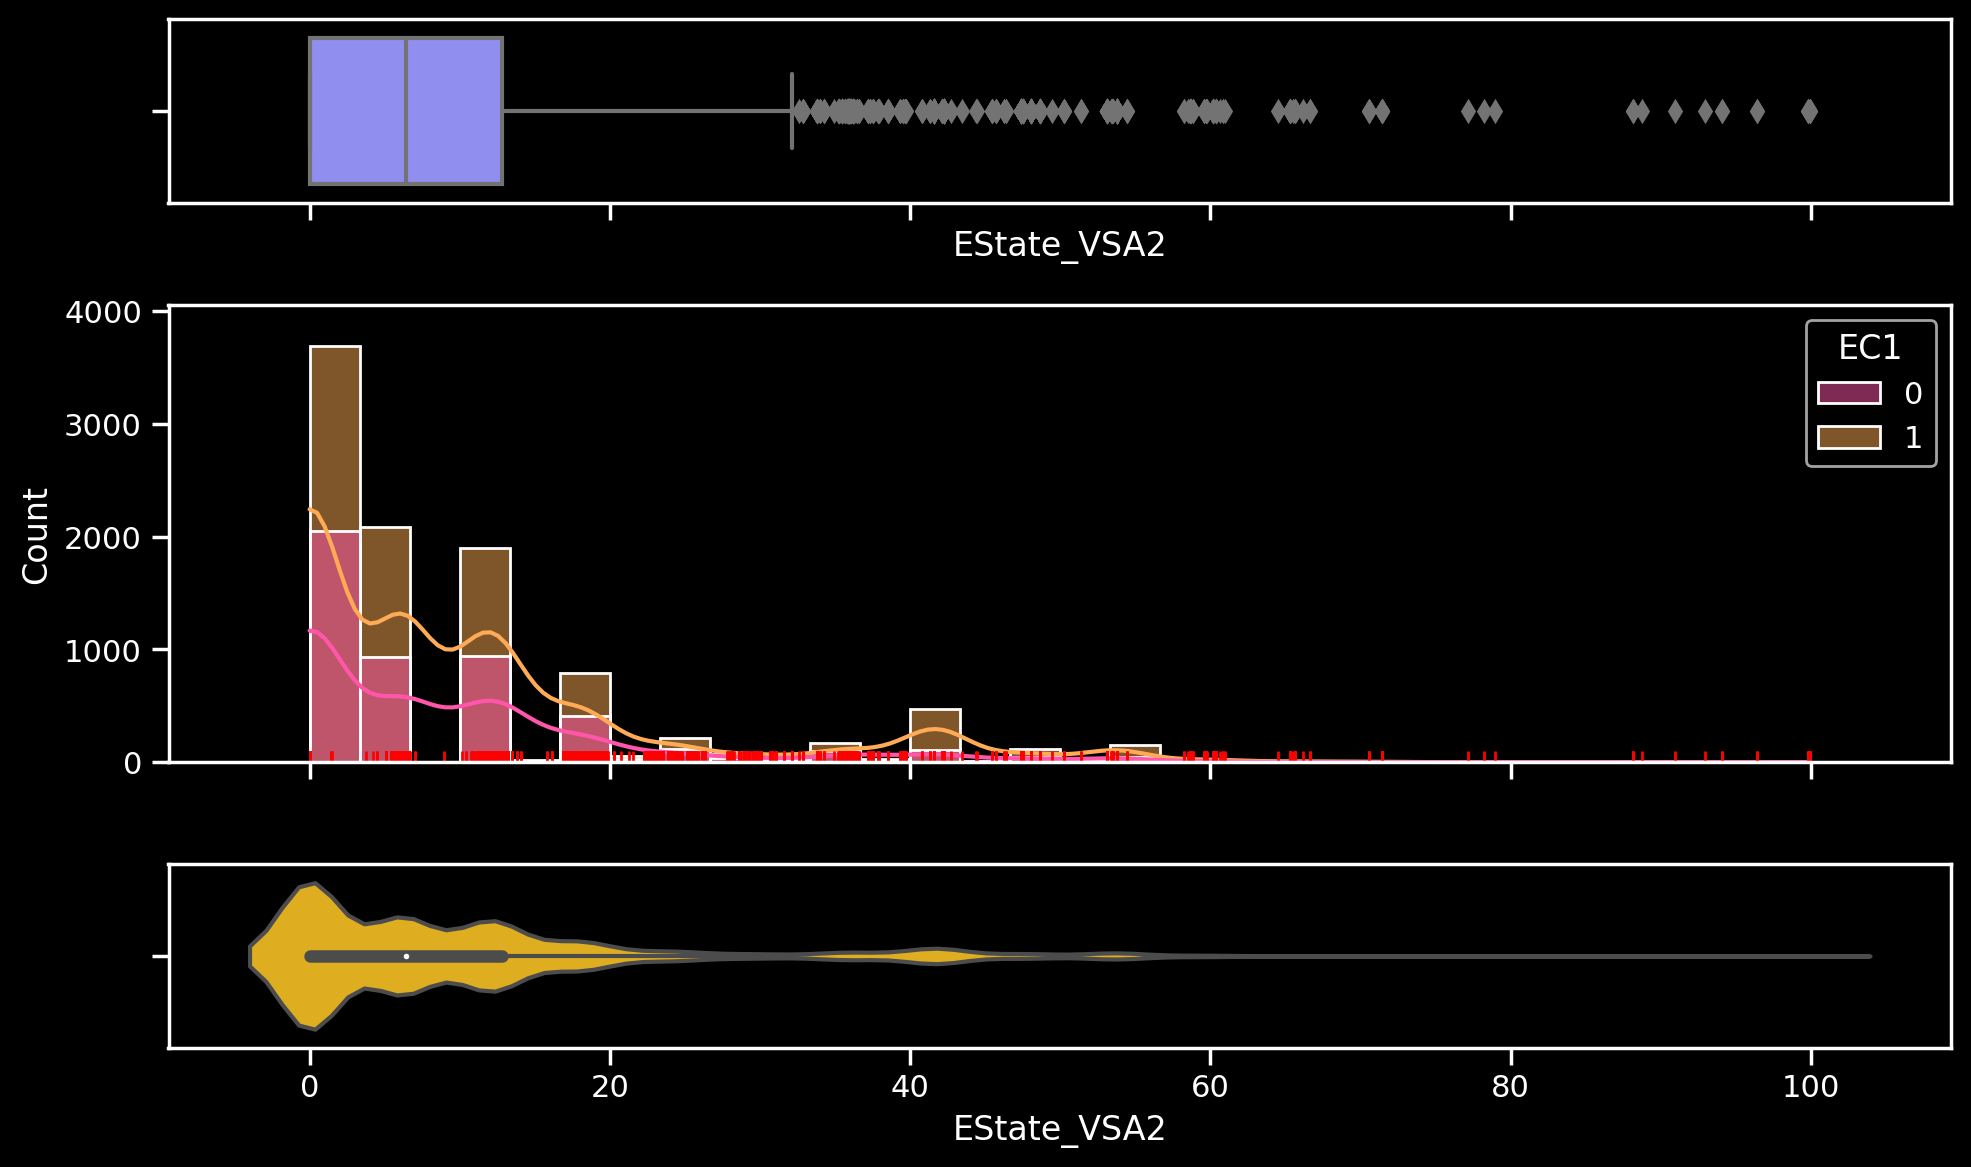

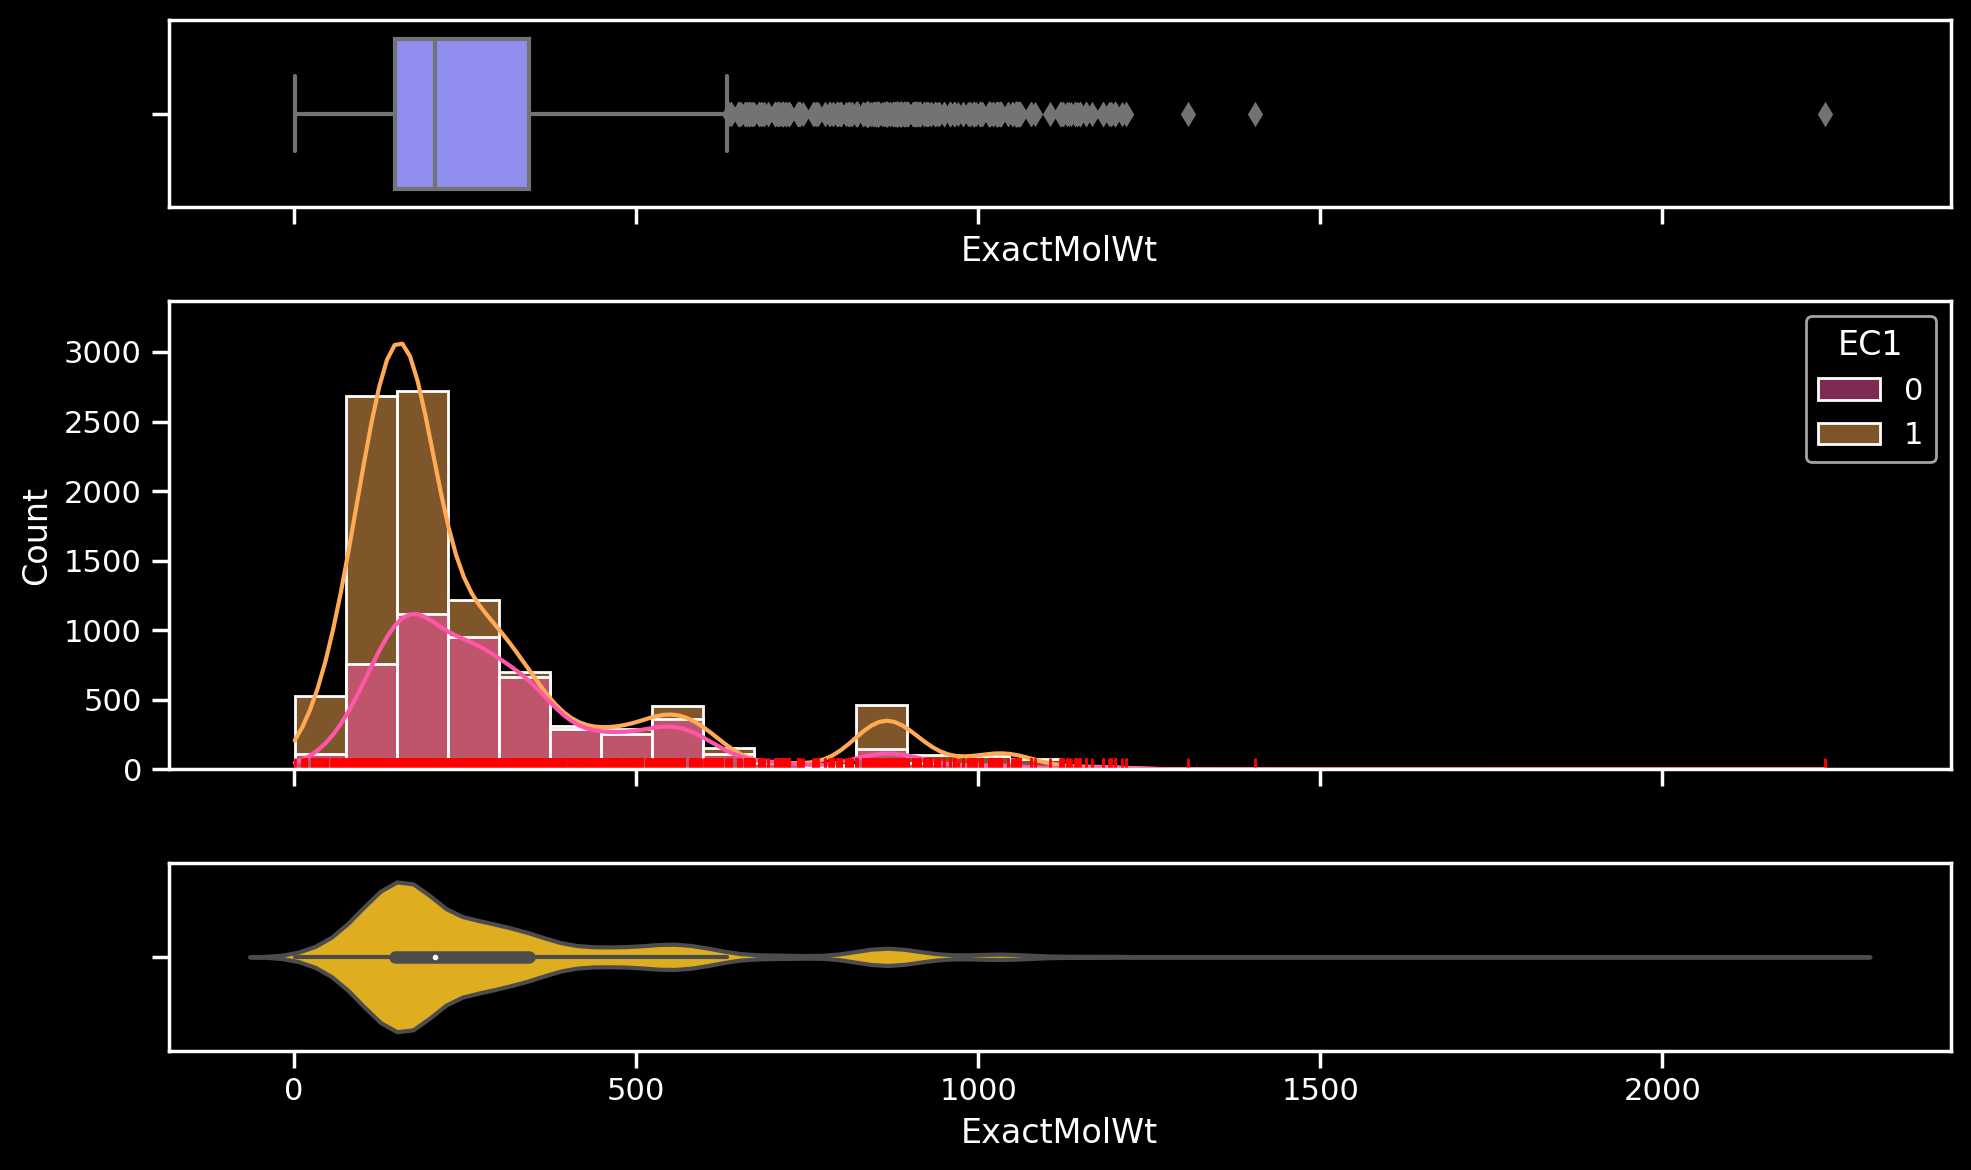

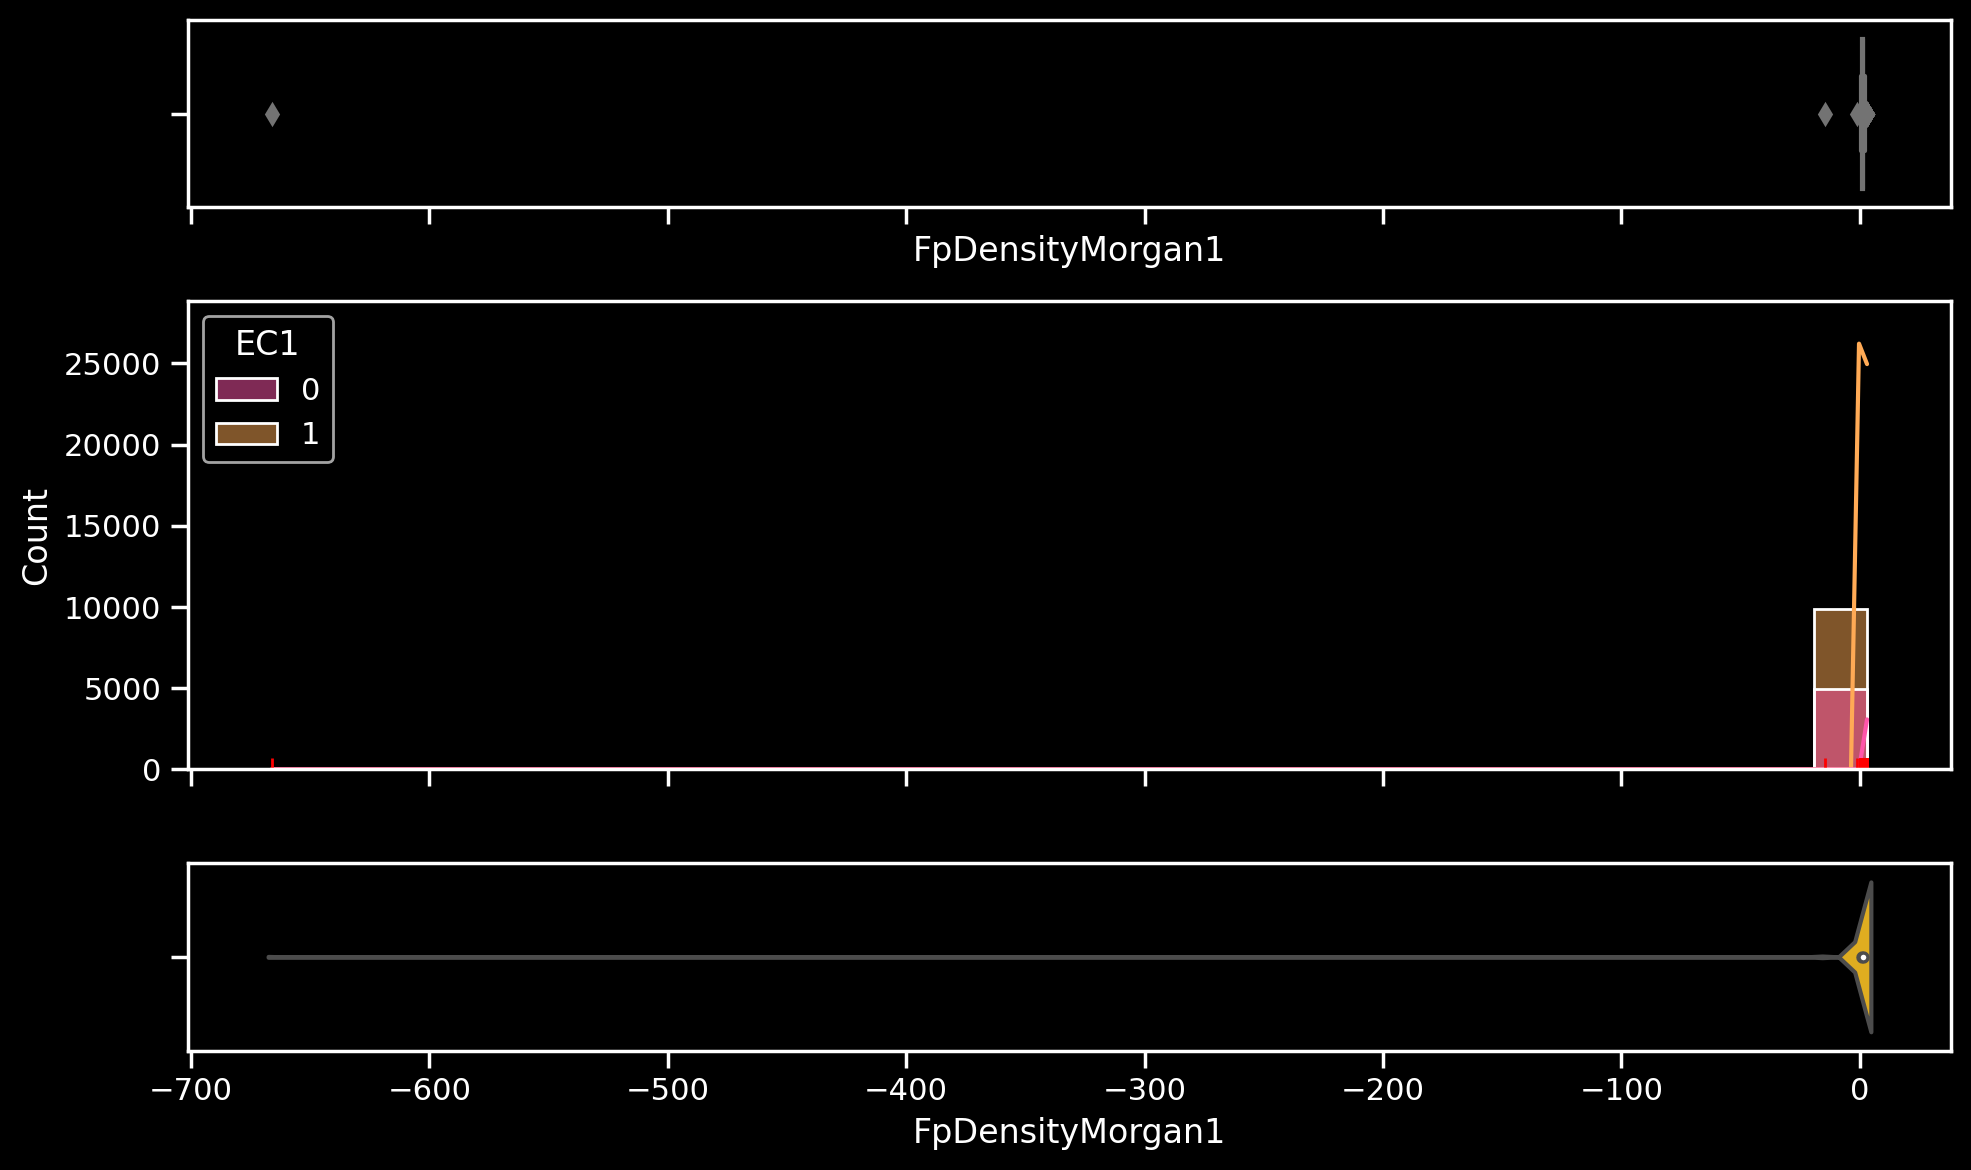

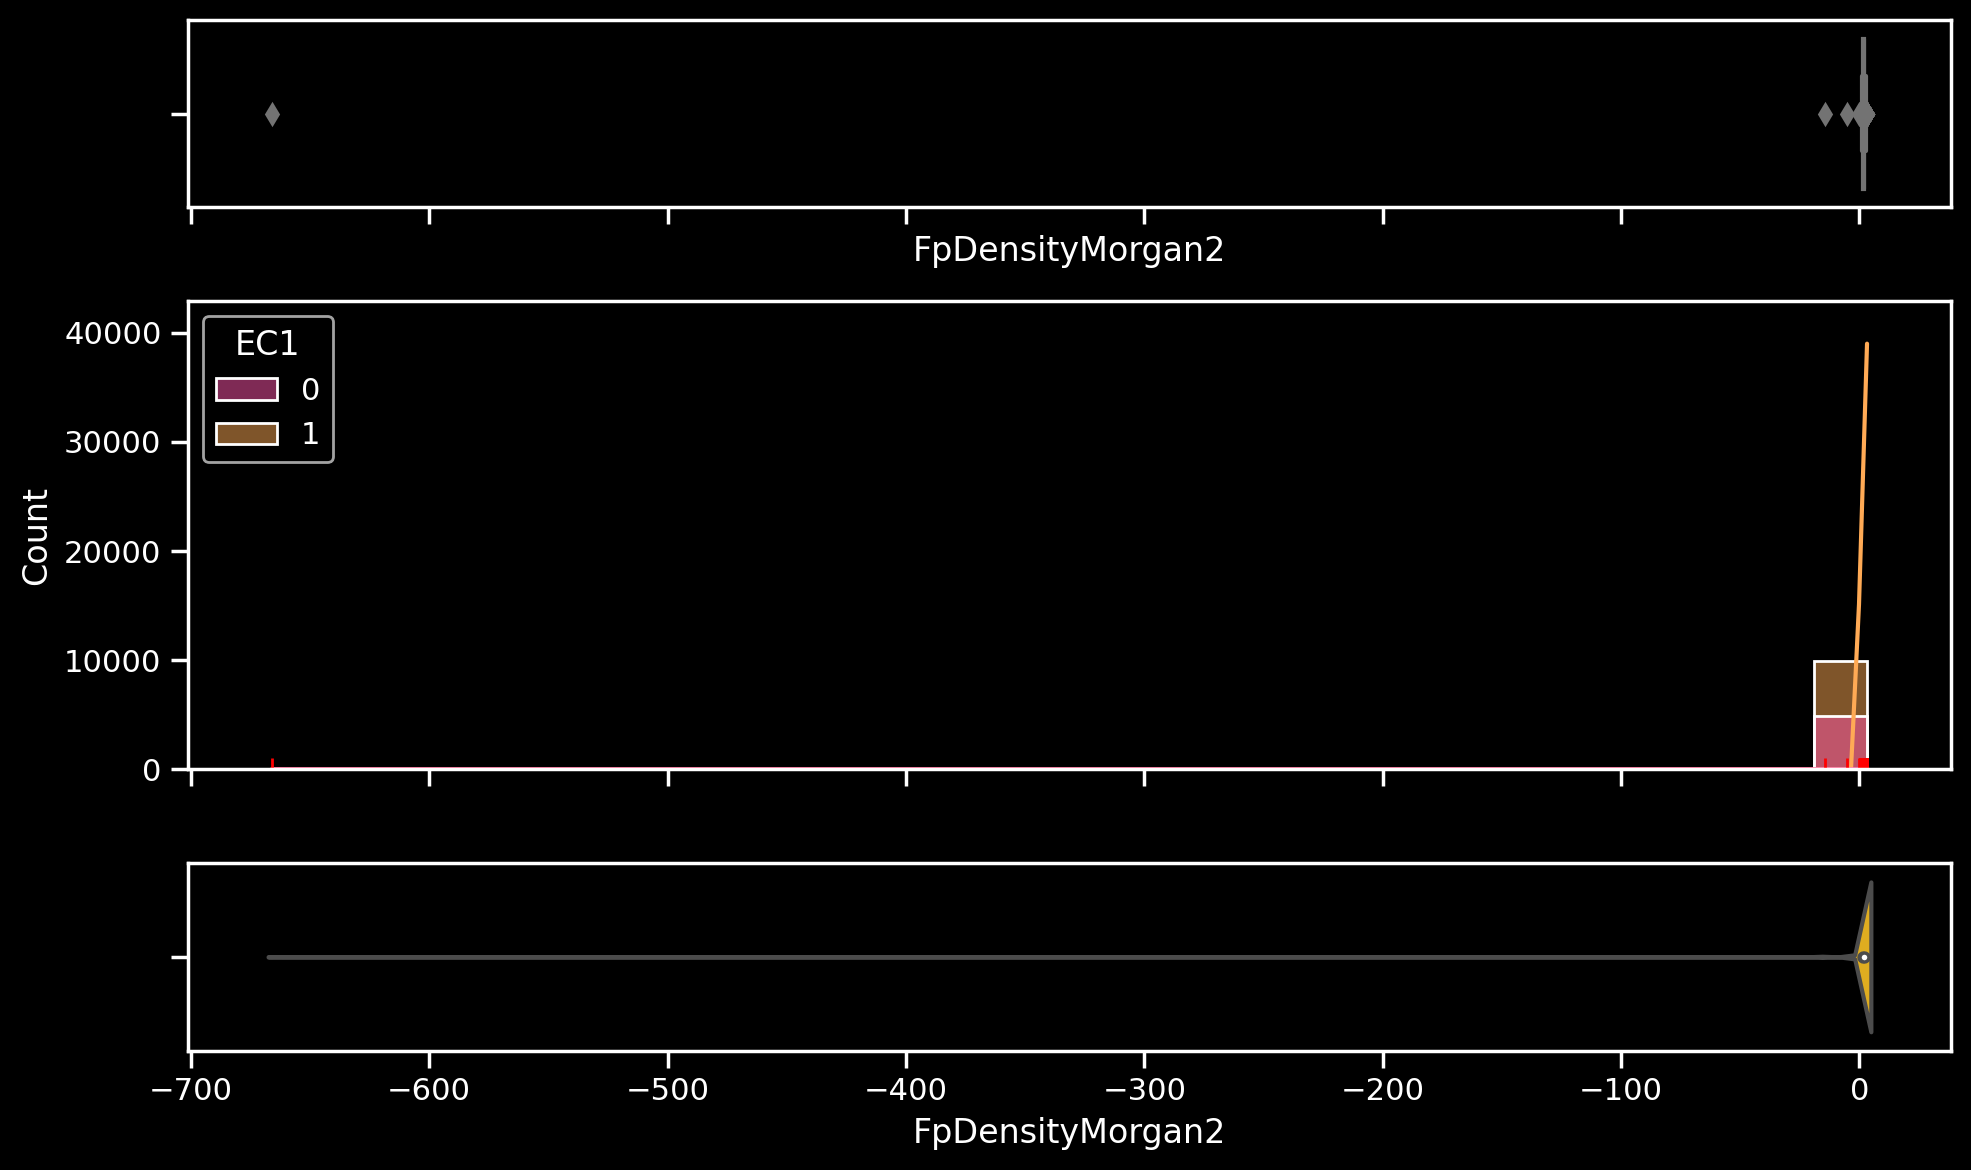

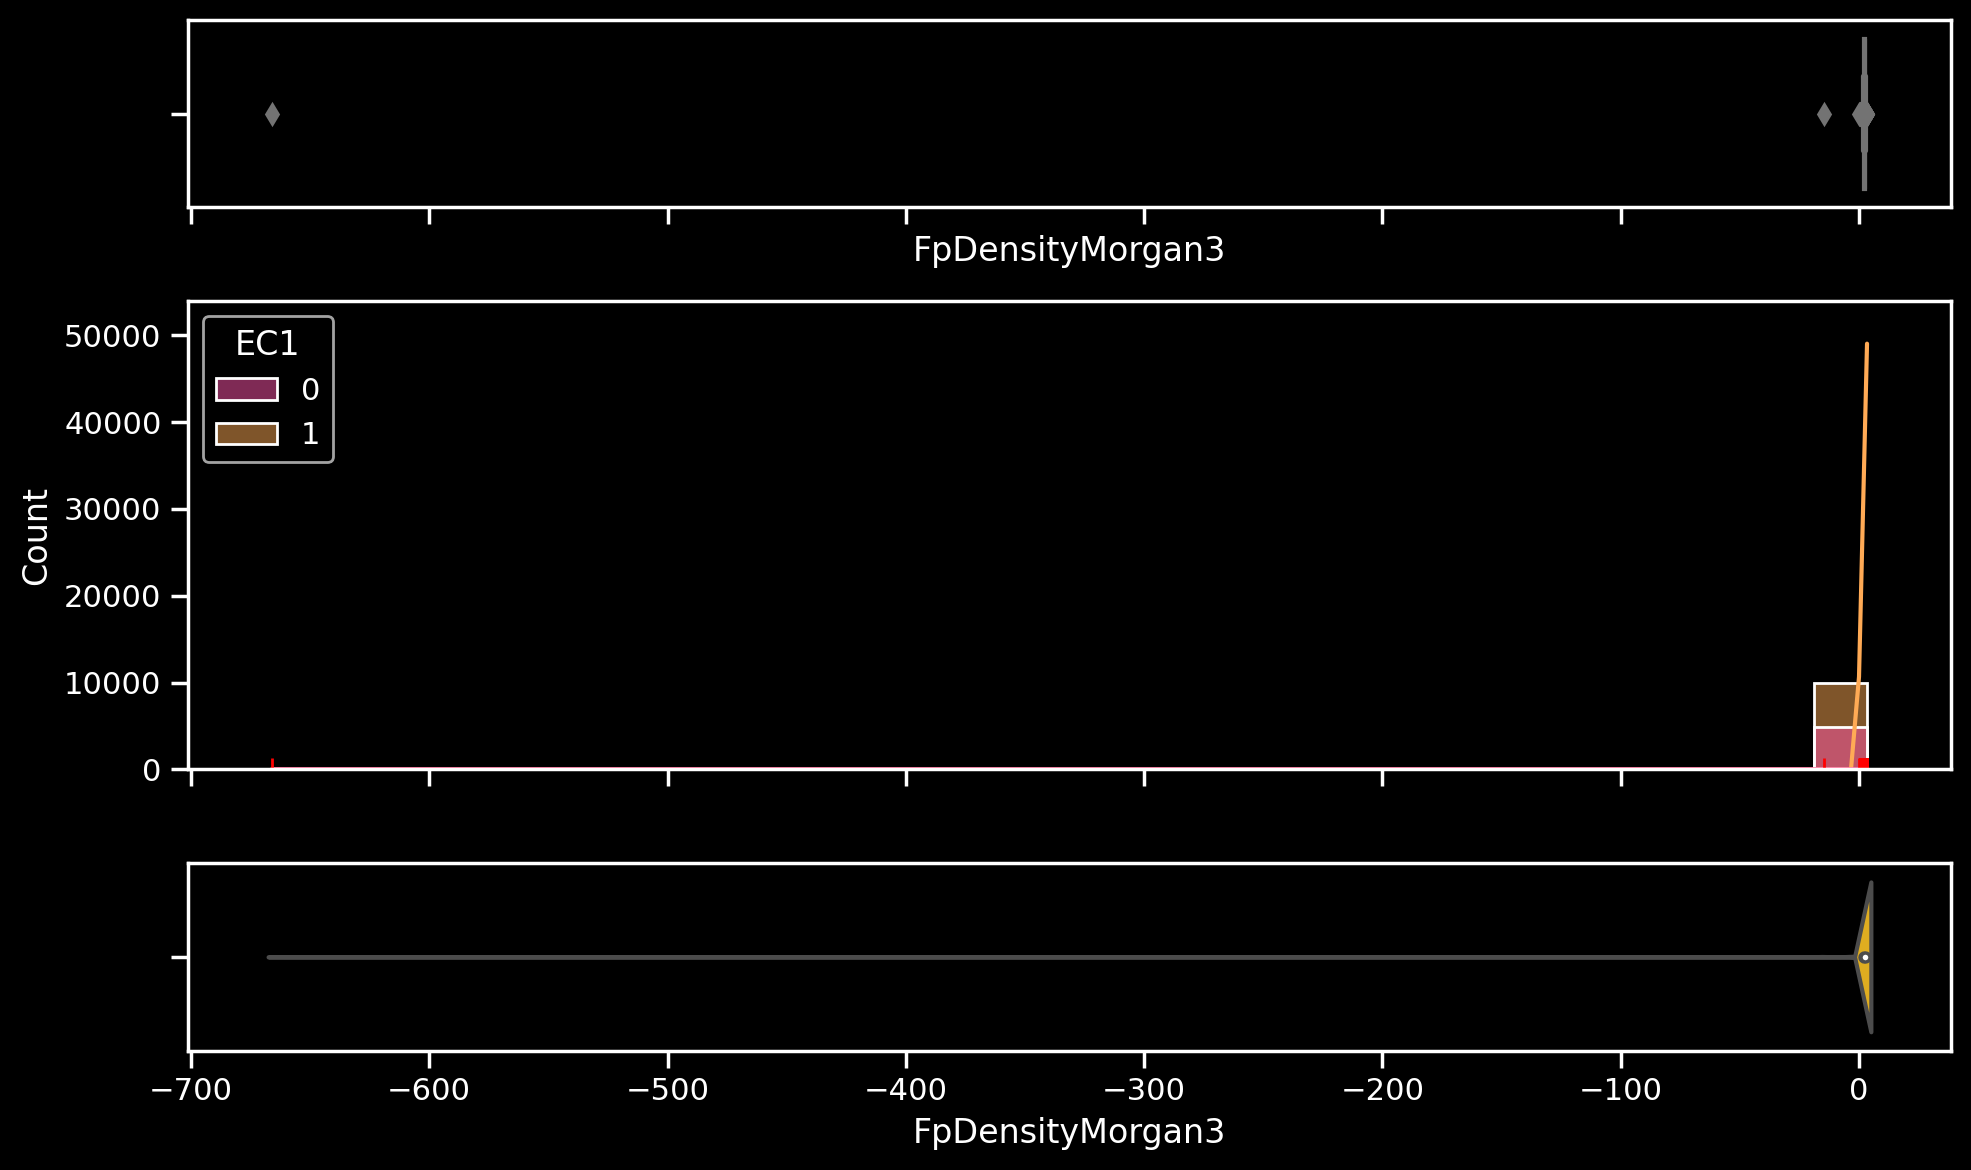

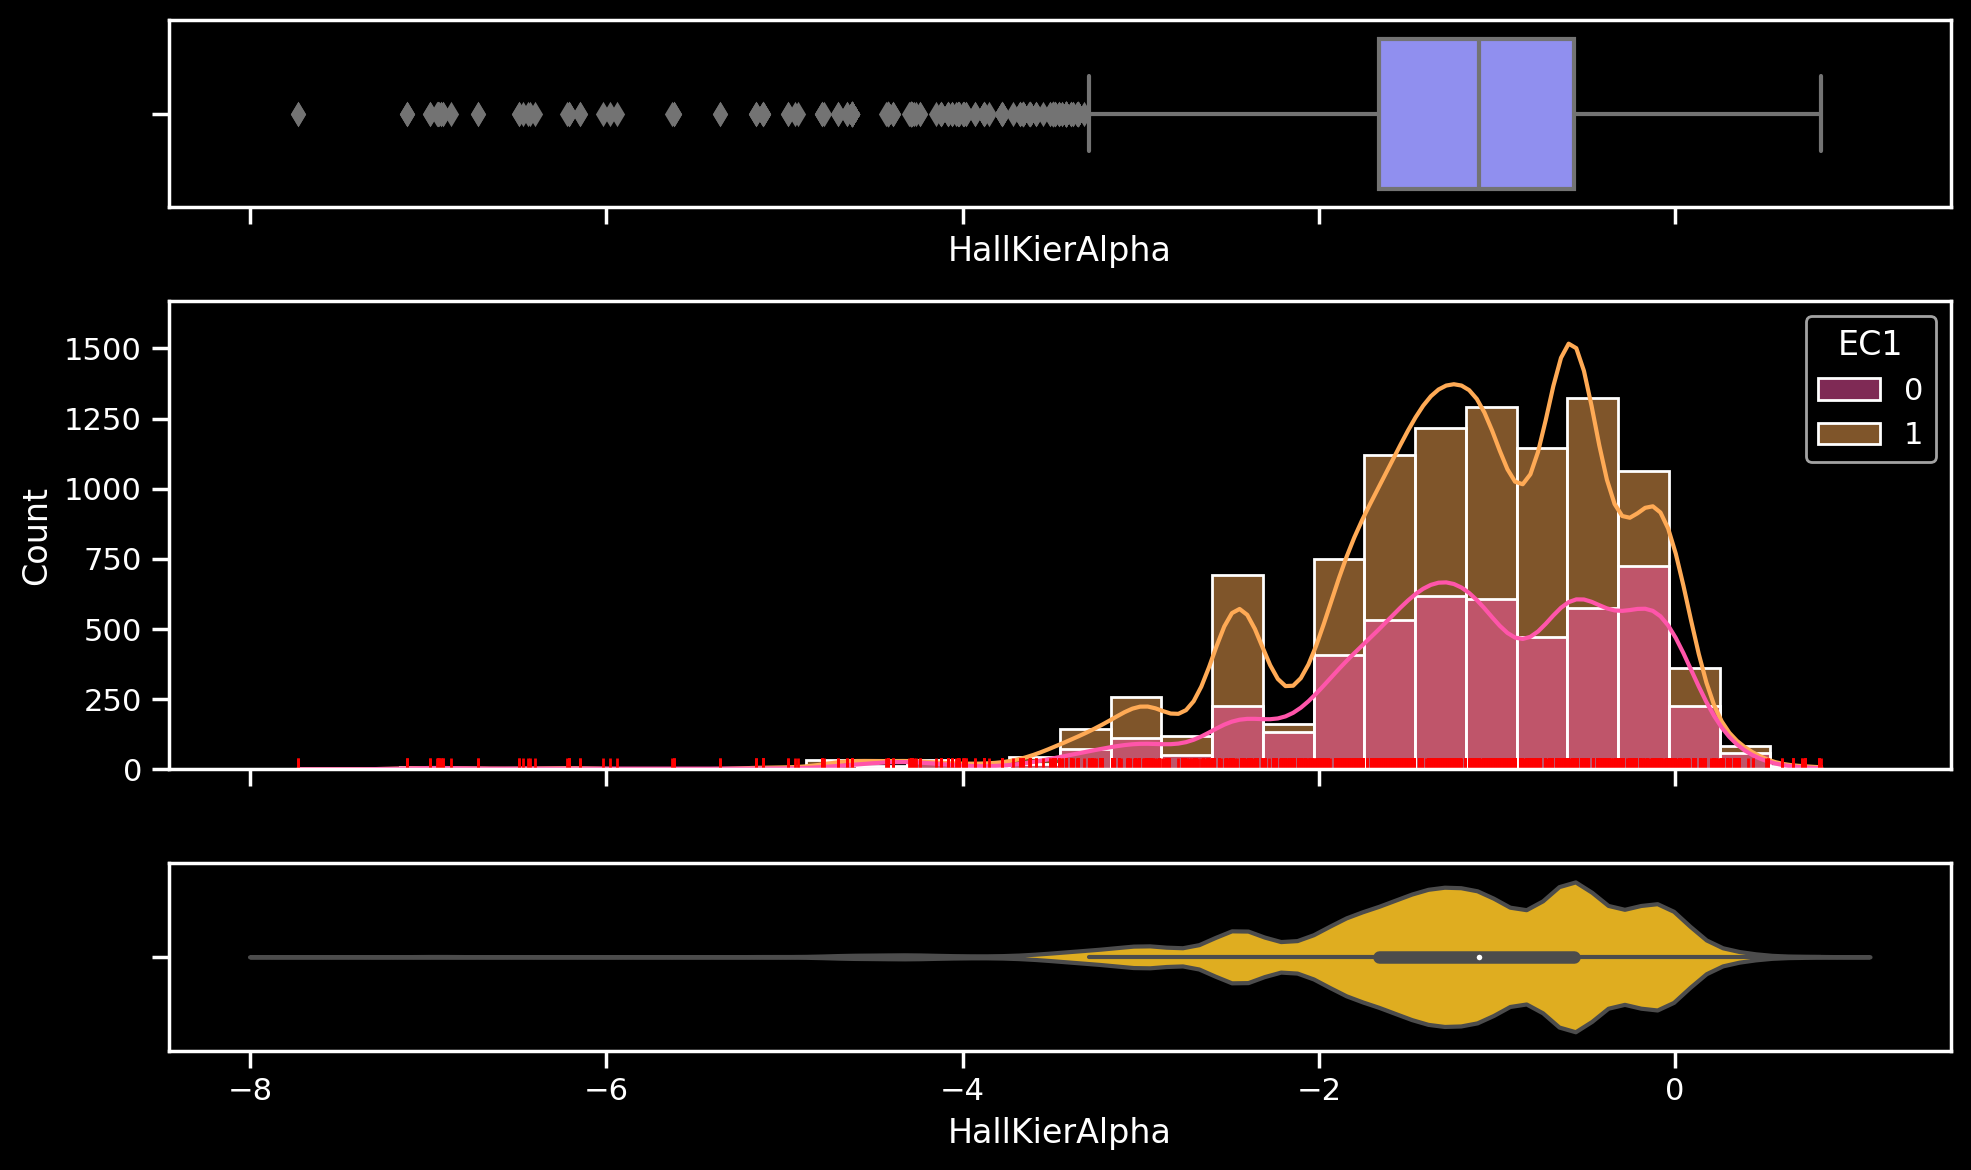

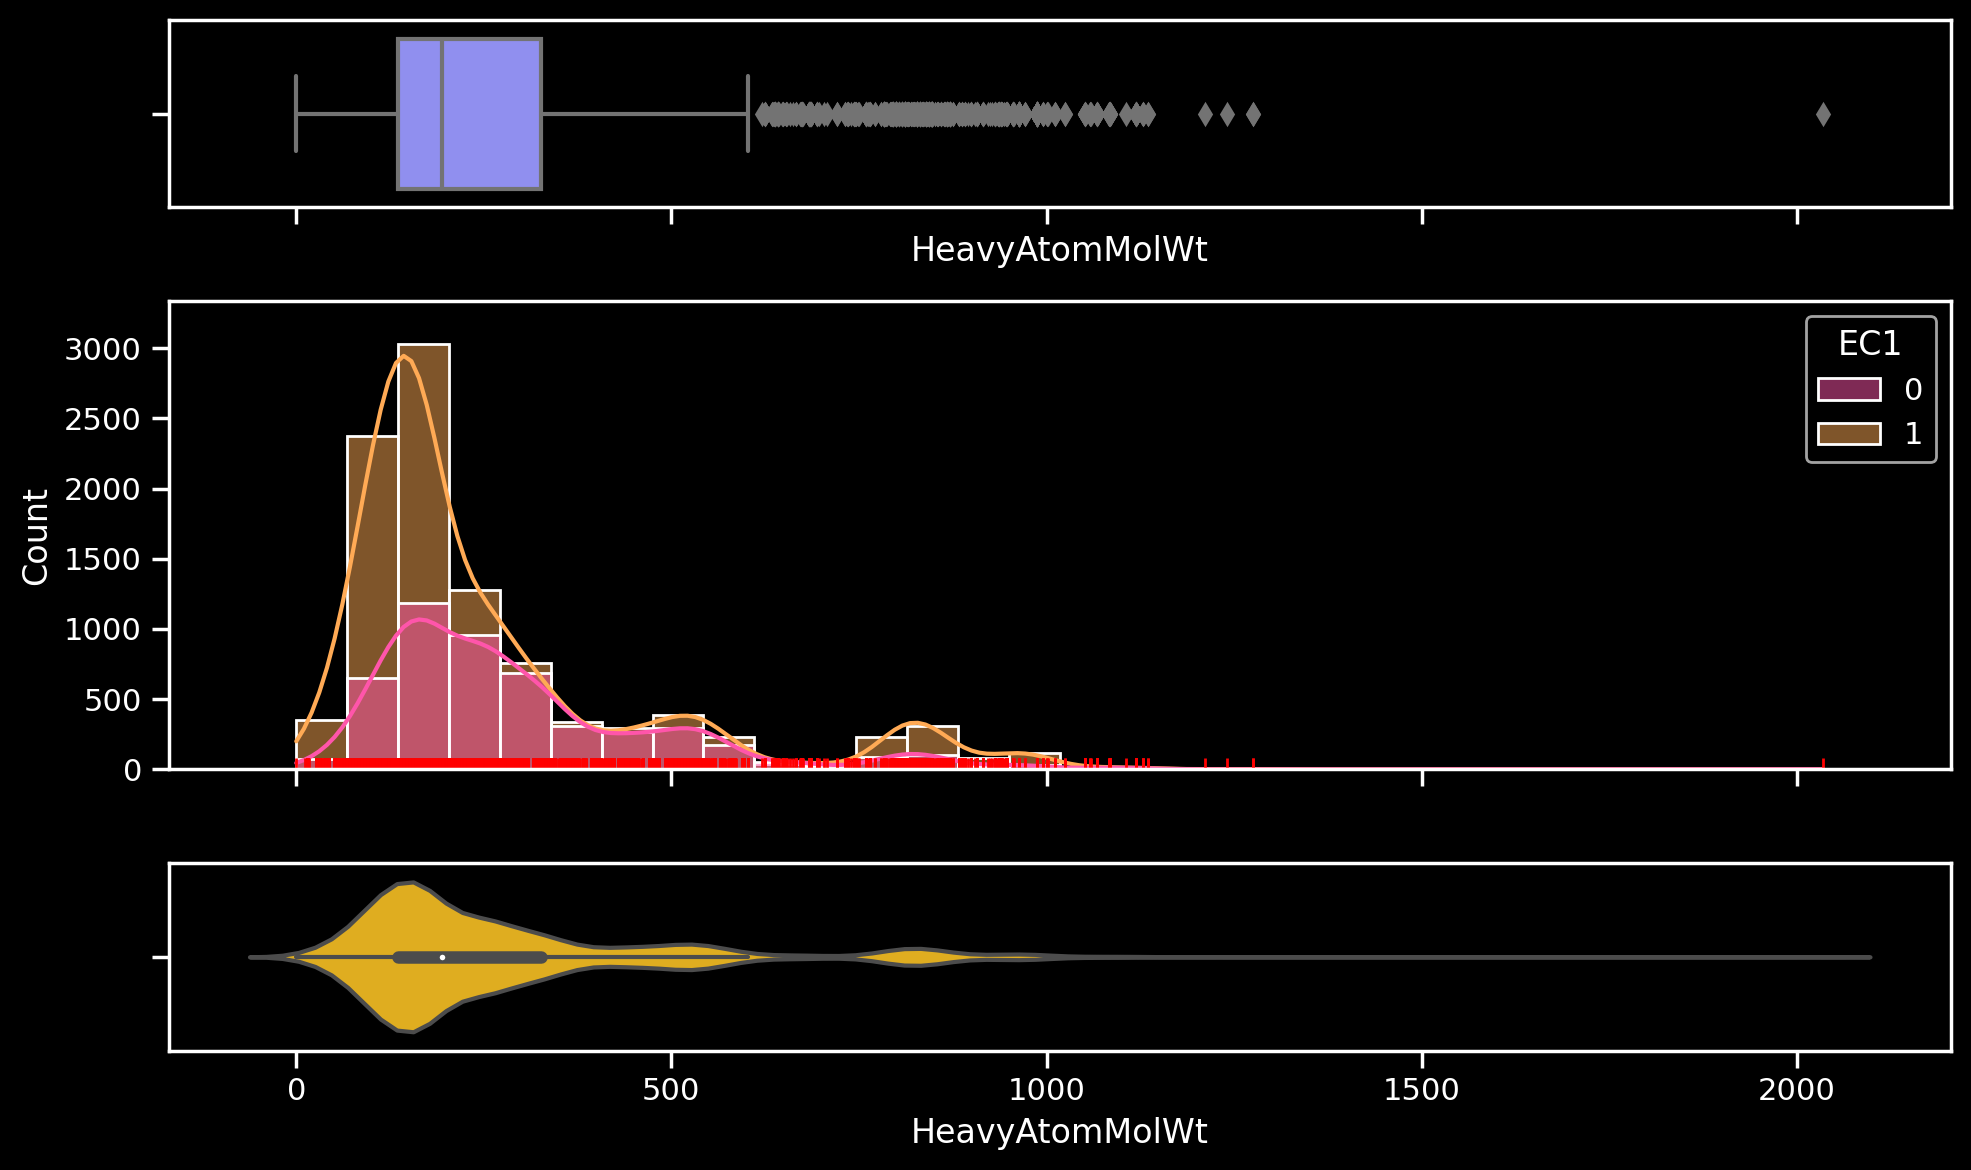

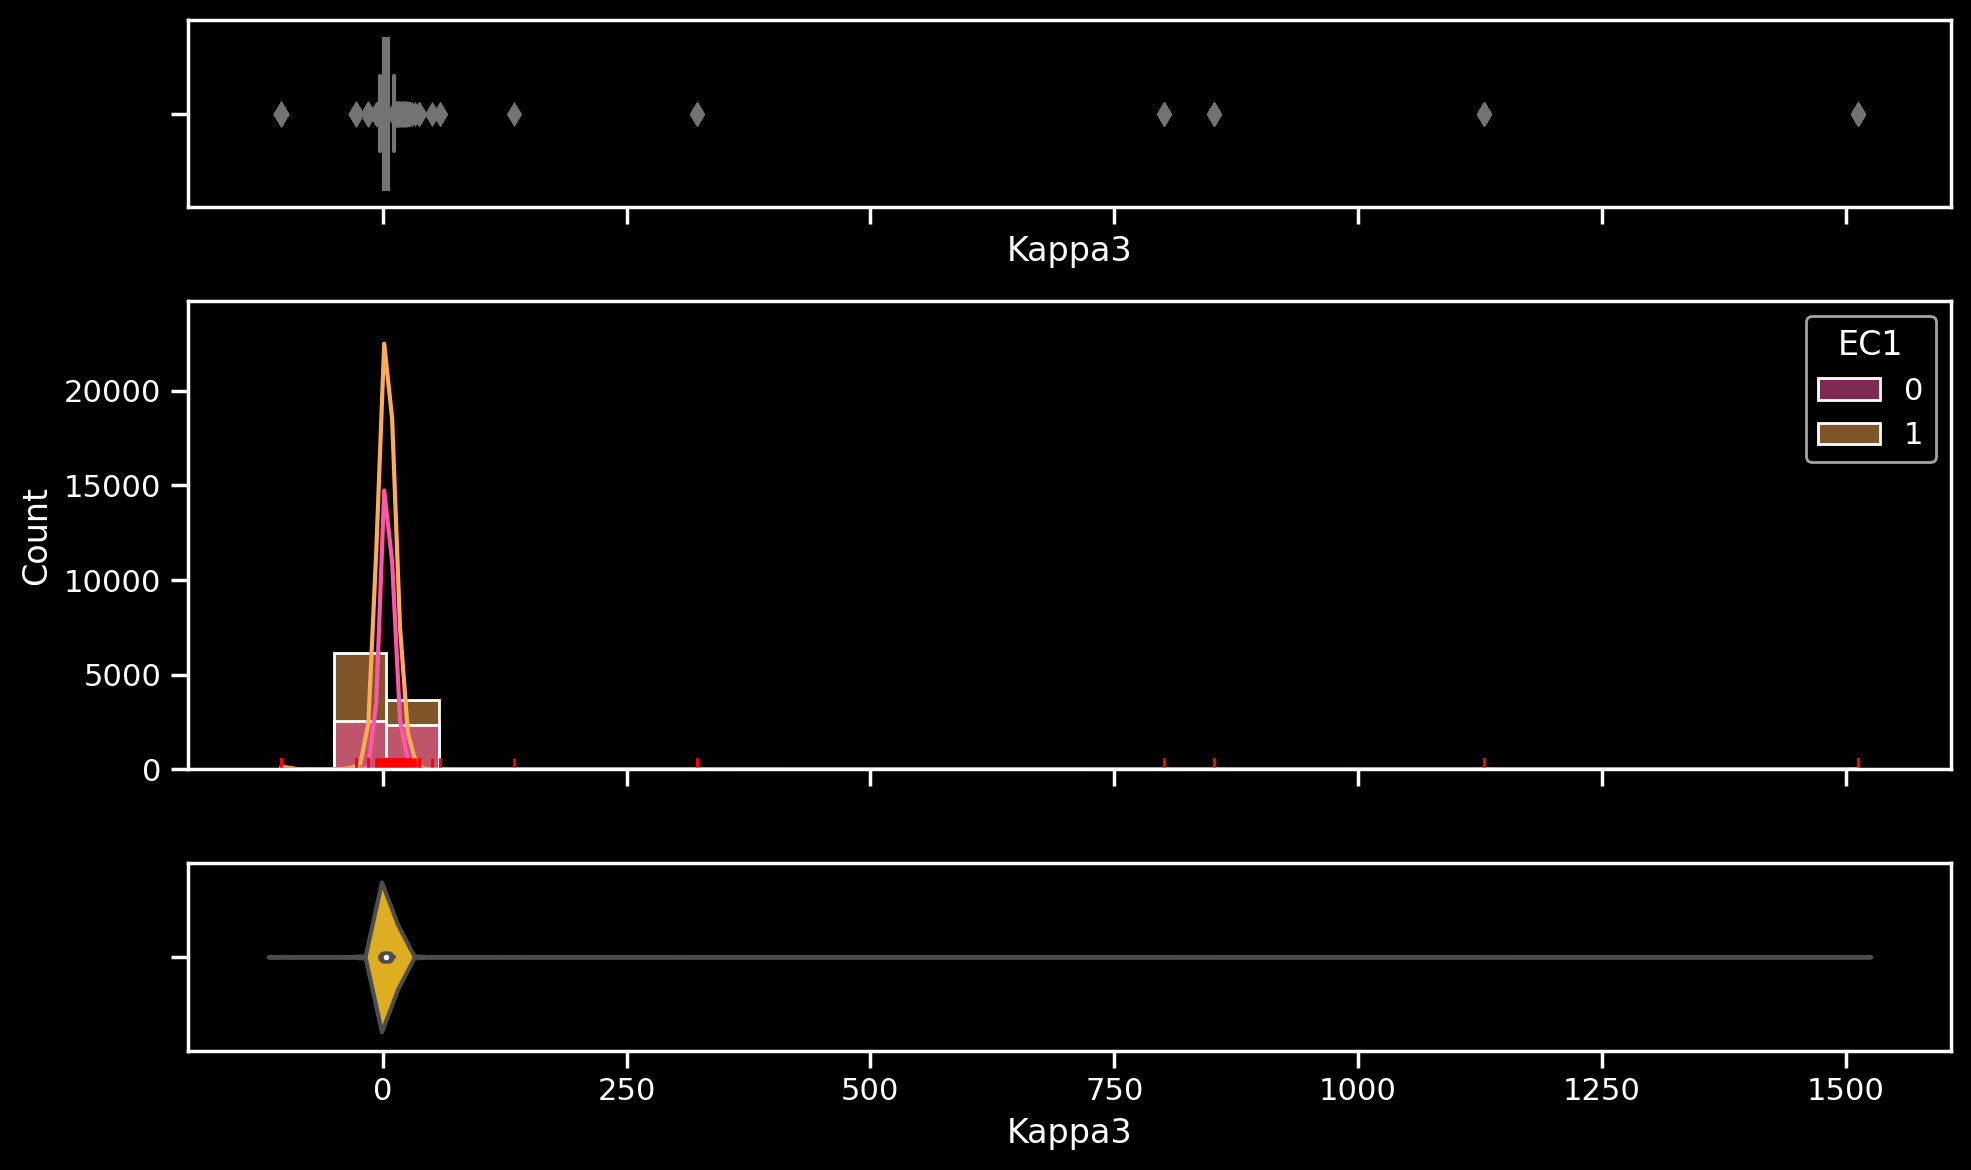

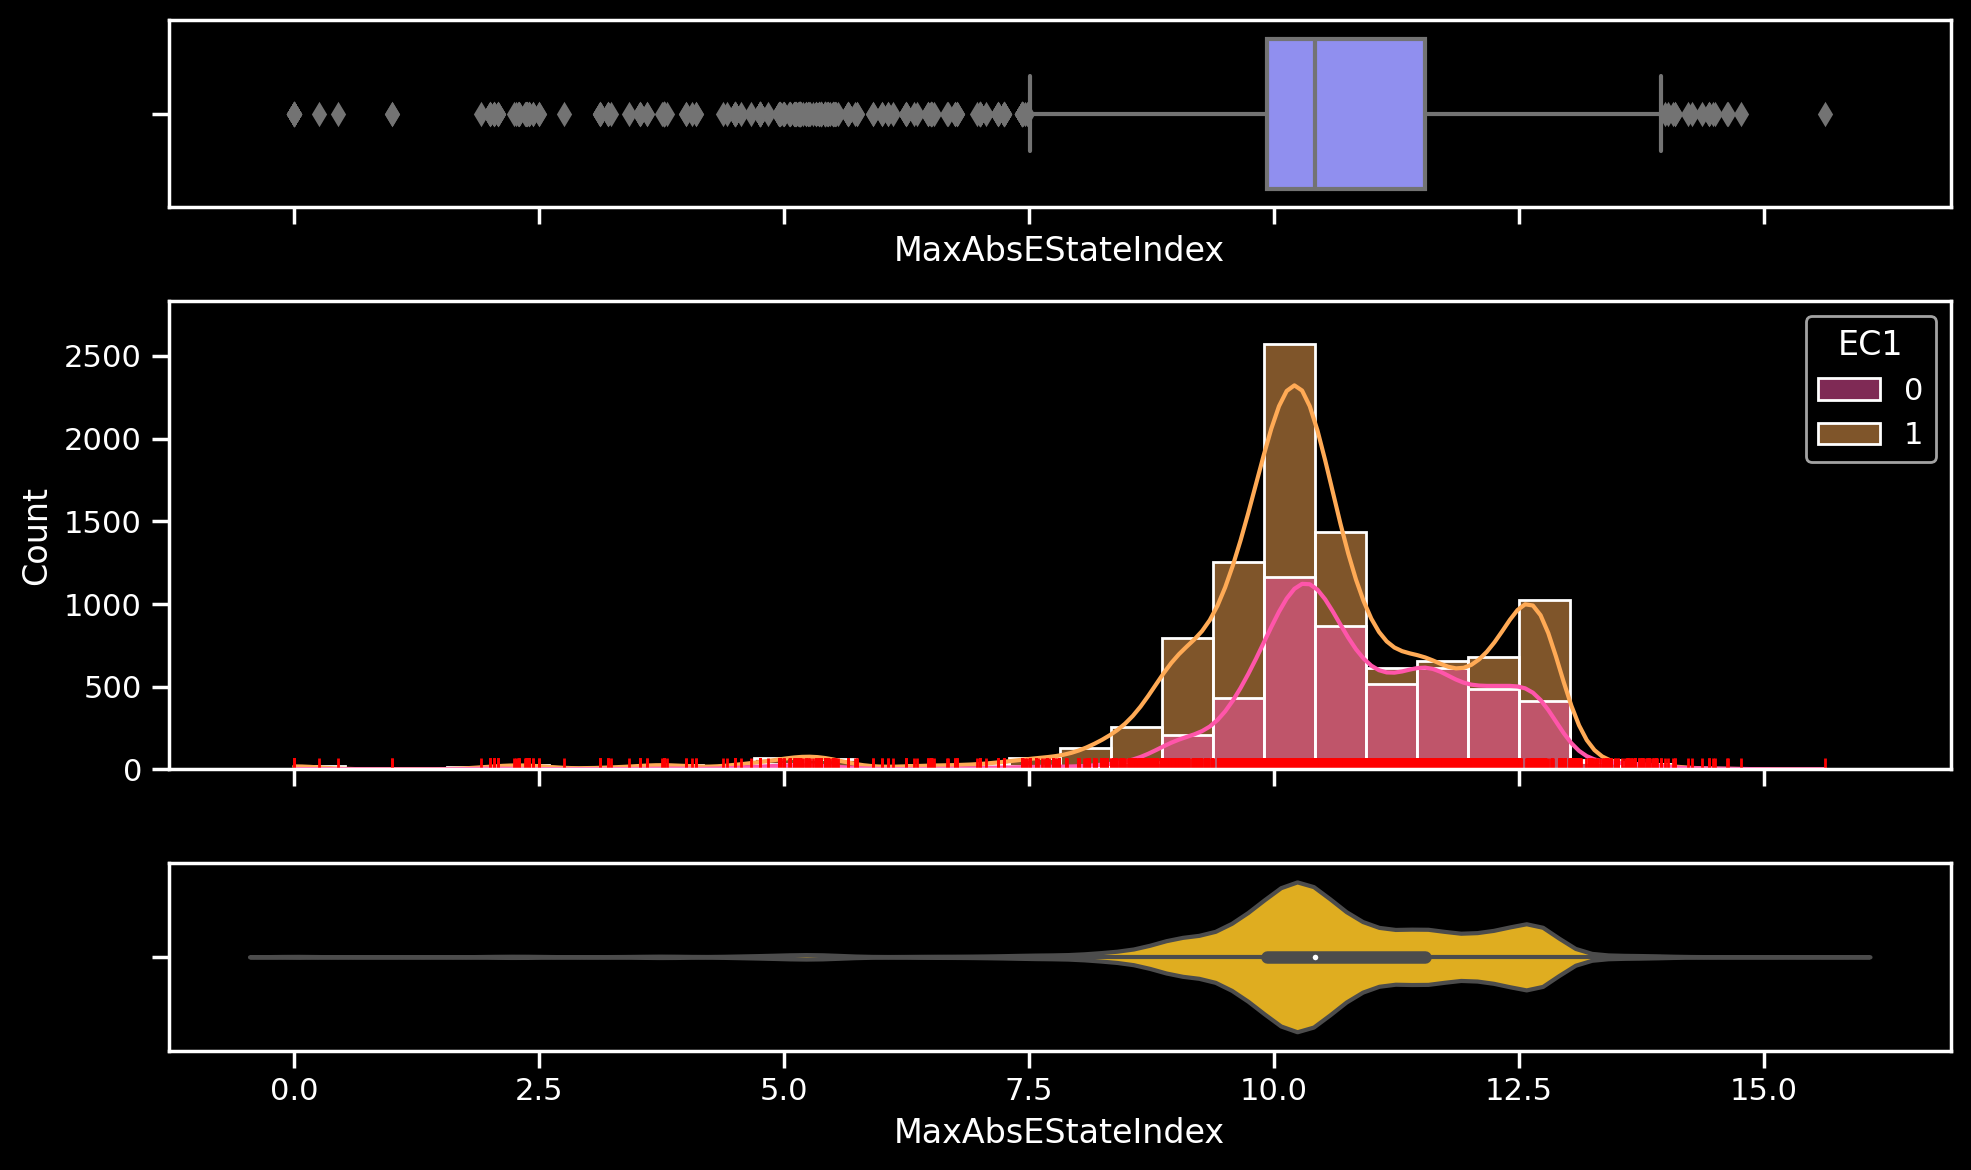

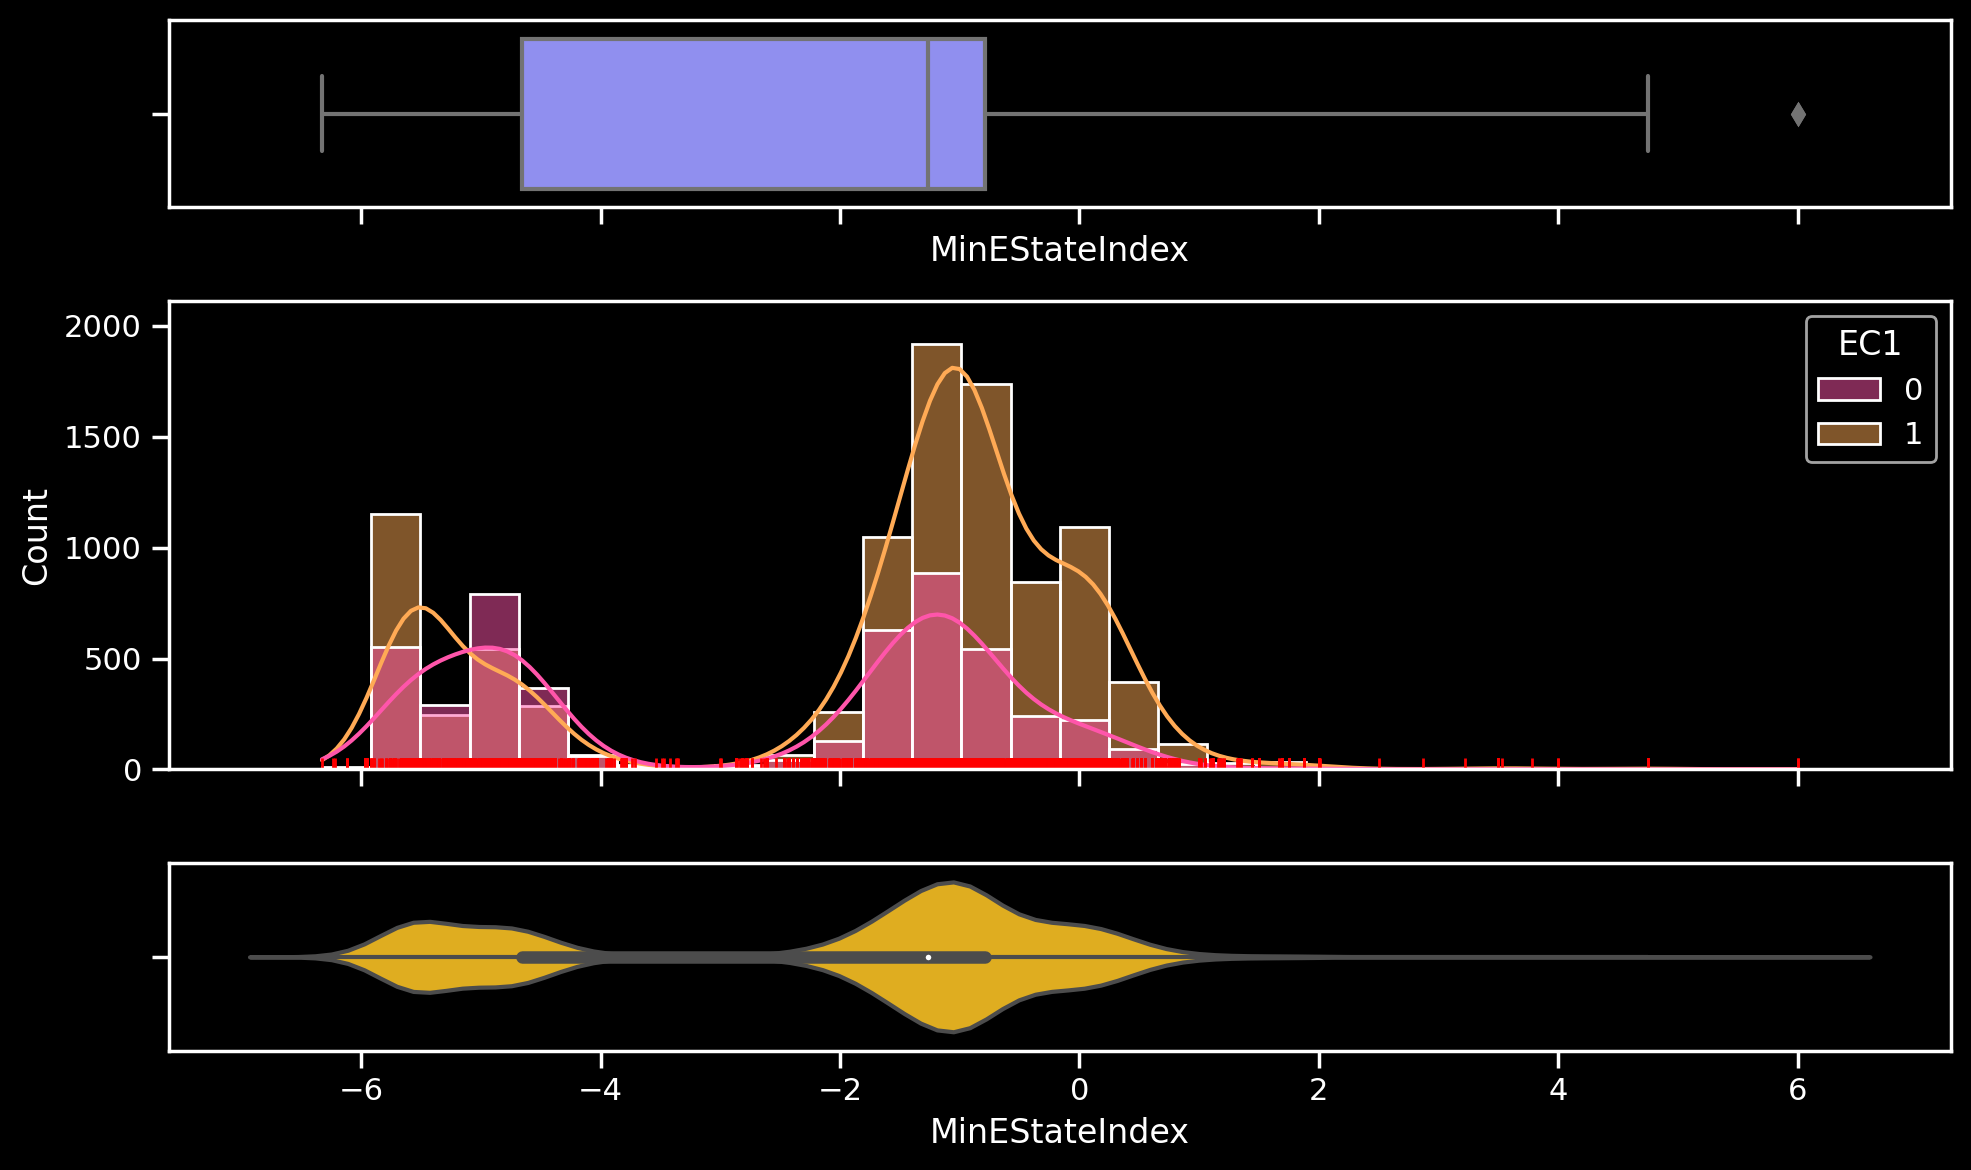

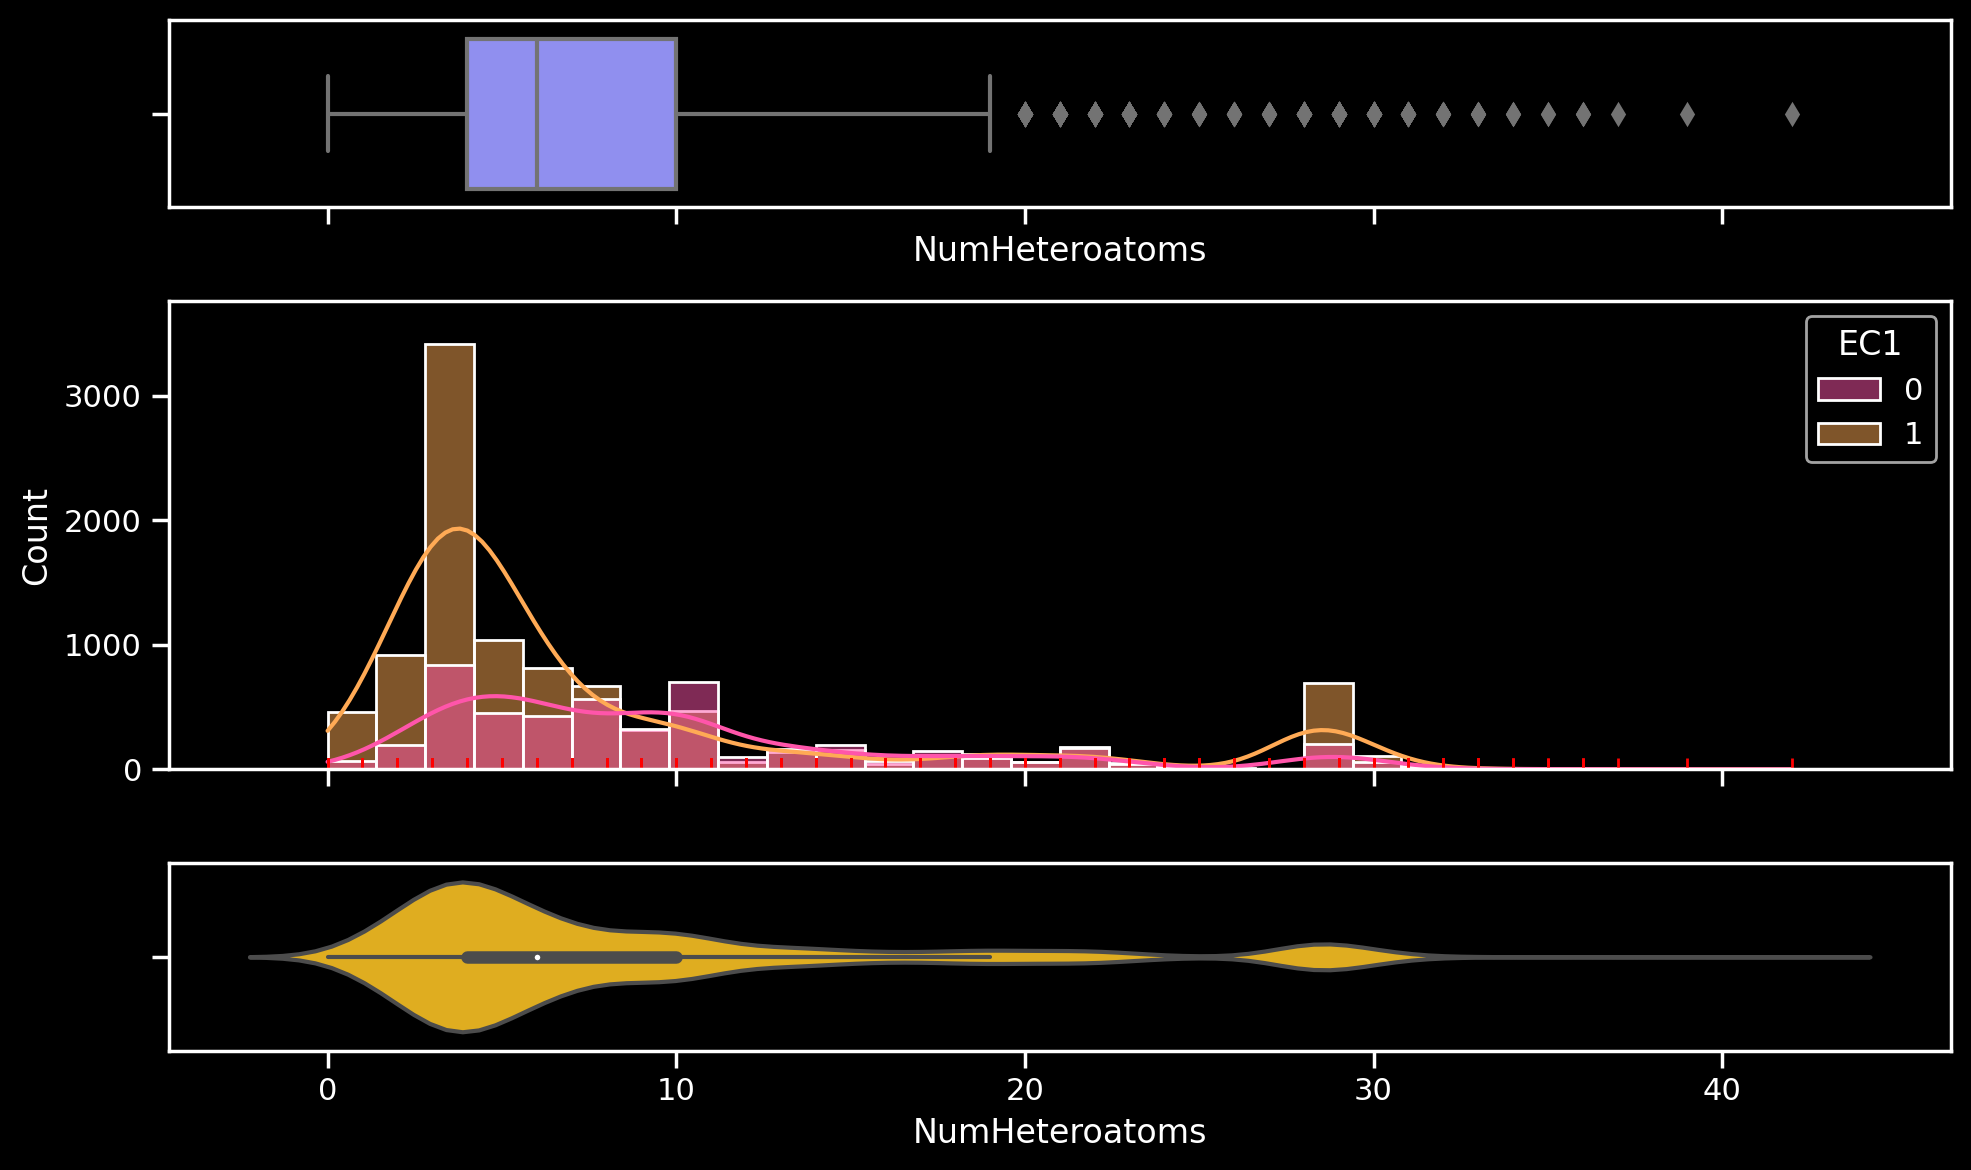

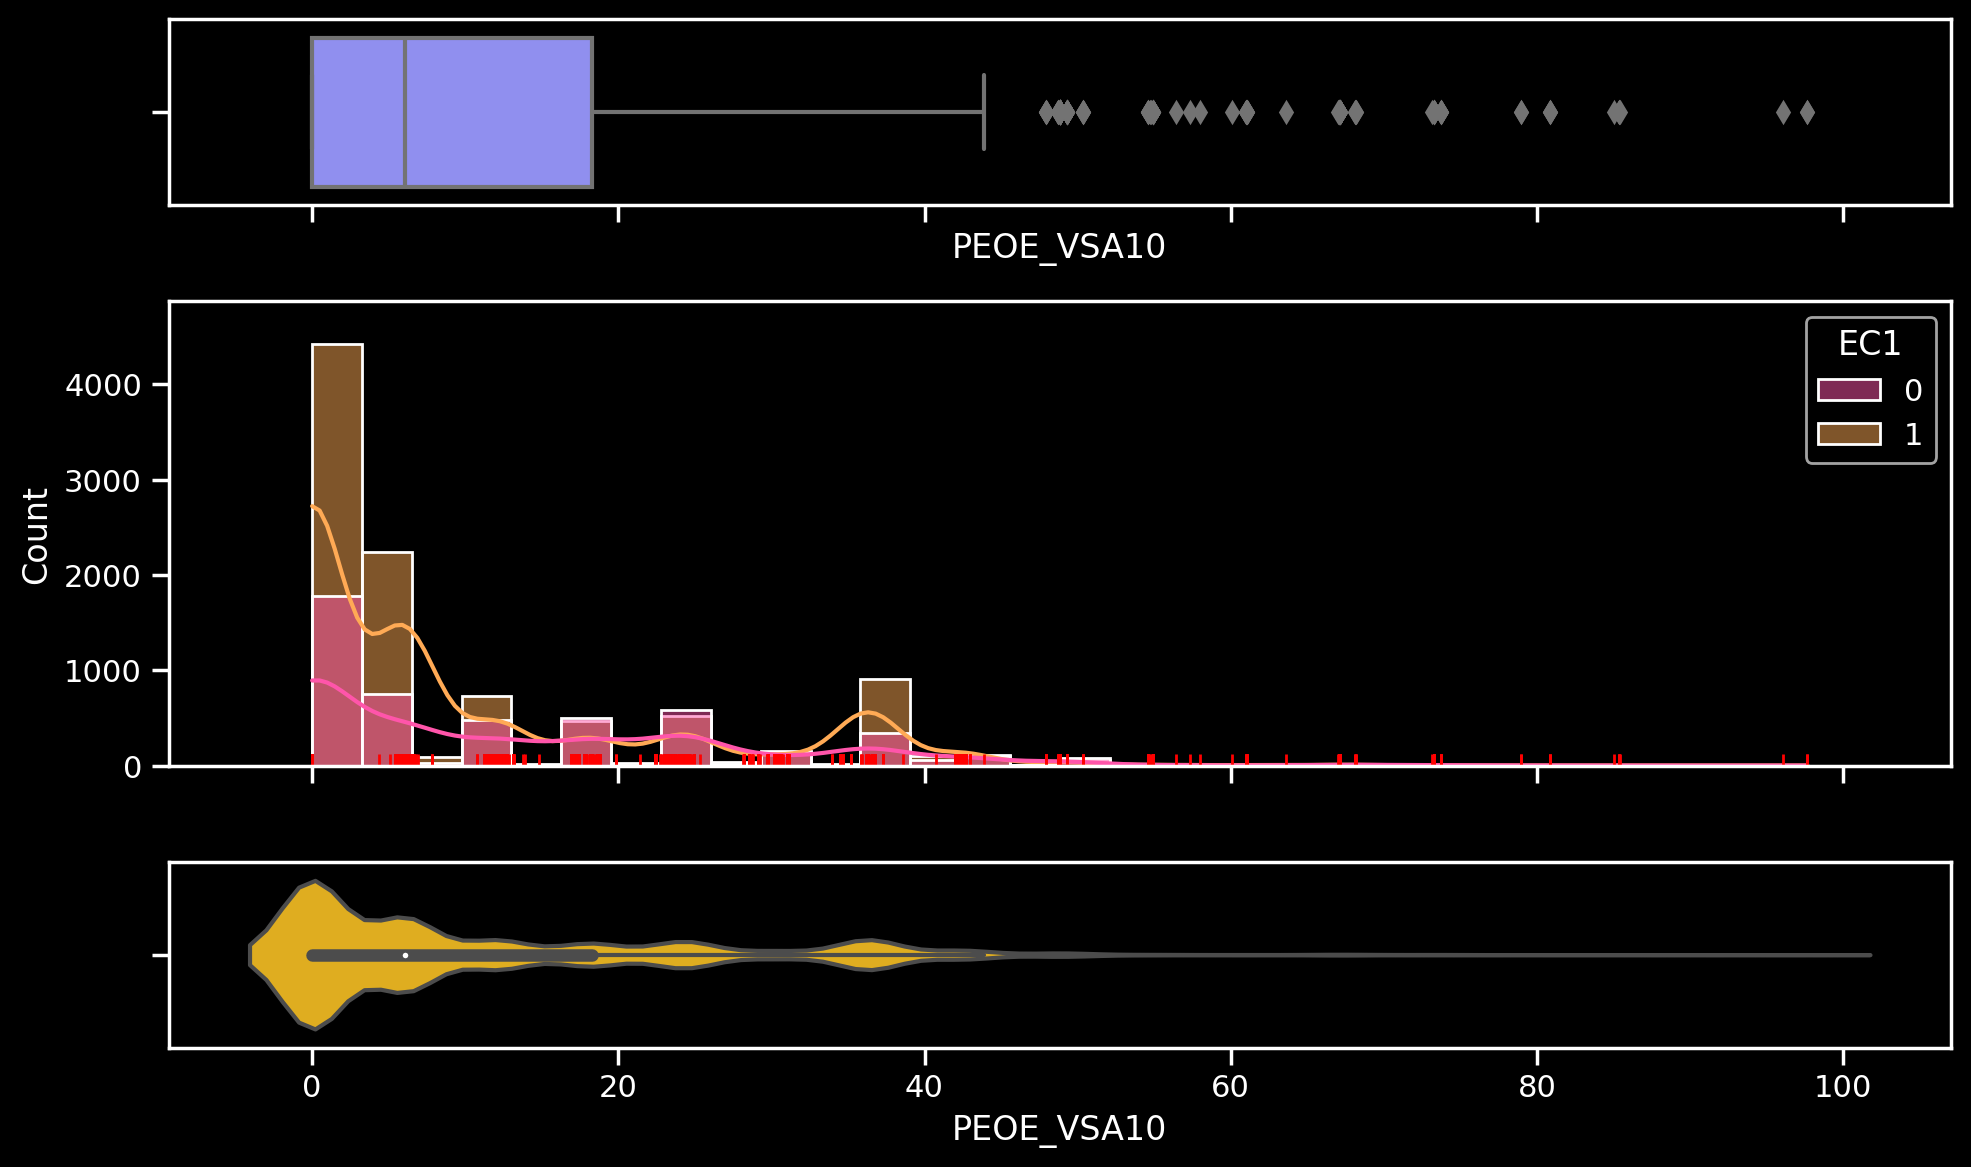

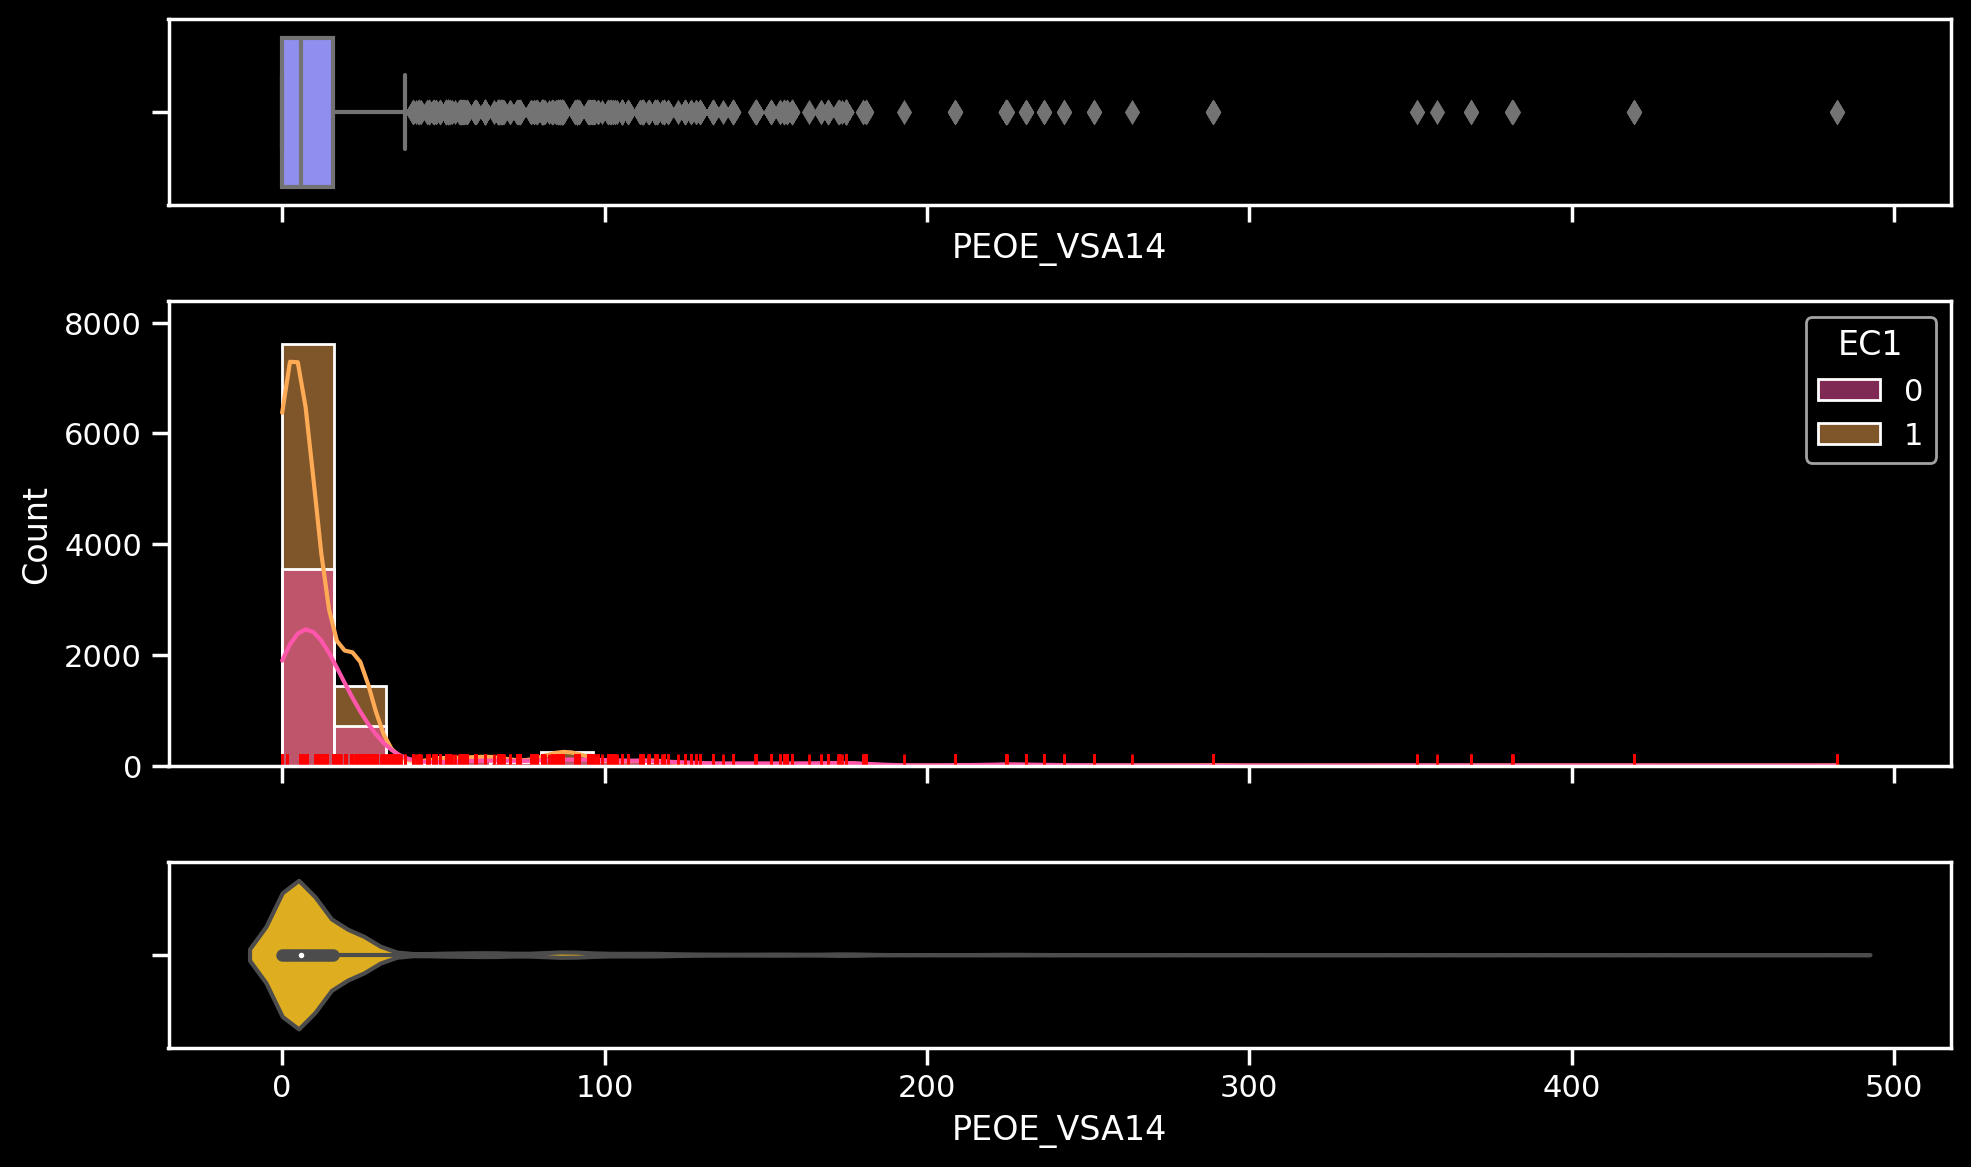

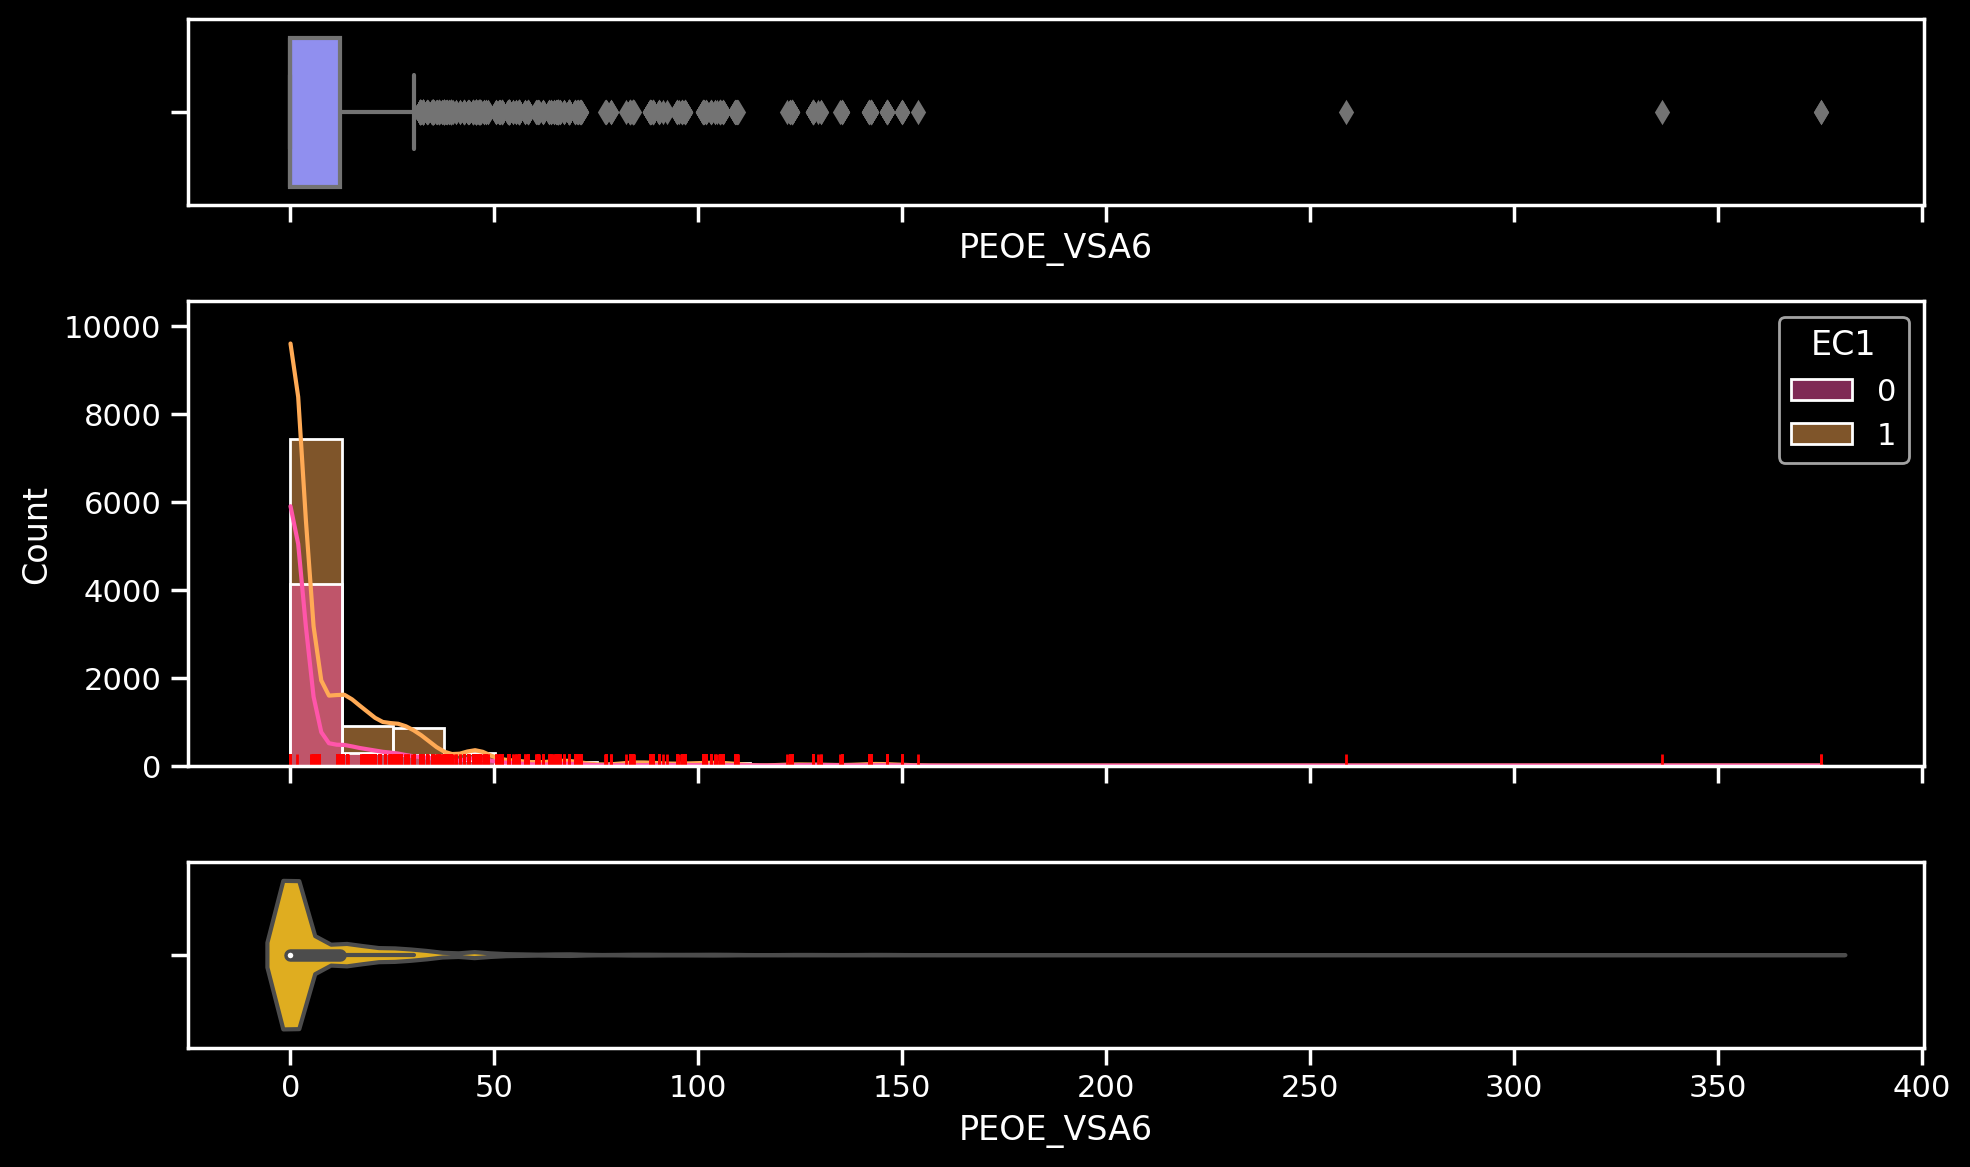

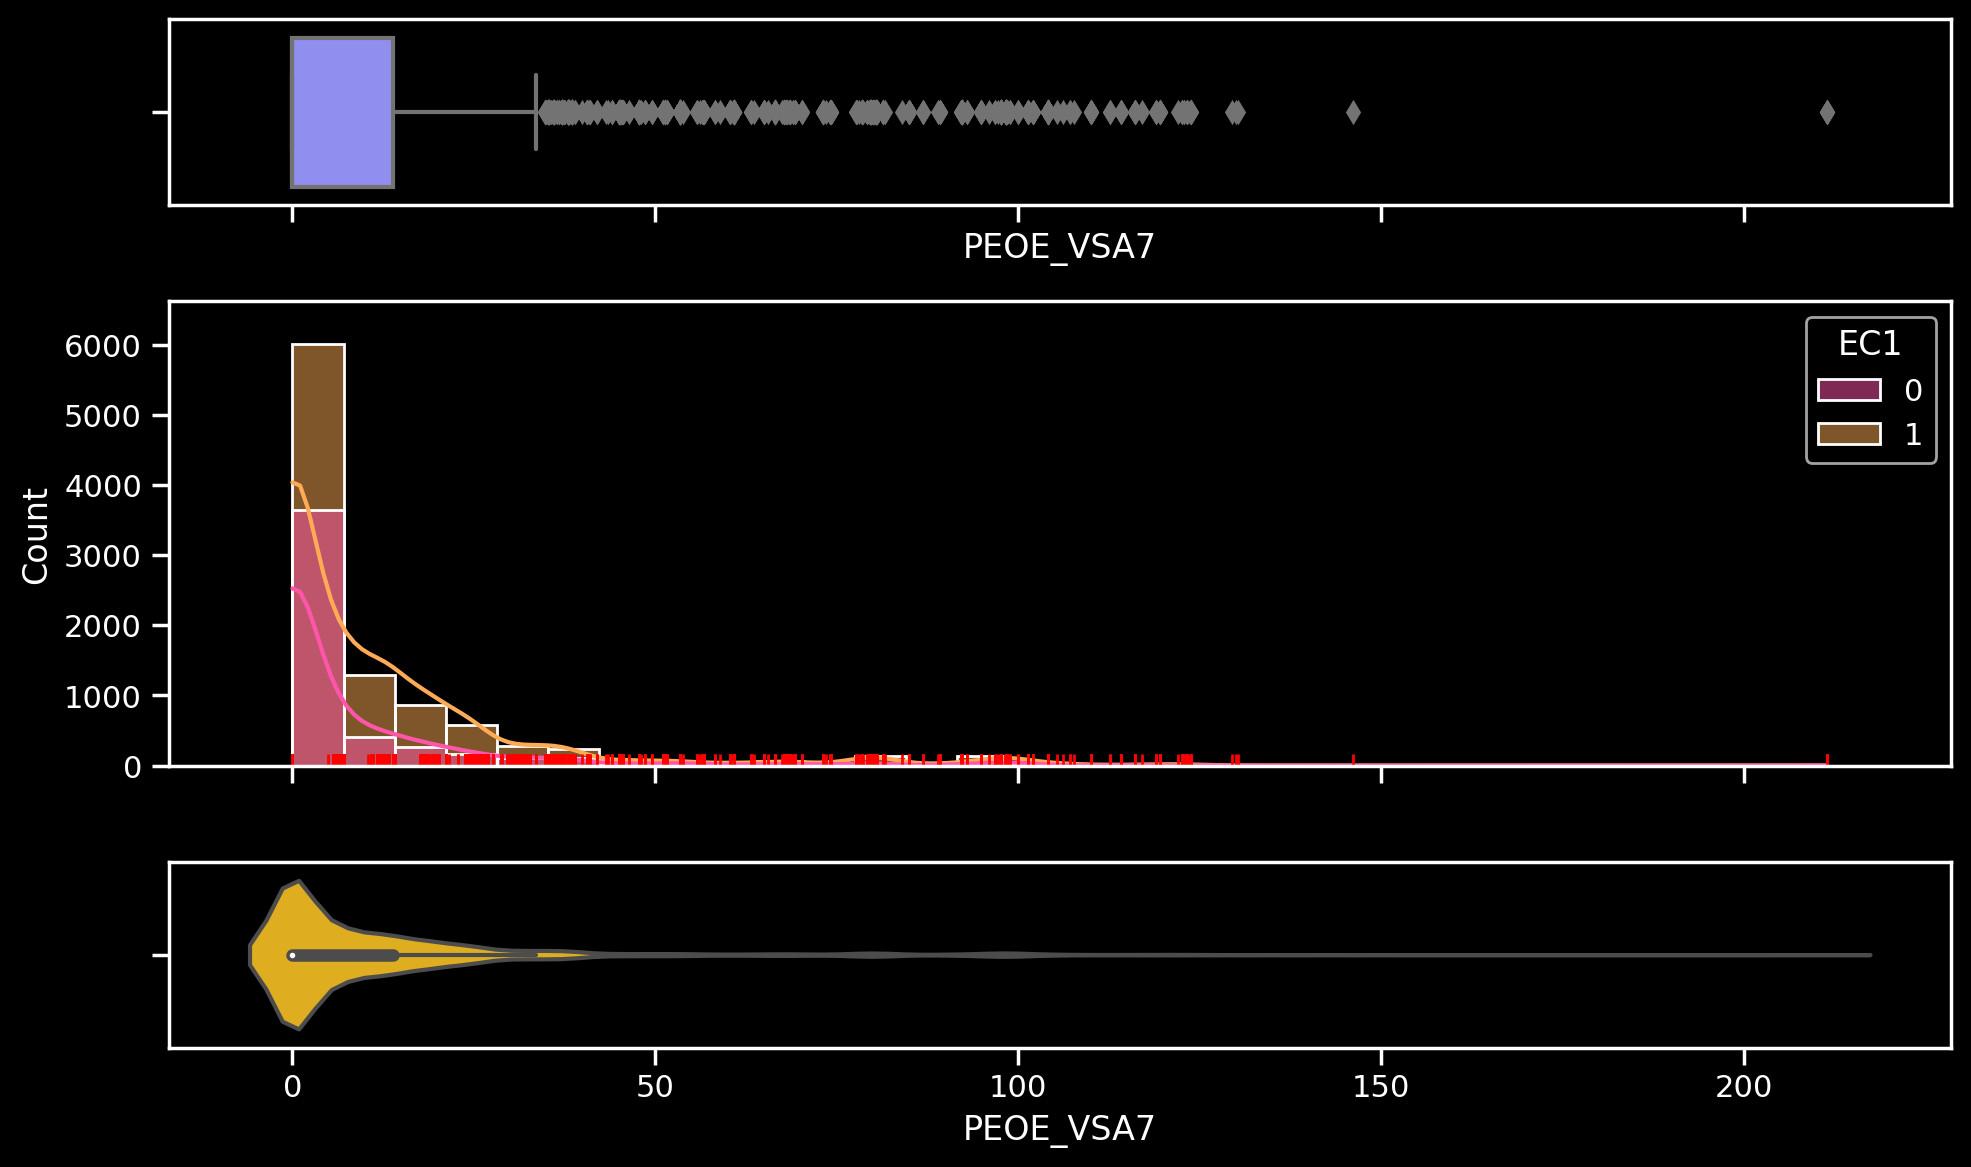

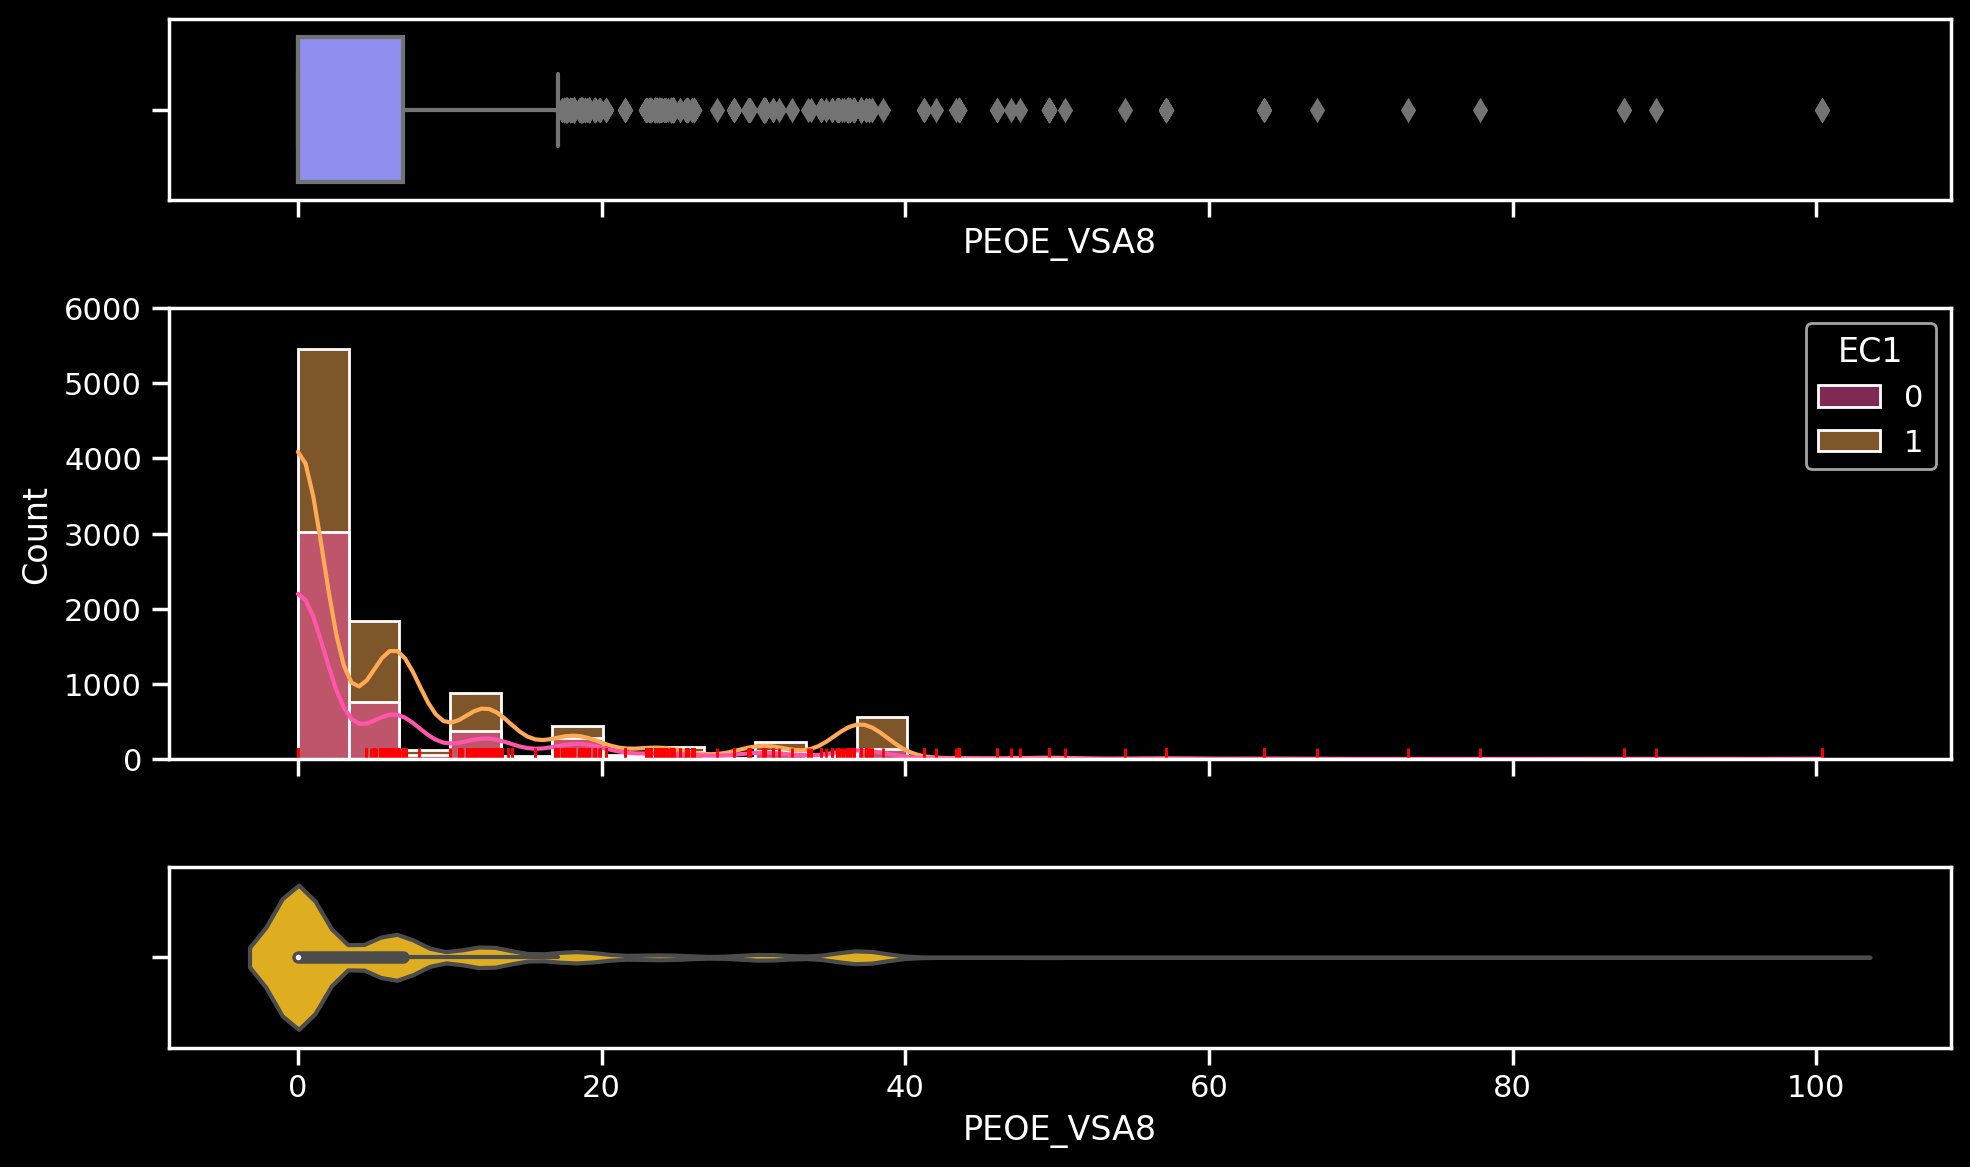

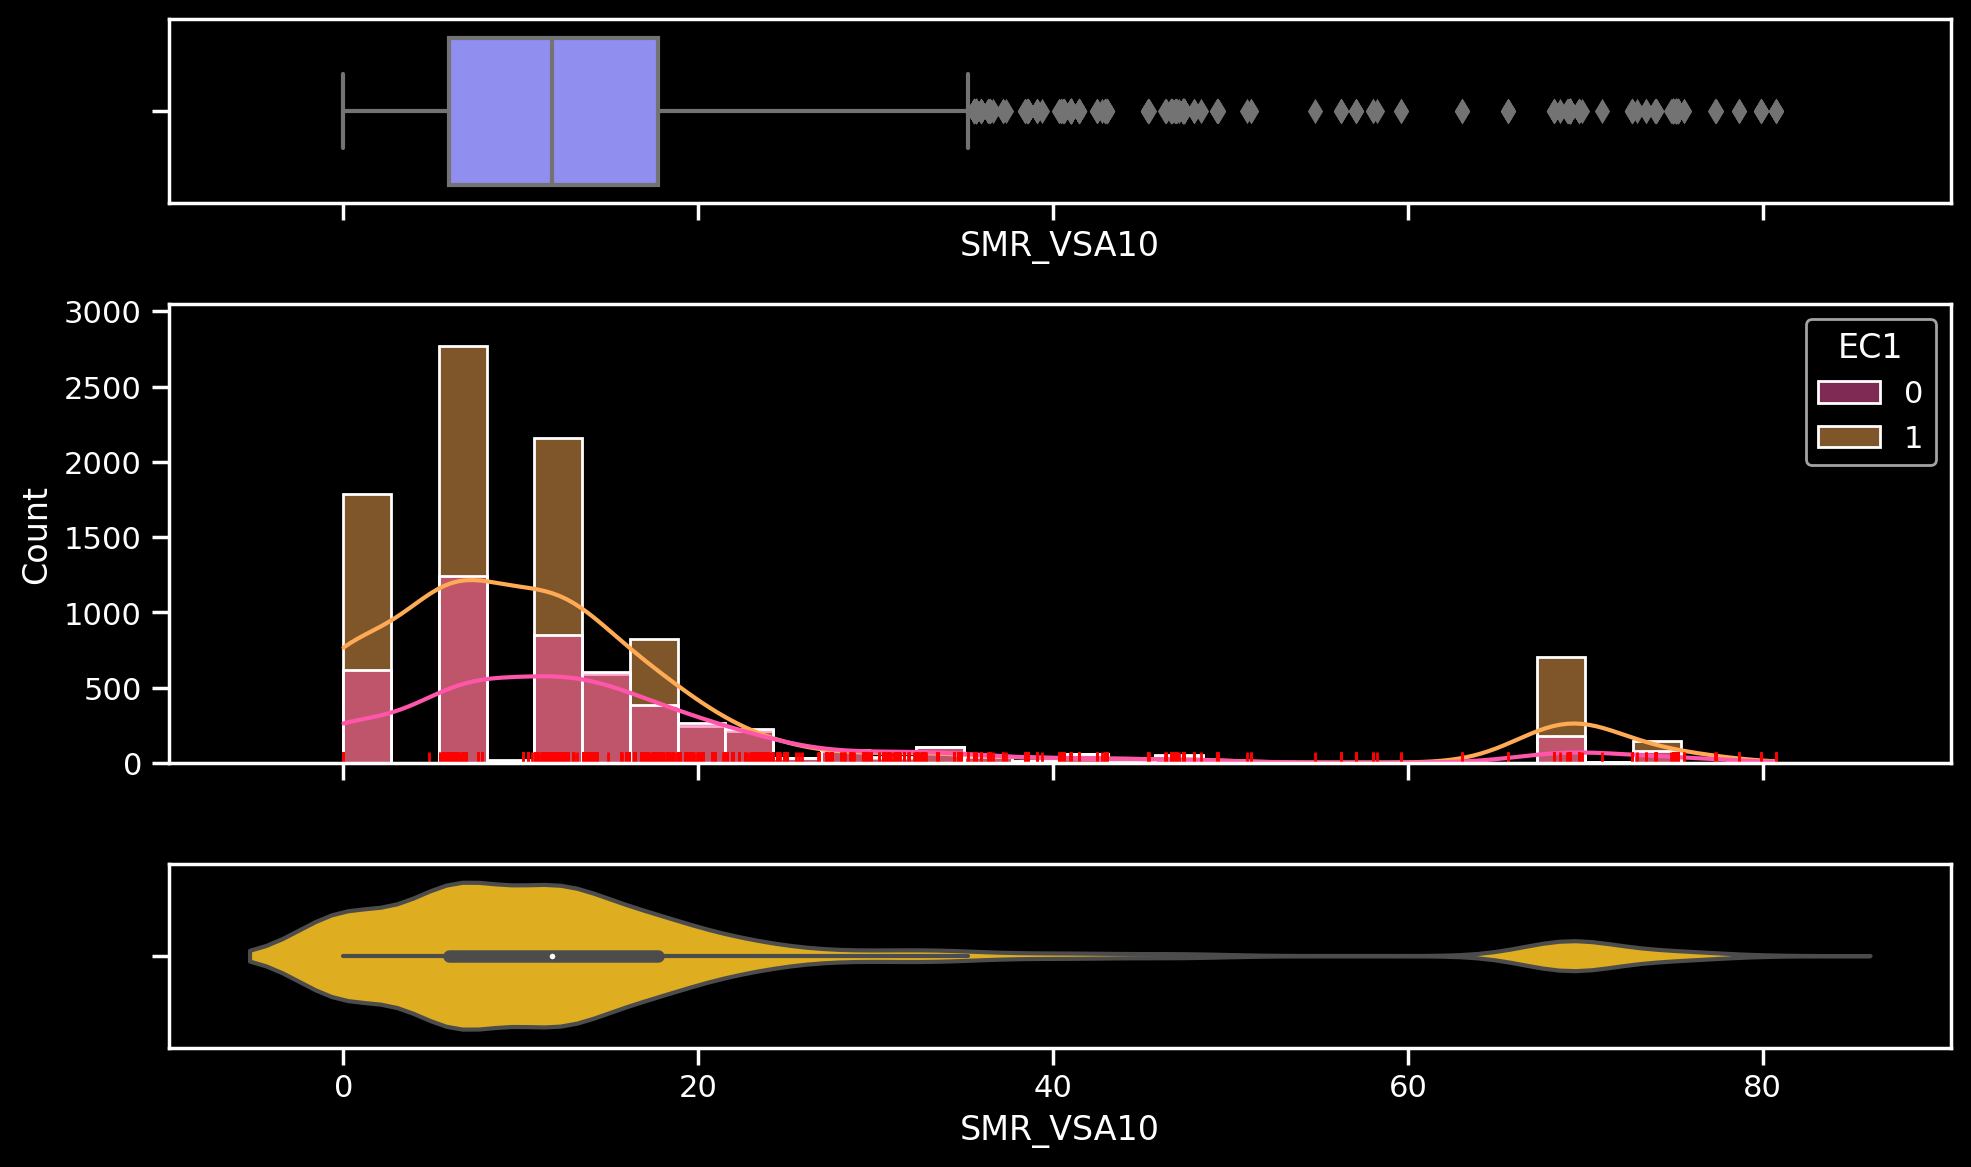

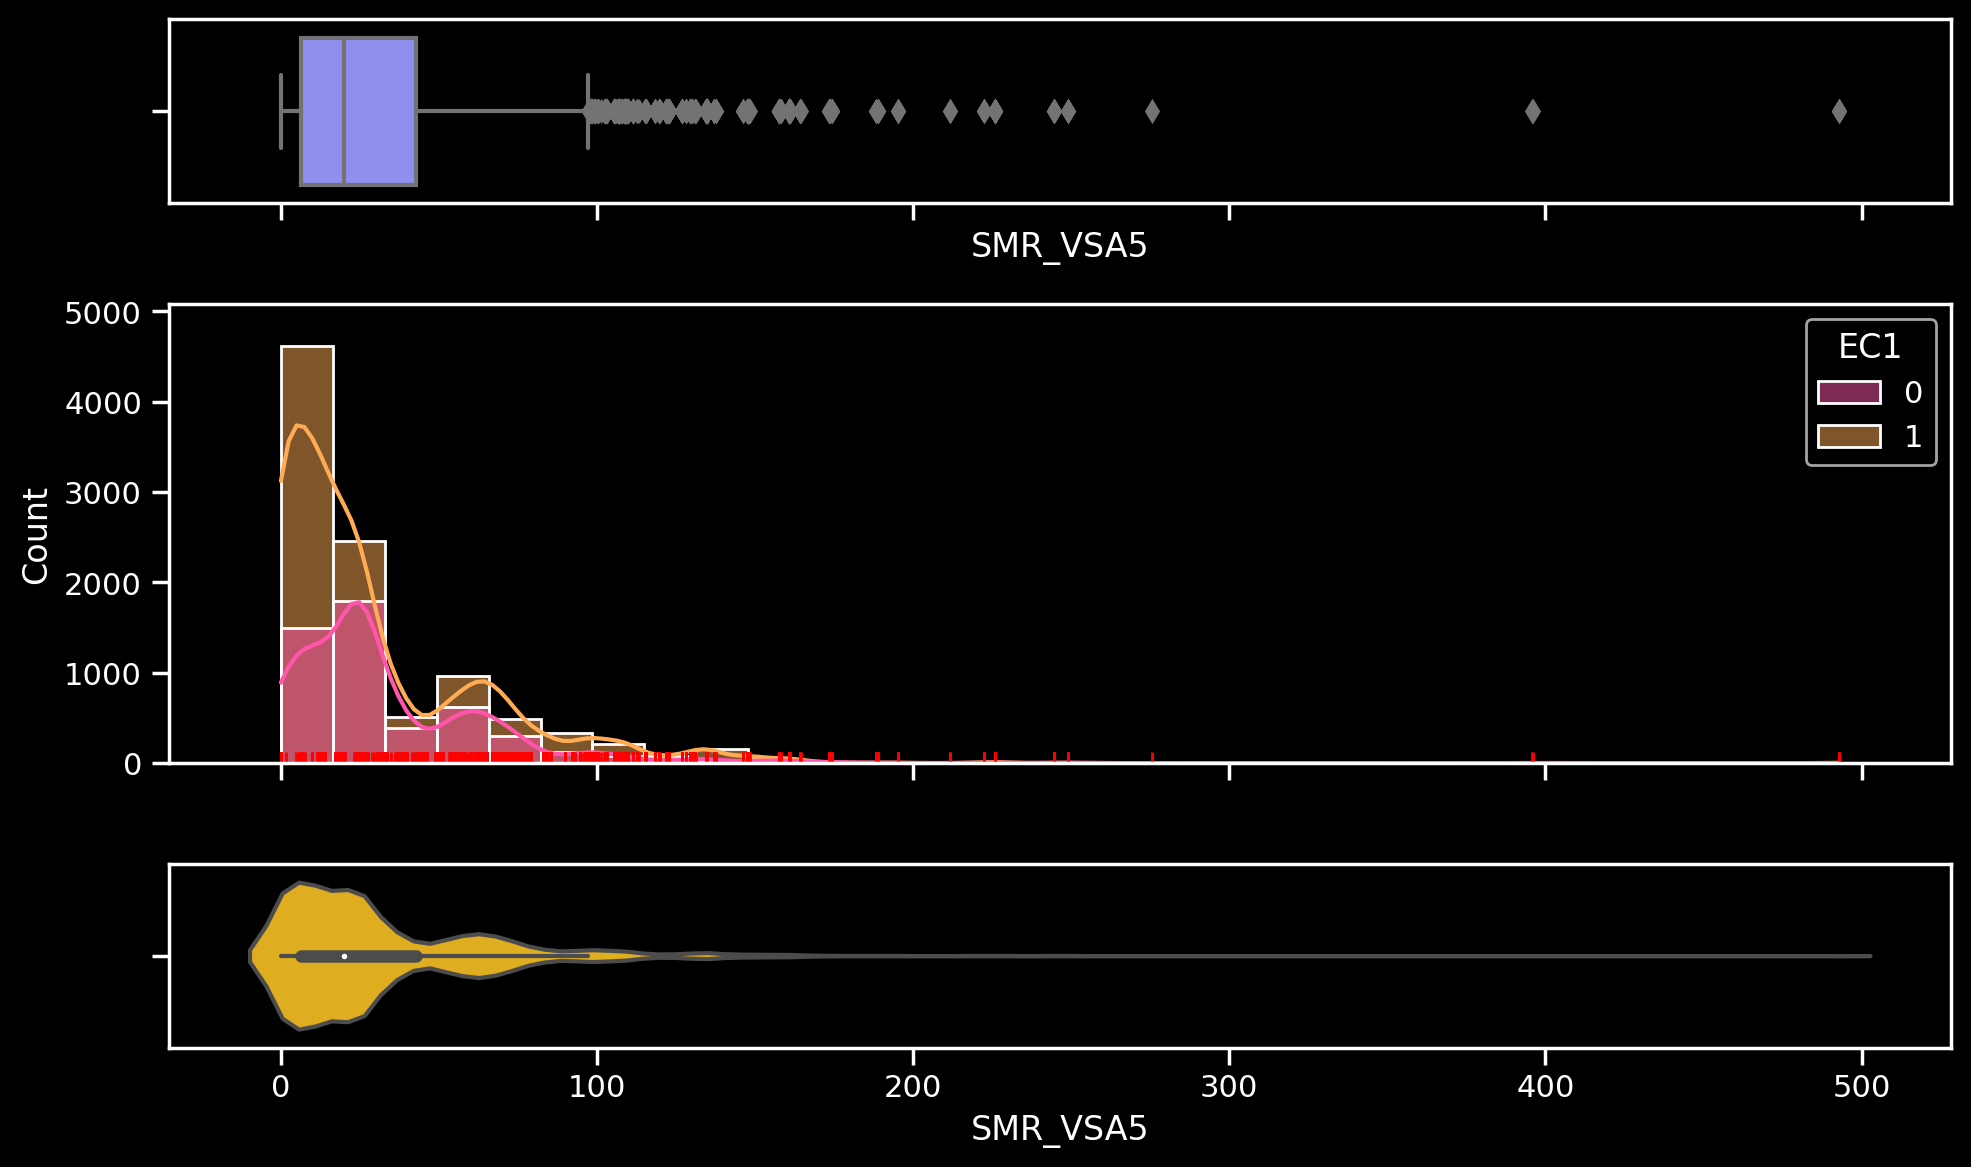

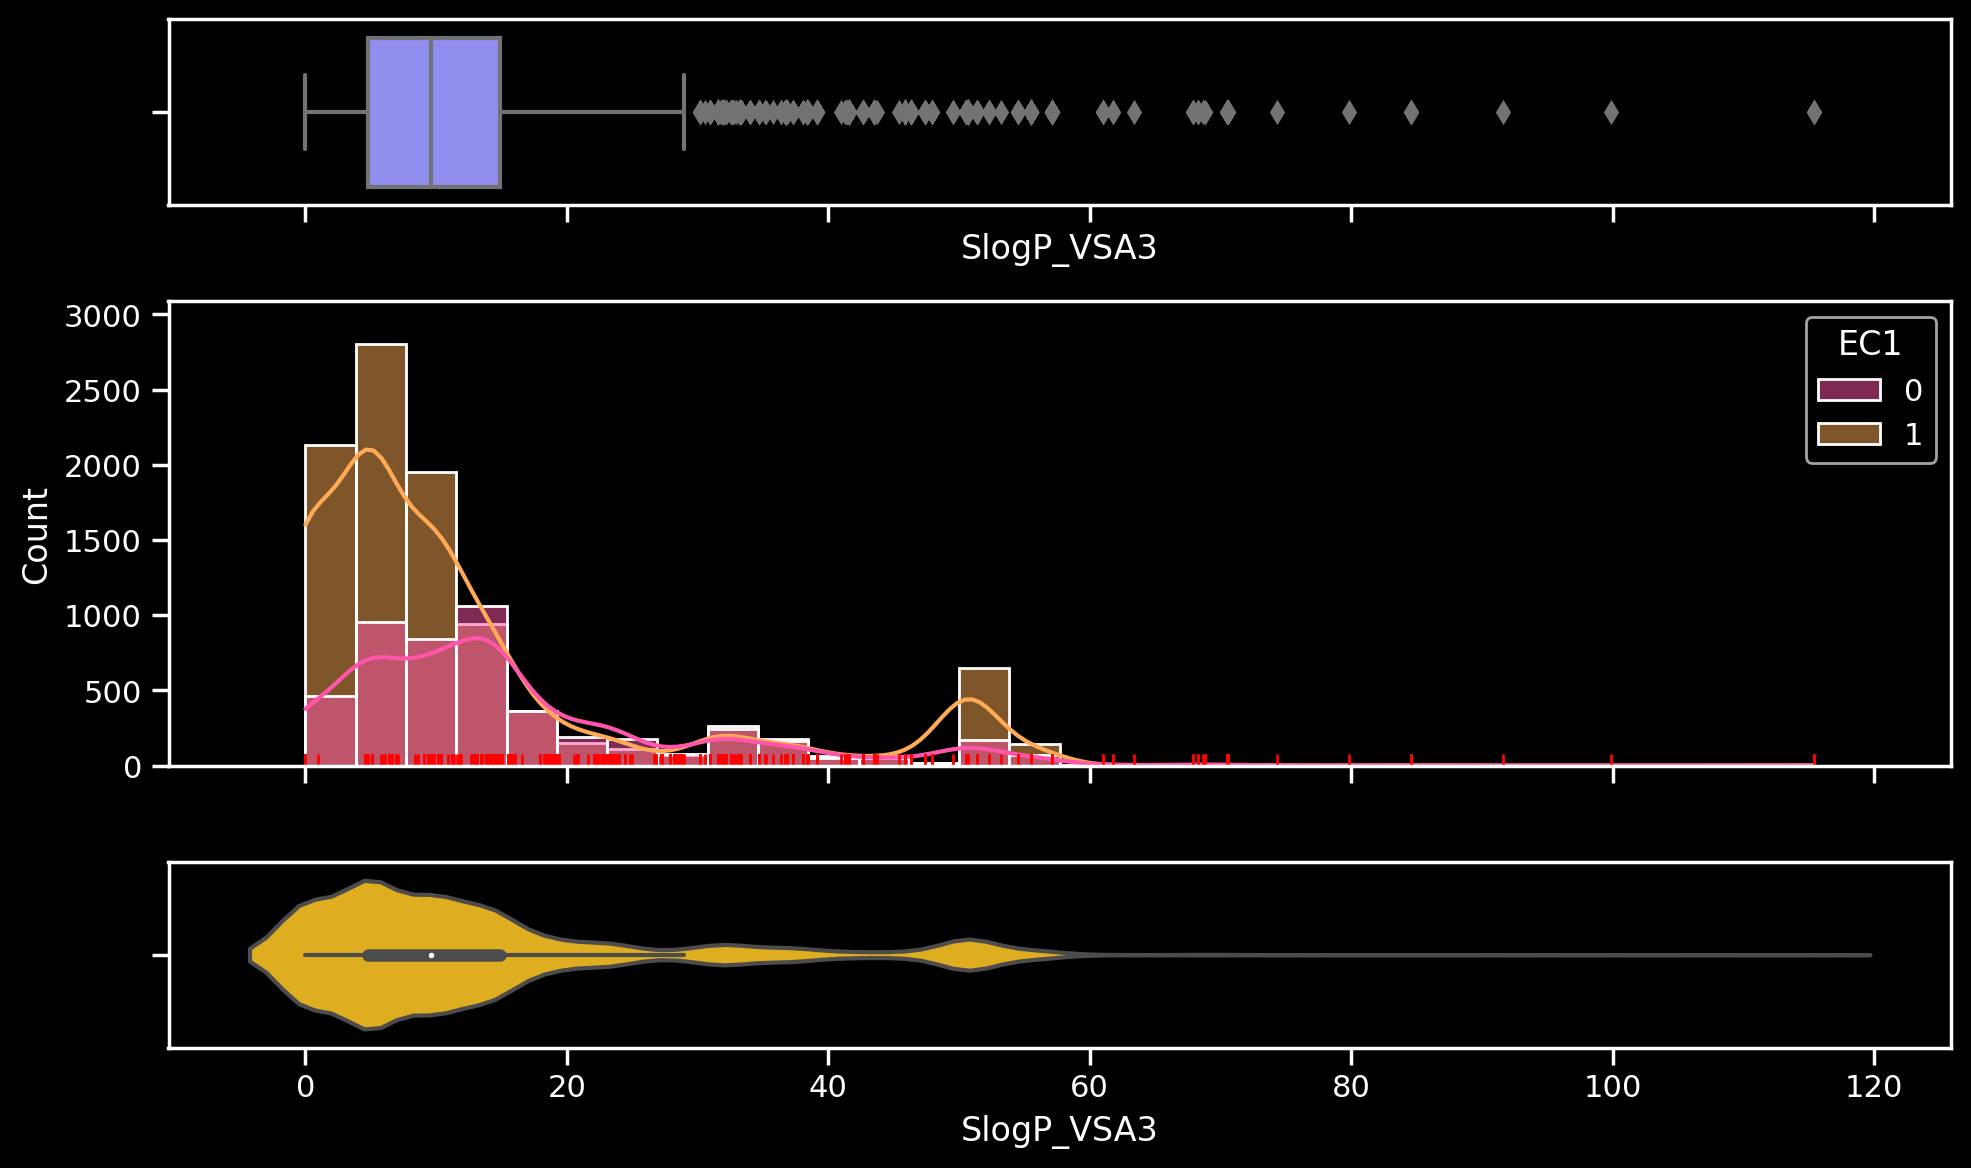

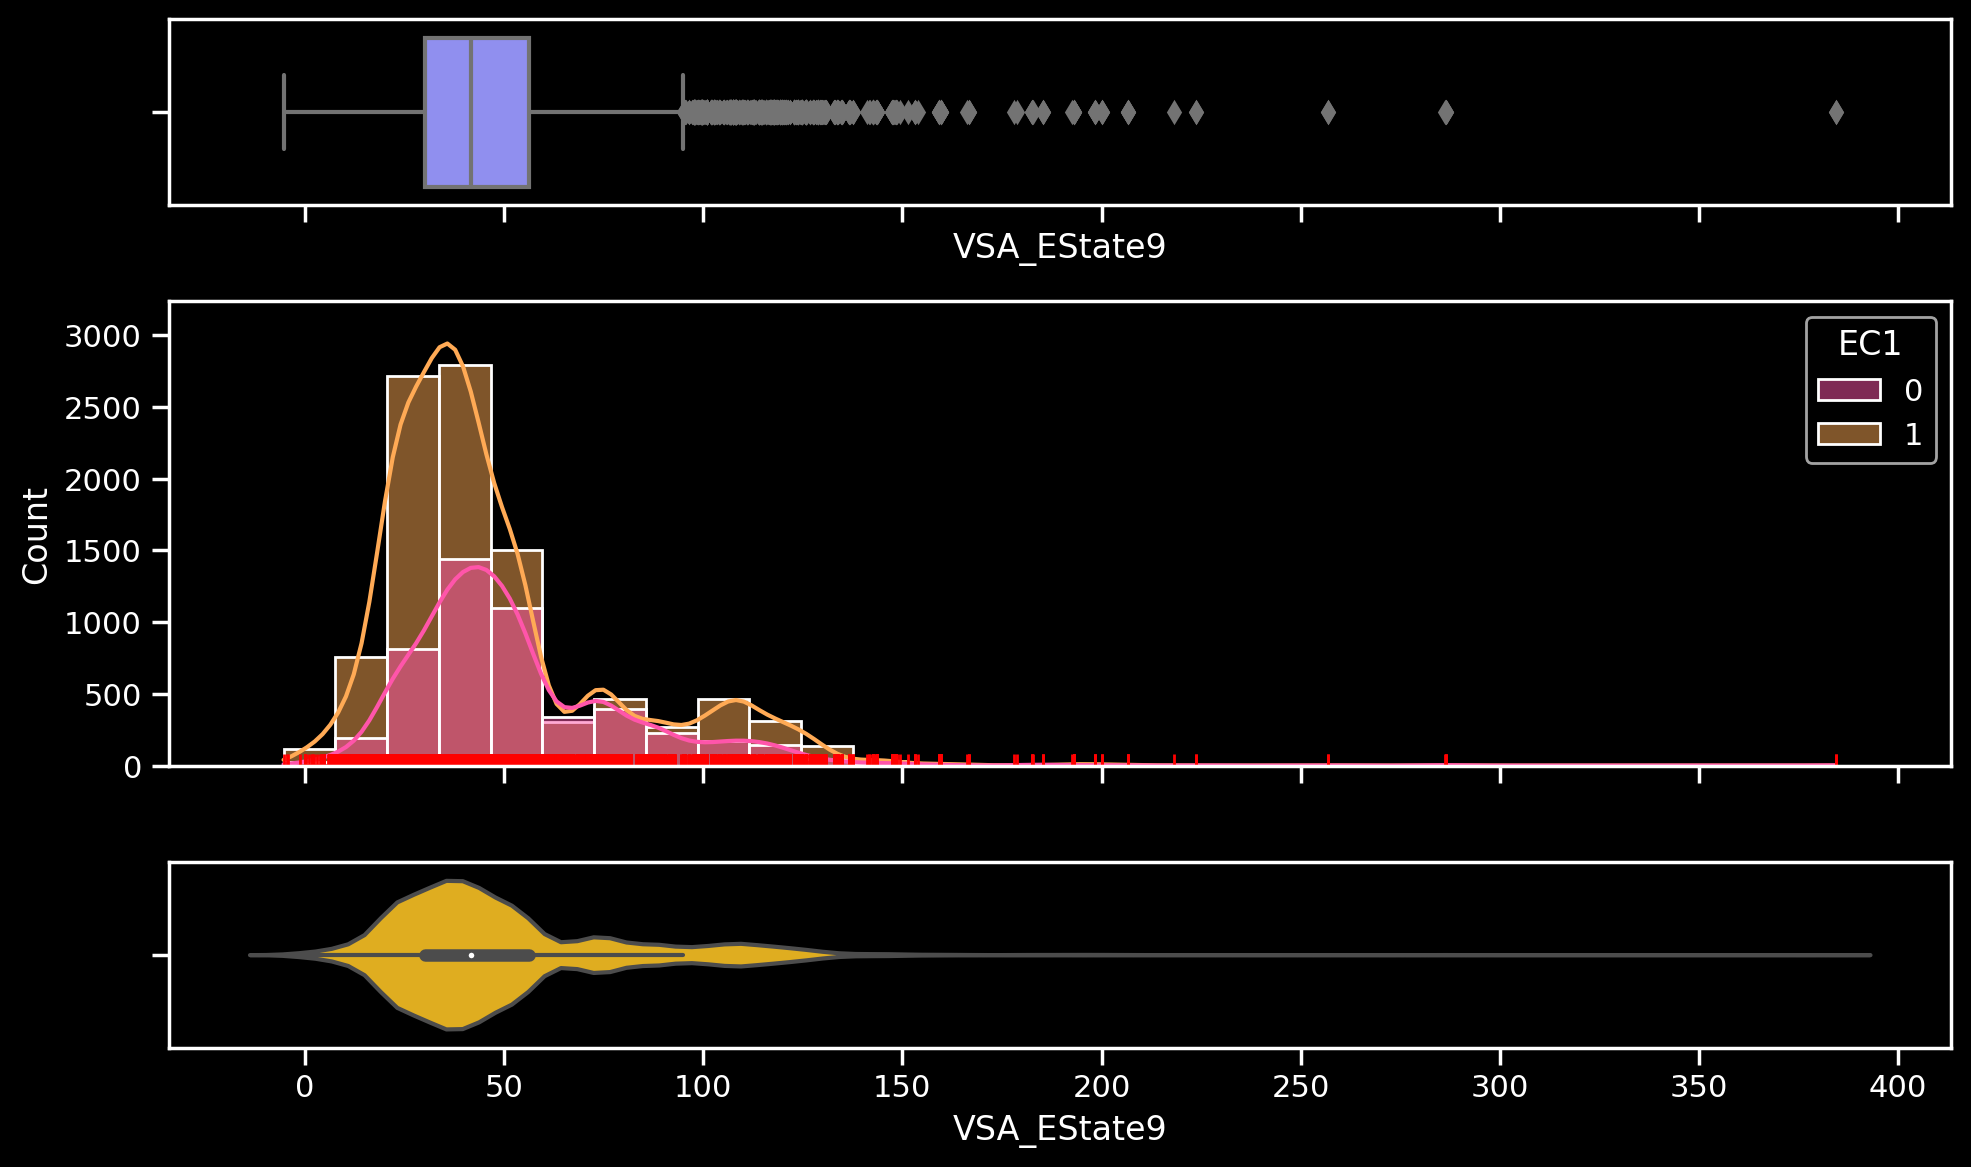

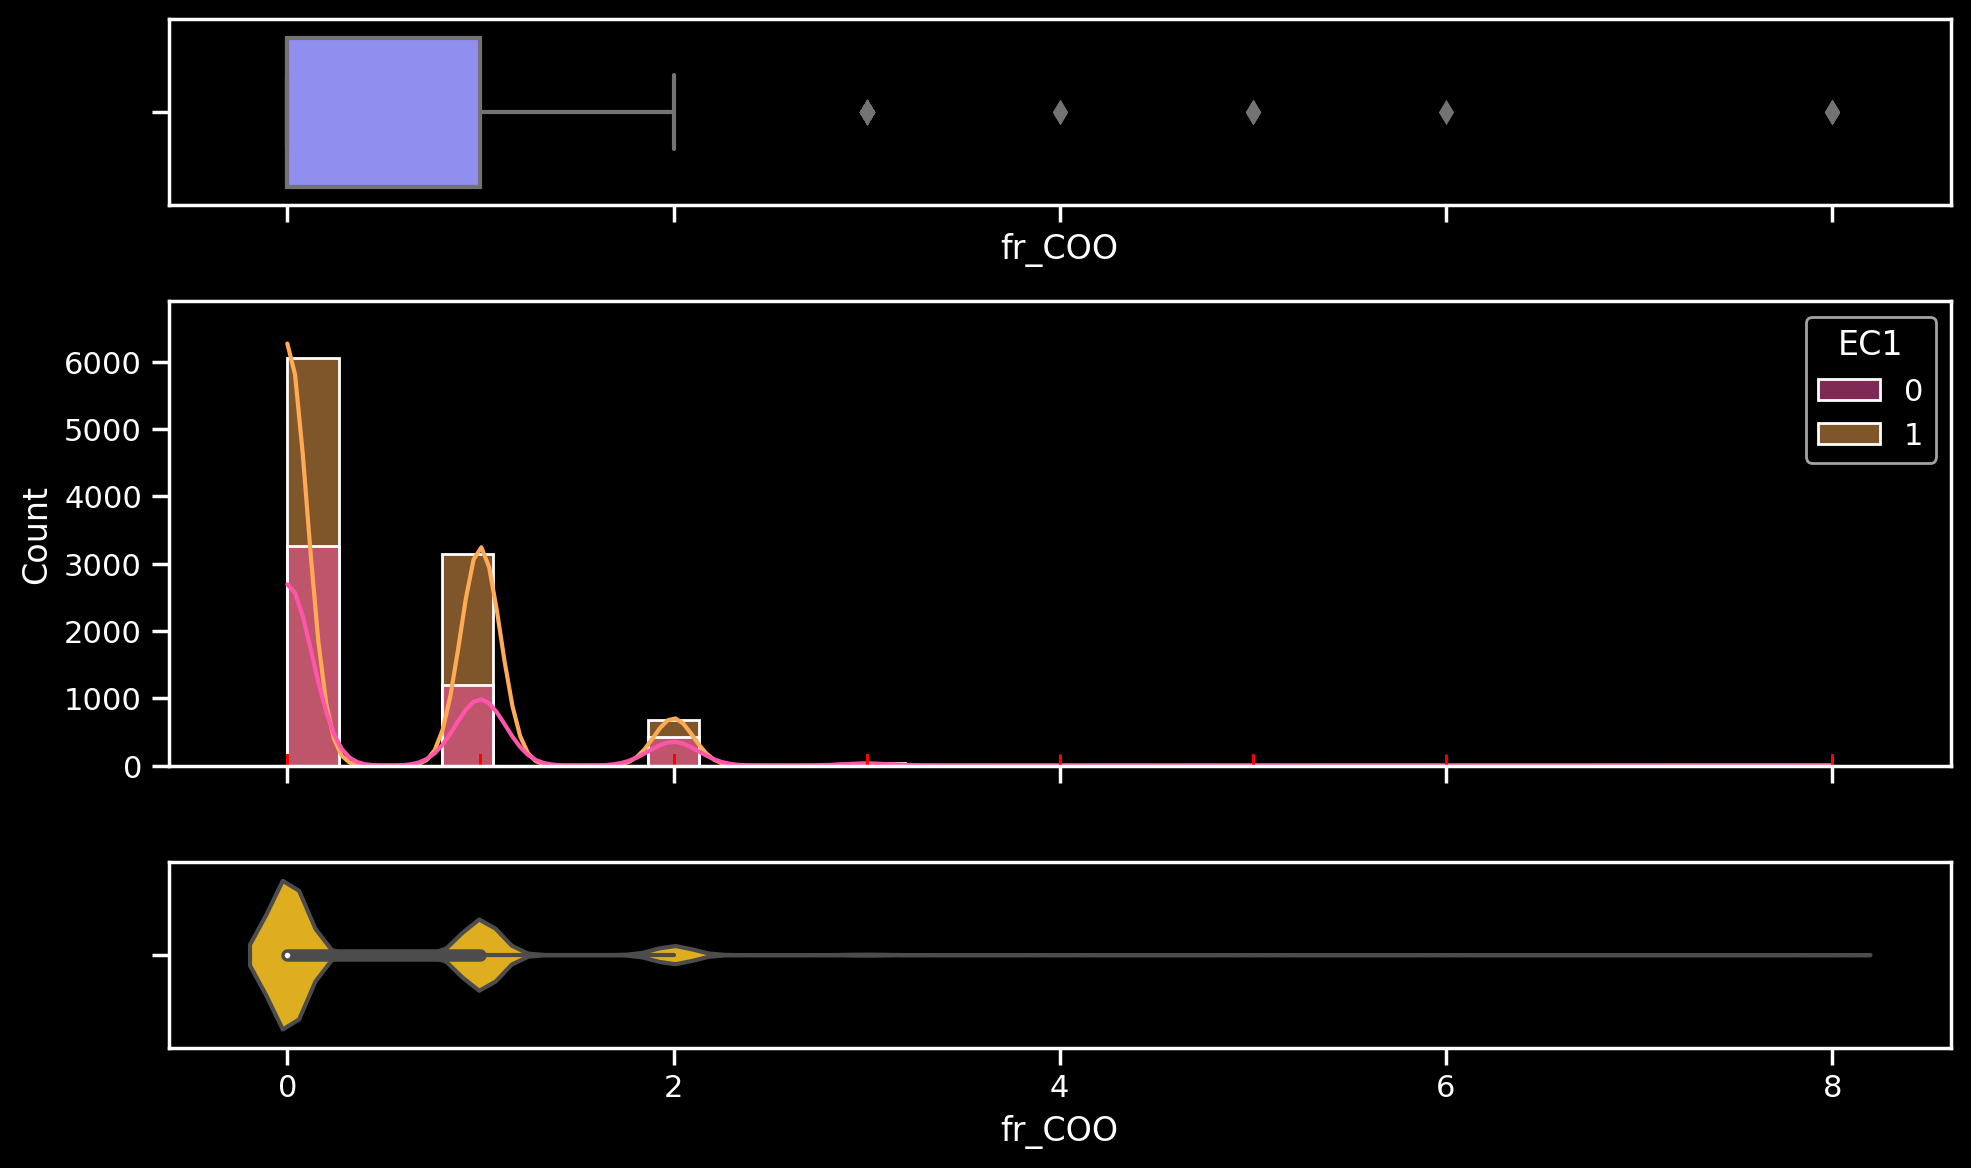

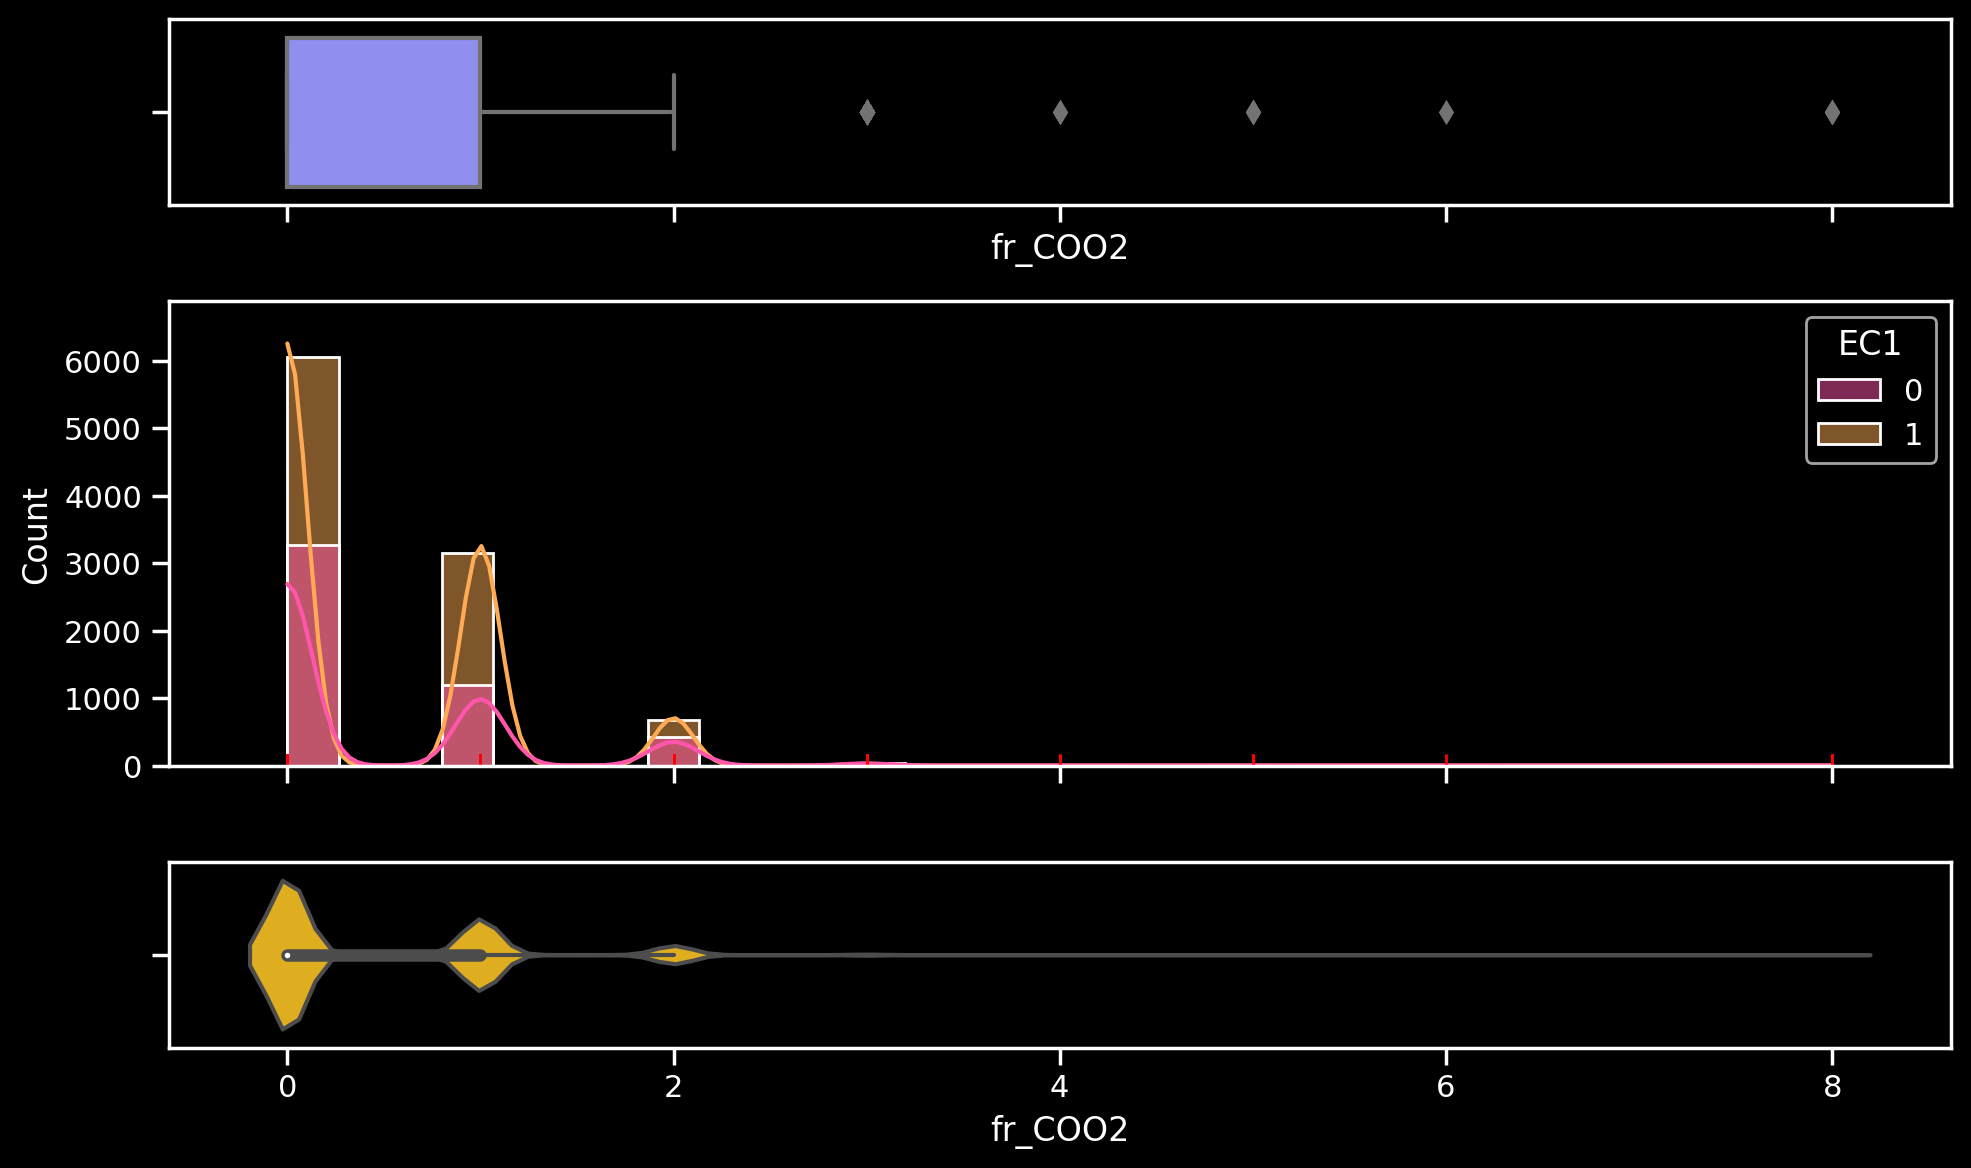

In [58]:
for i in df_train.columns[:-2]:
    plot_hist_box_violin(df_train, i, 30, 'EC1')

## Bivariate Analysis

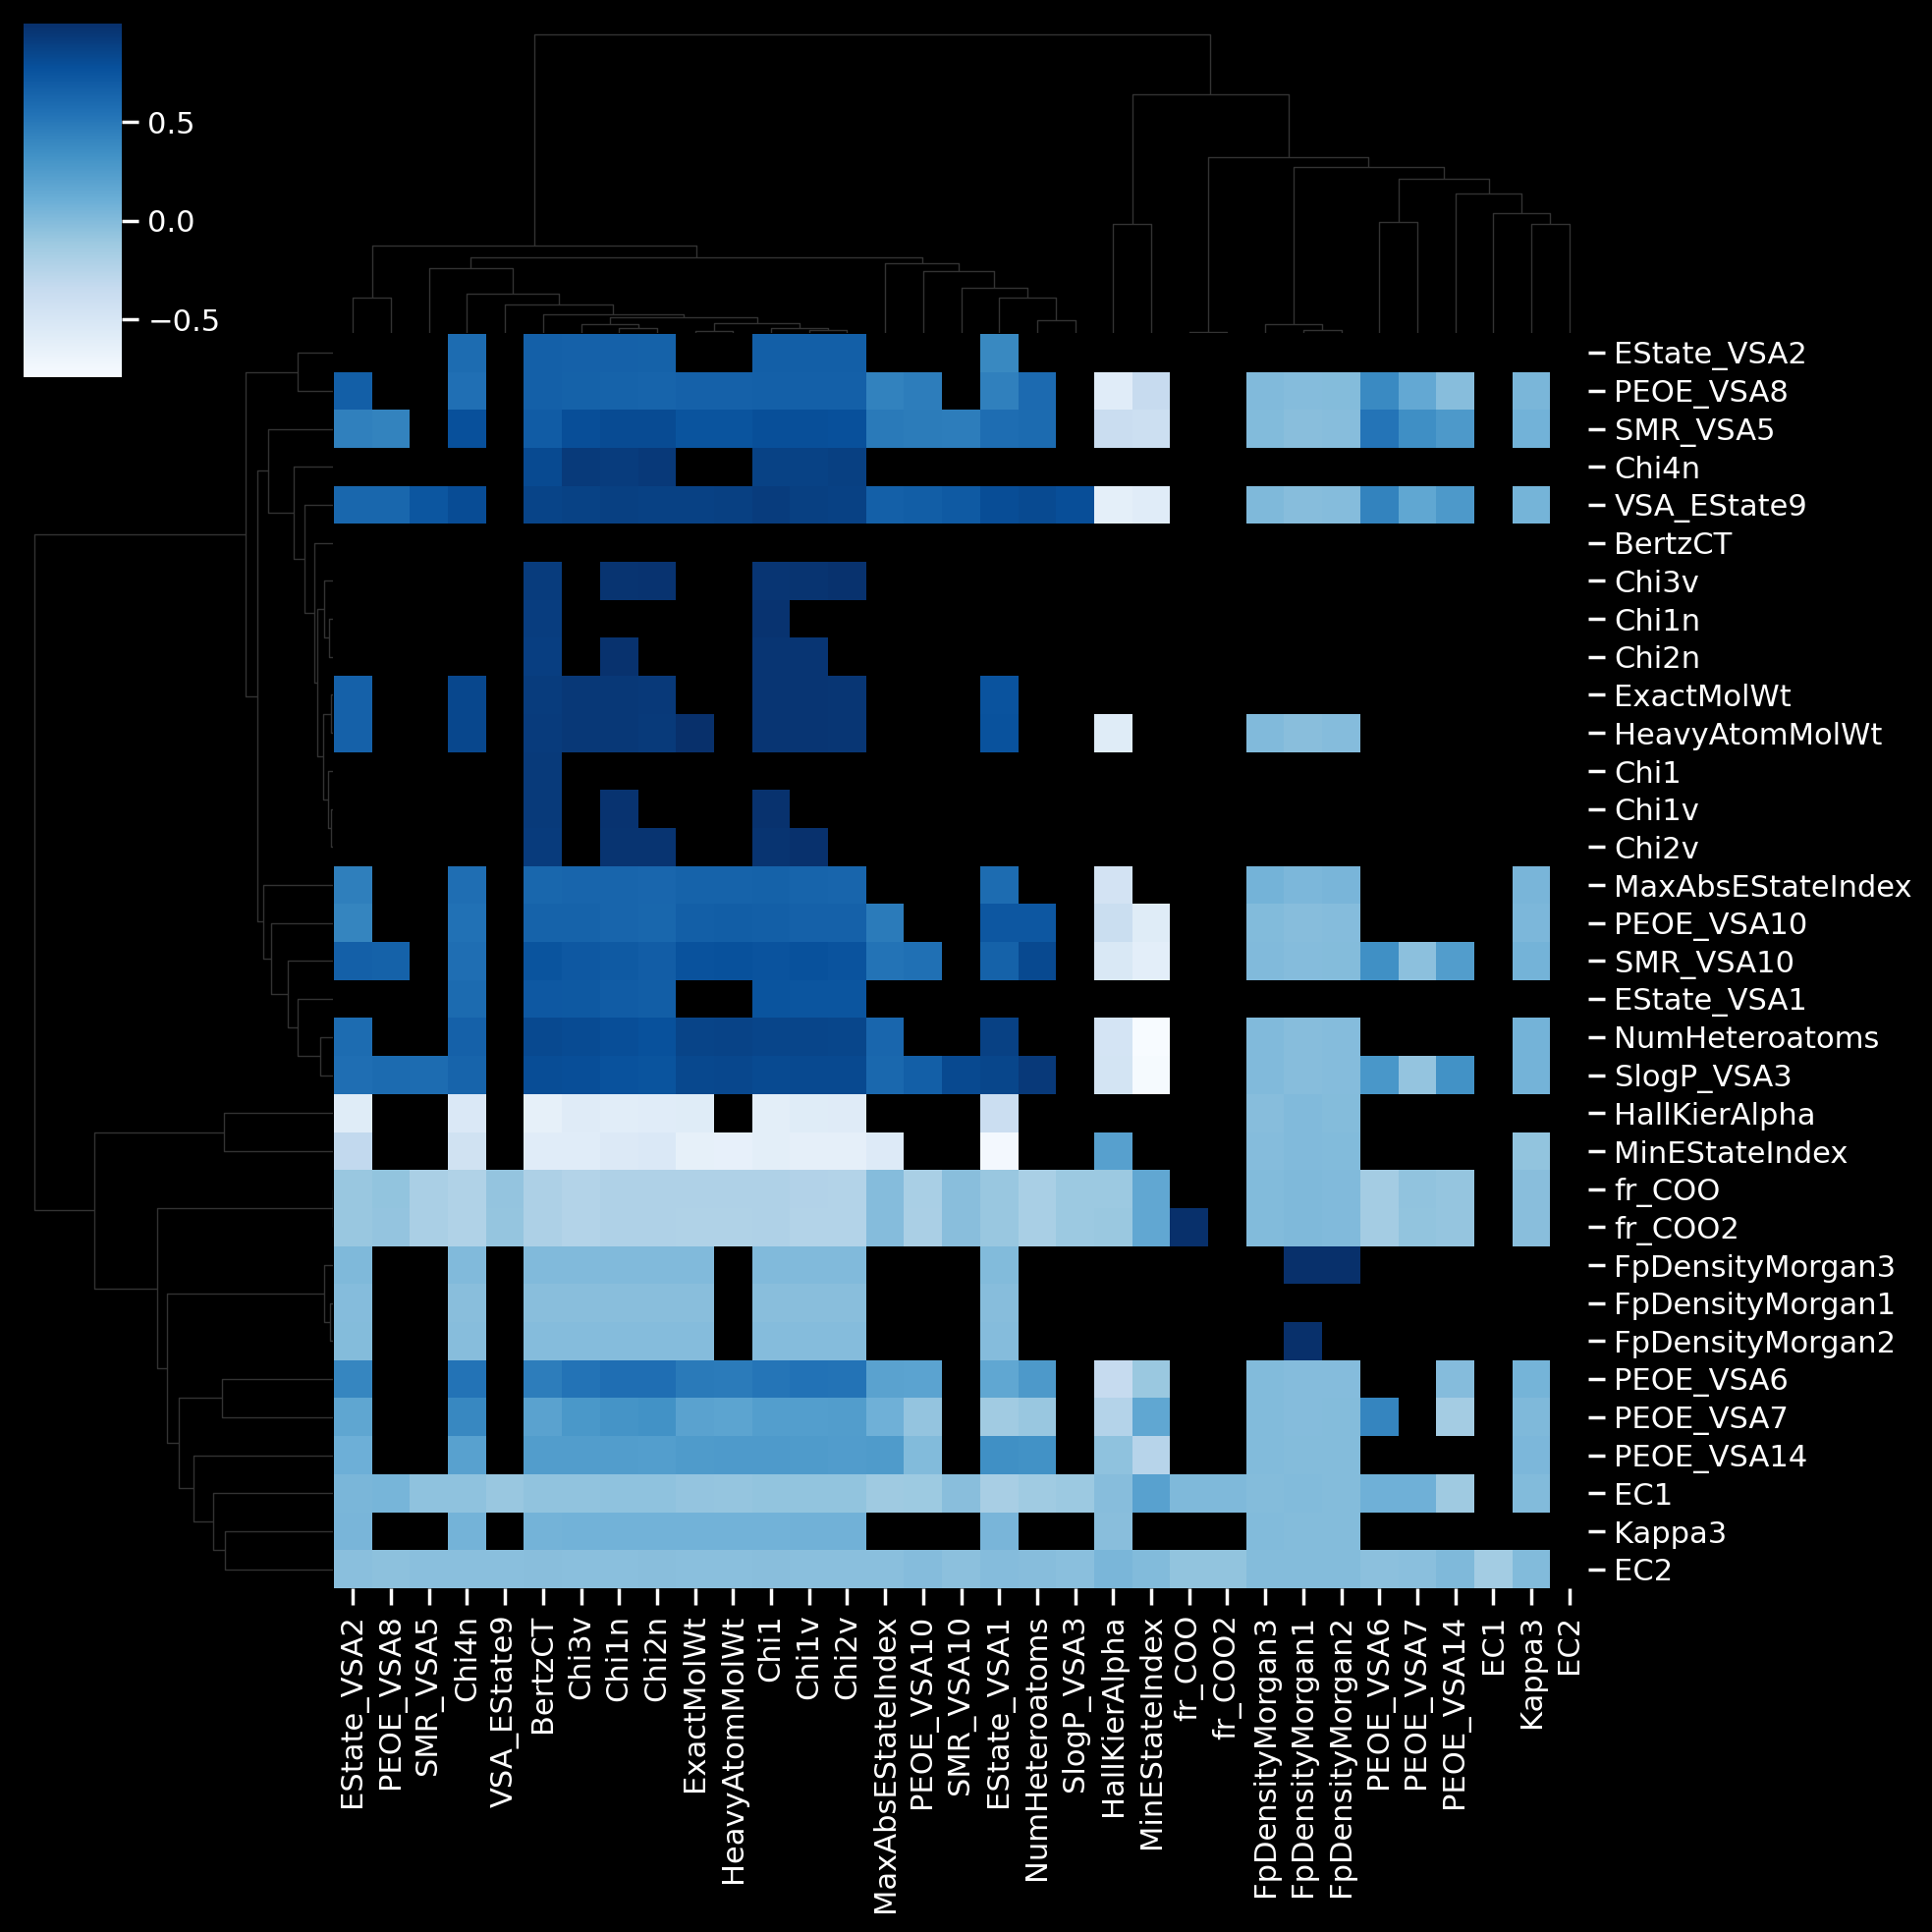

In [59]:
df_train_corr = df_train.corr()
sns.clustermap(df_train_corr, mask = np.triu(df_train_corr), cmap="Blues")

<Axes: >

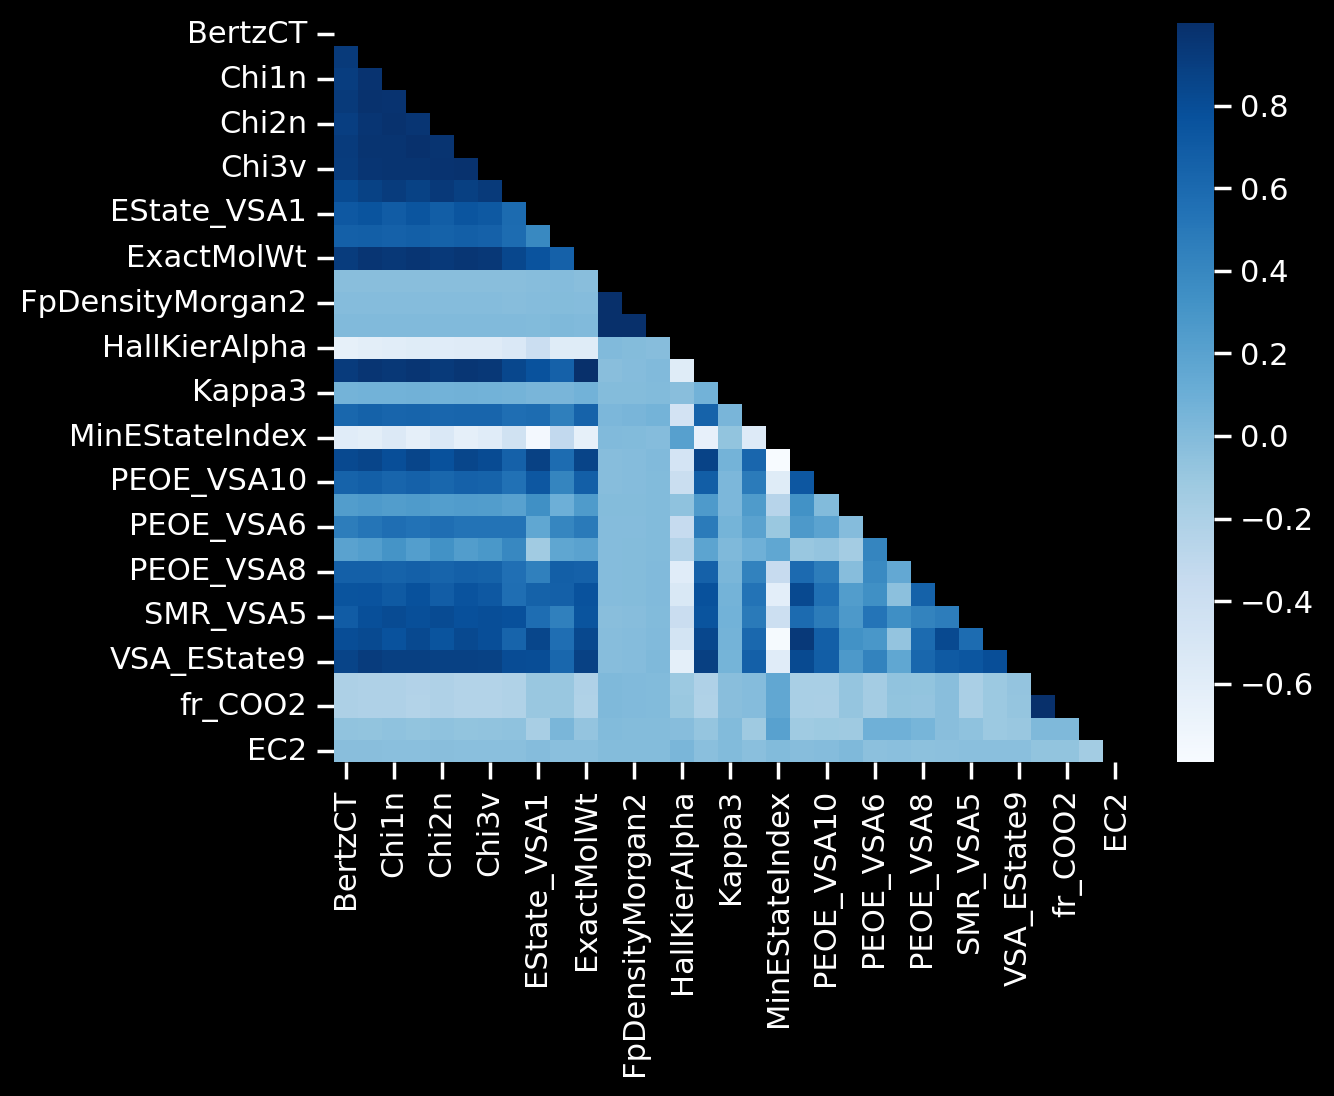

In [60]:
sns.heatmap(df_train_corr, mask = np.triu(df_train_corr), cmap="Blues")

- ### We see lot's of correlation among various columns

In [61]:
# ax = sns.pairplot(df_train, hue='EC1')

### Feature selection - Wrapper based 
- Because the columns are correlated, filter based methods like Information Gain, Chi-squared test does not take correlation among columns. So, we go with wrapper based method

In [62]:
df_train.drop(['EC1','EC2'],axis=1)

BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
0      323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1      273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2      521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3      567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4      112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   
...           ...        ...       ...        ...       ...        ...   
14833  632.207041  10.911303  6.579933   9.179964  4.653583   6.030052   
14834   62.568425   2.642734  1.446898   1.446898  0.879497   0.879497   
14835  981.327476  10.363081  6.146219   6.146219  4.700576   4.700576   
14836  299.171248   9.949161  6.589761   7.848913  5.276568   5.476436   
14837  785.394062  15.671142  9.896164  10.234264  7.860296   8.522605   

          Chi3v     Chi4n  EState_VSA1  EState_VSA2  ...  PEOE_VSA14  \
0      2.754513  1.749203     0.000000    11.938294  ...   91.536492   
1      2.201375  1.289775    45.135471     0.000000  ...    7.822697   
2      5.824822  1.770579    15.645394     6.606882  ...   15.645394   
3      7.914542  3.067181    95.639554     0.000000  ...   21.335138   
4      1.036450  0.727664    17.980451    12.841643  ...   11.938611   
...         ...       ...          ...          ...  ...         ...   
14833  3.670528  1.770579    32.971529     6.606882  ...   15.645394   
14834  0.174620  0.000000     0.000000     0.000000  ...    0.000000   
14835  3.064846  2.133897    17.248535     0.000000  ...    0.000000   
14836  3.978973  2.299833    45.623794     0.000000  ...    7.822697   
14837  5.645502  3.312893    82.448246     5.687386  ...   15.645394   

       PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10    SMR_VSA5  SlogP_VSA3  \
0       0.000000   0.000000   0.000000  17.744066    0.000000    4.794537   
1       0.000000   0.000000   0.000000   7.822697   30.705892   13.825658   
2       0.000000  53.378235   0.000000  15.645394   73.143616   17.964475   
3       0.000000   0.000000   6.420822  15.645394   62.107304   31.961948   
4       6.923737  19.386400   0.000000  11.938611   18.883484    9.589074   
...          ...        ...        ...        ...         ...         ...   
14833   0.000000  13.847474   6.923737  34.407699   32.607024   18.947452   
14834   0.000000   0.000000   6.066367   0.000000    6.420822    0.000000   
14835   0.000000   0.000000  23.762553  10.969244    0.000000    0.000000   
14836  19.420579   0.000000   0.000000   7.822697  108.961047    9.088795   
14837   0.000000  37.107112   0.000000  32.757611   38.704130   22.701338   

       VSA_EState9  fr_COO  fr_COO2  
0        35.527357       0        0  
1        44.707310       0        0  
2        45.660120       0        0  
3        87.509997       0        0  
4        33.333333       2        2  
...            ...     ...      ...  
14833    61.376610       0        0  
14834    10.000000       0        0  
14835    66.666667       0        0  
14836    45.583333       0        0  
14837    71.127044       0        0  

[14838 rows x 31 columns]

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(df_train.drop(['EC1', 'EC2'], axis=1), df_train['EC1'])
print("Number of features", fit.n_features_)
print("Selected features", fit.support_)  # Selected features
print("Feature ranking", fit.ranking_)
fit.feature_names_in_


Number of features 5
Selected features [False False False False False  True False  True False False False False
 False False False False  True  True  True False False False False False
 False False False False False False False]
Feature ranking [ 3 12  4 16 19  1 13  1 14  9 10  8 11  6  7 18  1  1  1  2 20 23 25 24
 22 15 17 21  5 26 27]


array(['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt',
       'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
       'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex',
       'MinEStateIndex', 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5',
       'SlogP_VSA3', 'VSA_EState9', 'fr_COO', 'fr_COO2'], dtype=object)

In [64]:
top_k_features = fit.get_feature_names_out().tolist()
top_k_features

['Chi2v', 'Chi4n', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex']

In [65]:
top_k_features
top_k_features.append("EC1")
top_k_features

['Chi2v', 'Chi4n', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex']

['Chi2v', 'Chi4n', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'EC1']

In [66]:
top_k_features_corr = df_train[top_k_features].corr()
top_k_features_corr

Chi2v     Chi4n    Kappa3  MaxAbsEStateIndex  \
Chi2v              1.000000  0.889549  0.078908           0.633889   
Chi4n              0.889549  1.000000  0.064265           0.572191   
Kappa3             0.078908  0.064265  1.000000           0.046052   
MaxAbsEStateIndex  0.633889  0.572191  0.046052           1.000000   
MinEStateIndex    -0.623095 -0.439815 -0.065131          -0.557395   
EC1               -0.064649 -0.054333  0.002552          -0.122893   

                   MinEStateIndex       EC1  
Chi2v                   -0.623095 -0.064649  
Chi4n                   -0.439815 -0.054333  
Kappa3                  -0.065131  0.002552  
MaxAbsEStateIndex       -0.557395 -0.122893  
MinEStateIndex           1.000000  0.208827  
EC1                      0.208827  1.000000

<Axes: >

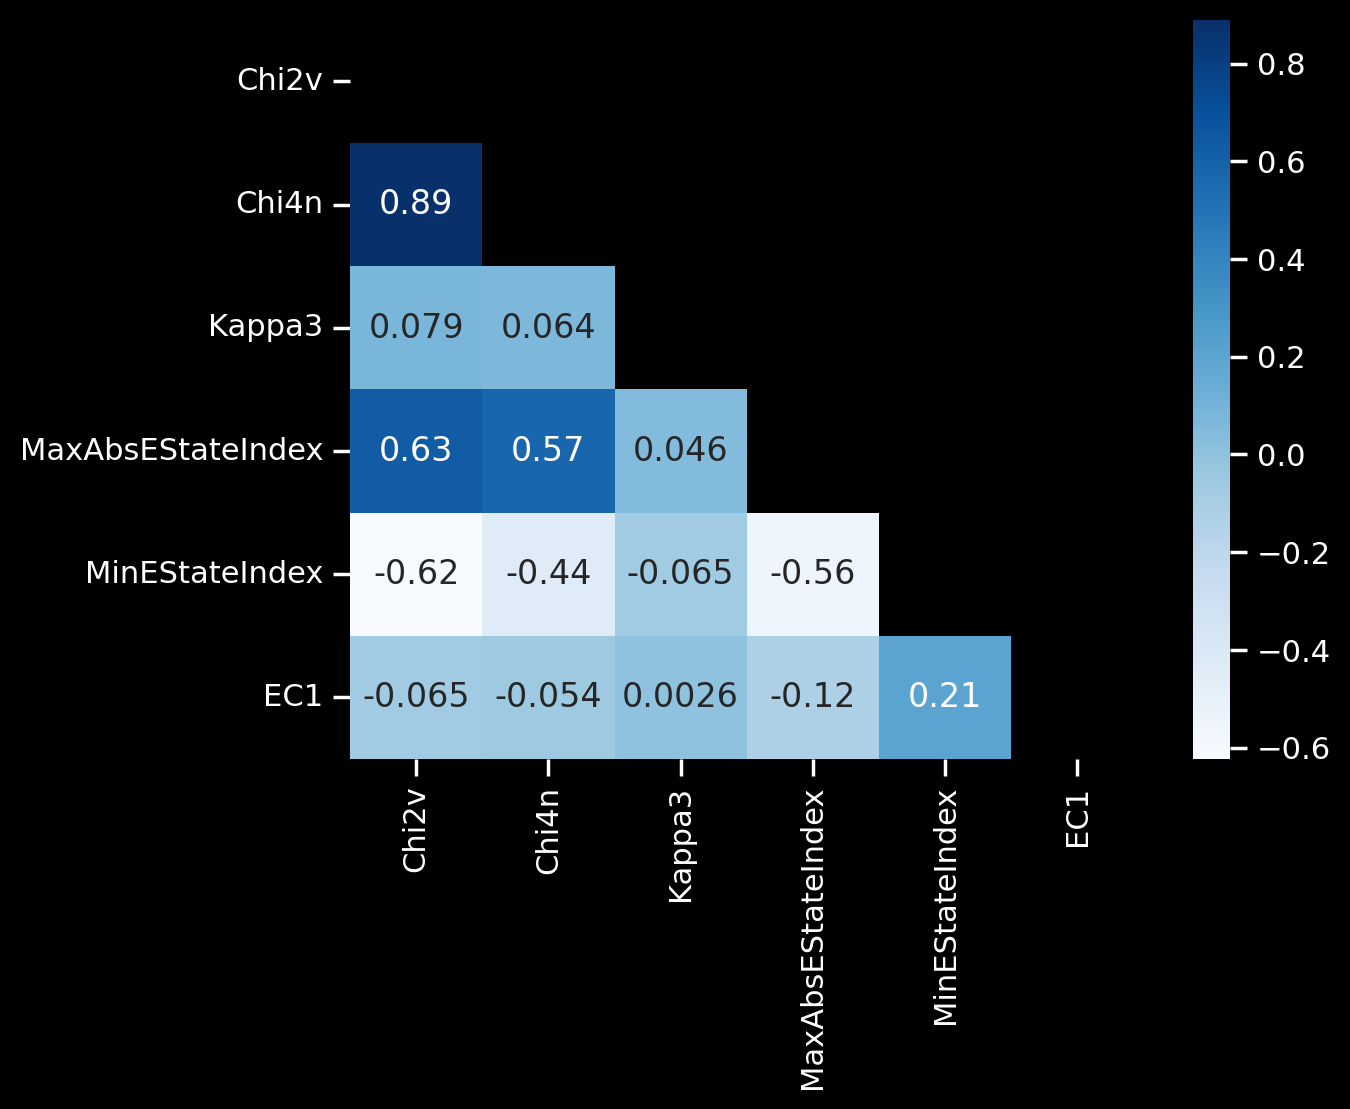

In [67]:
sns.heatmap(top_k_features_corr,
            annot=True,
            mask=np.triu(top_k_features_corr),
            cmap="Blues")

In [68]:
# Filter based methods

from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_new = SelectKBest(f_regression,k=4).fit_transform(df_train.drop(['EC1','EC2'],axis=1),df_train['EC1'])
X_new

array([[ 0.        ,  0.17158541,  4.        , 91.53649165],
       [45.13547137, -4.83044954, 10.        ,  7.82269712],
       [15.64539425, -5.06625534,  9.        , 15.64539425],
       ...,
       [17.2485355 , -0.44610544,  8.        ,  0.        ],
       [45.62379442, -4.18152746,  7.        ,  7.82269712],
       [82.44824561, -5.39491983, 16.        , 15.64539425]])